In [177]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [178]:
# pip install neuralforecast

In [179]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [180]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [181]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [182]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [183]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

dxg_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)

def fillMissingDates(dataset):
  fullDateRange = pd.date_range(start=dataset.index.min(), end=dataset.index.max(), freq = 'D')
  dataset = dataset.reindex(fullDateRange, method='ffill')
  dataset = dataset.ffill()
  dataset.reset_index(inplace=True)
  dataset.rename(columns={'index': 'ds'}, inplace=True)
  return dataset

dxg_sorted = fillMissingDates(dxg_sorted)
qcg_sorted = fillMissingDates(qcg_sorted)
vhm_sorted = fillMissingDates(vhm_sorted)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [184]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
1 2019-03-02  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
2 2019-03-03  17057.8  16750.2  17057.8  16750.2  1270000    0.0184       DXG
3 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441       DXG
4 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173       DXG
5 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098       DXG
6 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329       DXG
7 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
8 2019-03-09  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG
9 2019-03-10  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340       DXG

In [185]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1 2019-03-02  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
2 2019-03-03  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
3 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
4 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
5 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
6 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
7 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
8 2019-03-09  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
9 2019-03-10  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG

In [186]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change % unique_id
0 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
1 2019-03-02  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
2 2019-03-03  68421.0  66541.0  68722.0  65789.0  1050000    0.0400       VHM
3 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242       VHM
4 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236       VHM
5 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088       VHM
6 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022       VHM
7 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
8 2019-03-09  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM
9 2019-03-10  68797.0  69173.0  69849.0  68722.0   909800   -0.0054       VHM

In [187]:
dxg_sorted

ds        y     Open     High      Low    Volume  Change %  \
0    2019-03-01  17057.8  16750.2  17057.8  16750.2   1270000    0.0184   
1    2019-03-02  17057.8  16750.2  17057.8  16750.2   1270000    0.0184   
2    2019-03-03  17057.8  16750.2  17057.8  16750.2   1270000    0.0184   
3    2019-03-04  17809.9  17228.8  17878.3  17092.0   5540000    0.0441   
4    2019-03-05  17502.2  17775.7  17912.4  17365.5   3490000   -0.0173   
...         ...      ...      ...      ...      ...       ...       ...   
1823 2024-02-26  17850.0  18100.0  18150.0  17650.0   9100000   -0.0165   
1824 2024-02-27  18200.0  18000.0  18300.0  17800.0  11250000    0.0196   
1825 2024-02-28  18050.0  18300.0  18350.0  18000.0   6990000   -0.0082   
1826 2024-02-29  18250.0  18150.0  18400.0  18050.0  13440000    0.0111   
1827 2024-03-01  18450.0  18300.0  18500.0  18150.0   9350000    0.0110   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1823       DXG  
1824       DXG  
1825       DXG  
1826       DXG  
1827       DXG  

[1828 rows x 8 columns]

In [188]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.7)
dxg_test_size = int(dxg_total_size * 0.3)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.7)
vhm_test_size = int(vhm_total_size * 0.3)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.7)
qcg_test_size = int(qcg_total_size * 0.3)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]

In [189]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [190]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [191]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [192]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [193]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [194]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [195]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [196]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [197]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [198]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [199]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [201]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 4344.141220997022
MAPE trên tập test của DXG là: 25.61092753041836 %
MAE trên tập test của DXG là: 3567.594961792883


In [202]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 8752.956179102897
MAPE trên tập test của VHM là: 13.01109939004633 %
MAE trên tập test của VHM là: 6901.658003535584


In [203]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 3259.5207657940227
MAPE trên tập test của QCG là: 51.751127481324765 %
MAE trên tập test của QCG là: 2808.820282205178


In [204]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


0 day input [19850. 19850. 20650. 21100. 21300. 20500. 20000. 20000. 20000. 19350.
 19450. 19100. 18250. 18650. 18650. 18650. 18650. 18950. 19150. 19200.
 18750. 18750. 18750. 18950. 19100. 18900. 19050. 19350. 19350. 19350.
 19350. 19050. 19150. 19200. 19400. 19400. 19400. 19750. 19700. 19500.
 19250. 18800. 18800. 18800. 18600. 19000. 18950. 19200. 18950. 18950.
 18950. 19200. 19000. 18900. 18800. 18950. 18950. 18950. 18750. 18750.
 18500. 18600. 18550. 18550. 18550. 18450. 18450. 18400. 18400. 18400.
 18400. 18400. 18400. 18400. 18400. 18700. 18950. 18950. 18950. 18800.
 18950. 18750. 18500. 18150. 18150. 18150. 17850. 18200. 18050. 18250.]


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18659.732422     18658.083984    18113.914062   
DXG       2024-05-31  18614.701172     18610.671875    18114.761719   
DXG       2024-06-01  18657.537109     18661.468750    18185.980469   
DXG       2024-06-02  18622.173828     18622.755859    18145.773438   
DXG       2024-06-03  18656.349609     18645.732422    18229.330078   
...              ...           ...              ...             ...   
DXG       2025-11-24  18409.267578     18415.613281    17956.101562   
DXG       2025-11-25  18271.789062     18268.228516    17857.103516   
DXG       2025-11-26  18313.107422     18317.449219    17945.406250   
DXG       2025-11-27  18224.398438     18218.330078    17970.234375   
DXG       2025-11-28  18333.519531     18312.640625    17676.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18642.009766     18640.308594    18078.701172   
DXG       2024-05-31  18636.632812     18632.644531    18141.812500   
DXG       2024-06-01  18679.837891     18684.554688    18114.458984   
DXG       2024-06-02  18627.593750     18628.488281    17897.457031   
DXG       2024-06-03  18604.328125     18594.675781    18216.136719   
...              ...           ...              ...             ...   
DXG       2025-11-24  18251.519531     18256.789062    17875.126953   
DXG       2025-11-25  18231.960938     18228.500000    17828.894531   
DXG       2025-11-26  18387.388672     18392.792969    17929.679688   
DXG       2025-11-27  18202.251953     18193.578125    17838.871094   
DXG       2025-11-28  18328.451172     18316.398438    17948.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18639.583984     18638.236328    18192.966797   
DXG       2024-05-31  18633.720703     18629.964844    18167.642578   
DXG       2024-06-01  18648.972656     18652.761719    18194.664062   
DXG       2024-06-02  18771.287109     18772.246094    17989.068359   
DXG       2024-06-03  18552.527344     18542.332031    18142.486328   
...              ...           ...              ...             ...   
DXG       2025-11-24  18271.316406     18279.009766    17721.410156   
DXG       2025-11-25  18255.896484     18252.289062    17835.796875   
DXG       2025-11-26  18660.203125     18666.468750    18129.662109   
DXG       2025-11-27  18160.679688     18155.962891    17963.048828   
DXG       2025-11-28  18257.812500     18242.570312    17777.876953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18624.158203     18622.707031    18143.273438   
DXG       2024-05-31  18613.652344     18610.570312    18231.574219   
DXG       2024-06-01  18604.269531     18607.937500    18164.648438   
DXG       2024-06-02  18881.263672     18882.021484    18260.435547   
DXG       2024-06-03  18381.873047     18374.048828    18067.185547   
...              ...           ...              ...             ...   
DXG       2025-11-24  18398.476562     18406.136719    17851.044922   
DXG       2025-11-25  18329.687500     18325.736328    17869.693359   
DXG       2025-11-26  18668.136719     18673.595703    18205.443359   
DXG       2025-11-27  18146.052734     18139.490234    17871.173828   
DXG       2025-11-28  18361.560547     18344.421875    17821.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18685.853516     18684.375000    18195.117188   
DXG       2024-05-31  18627.867188     18623.833984    18127.269531   
DXG       2024-06-01  18583.015625     18586.375000    18180.033203   
DXG       2024-06-02  18793.457031     18794.167969    18213.052734   
DXG       2024-06-03  18464.384766     18450.513672    17906.587891   
...              ...           ...              ...             ...   
DXG       2025-11-24  18467.150391     18474.414062    17948.070312   
DXG       2025-11-25  18361.009766     18356.917969    17884.753906   
DXG       2025-11-26  18592.623047     18597.207031    18204.283203   
DXG       2025-11-27  18208.748047     18200.738281    17873.212891   
DXG       2025-11-28  18311.644531     18299.298828    17922.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18733.566406     18732.007812    18216.757812   
DXG       2024-05-31  18679.945312     18676.326172    18230.726562   
DXG       2024-06-01  18343.443359     18346.667969    17956.939453   
DXG       2024-06-02  18764.994141     18765.798828    18106.681641   
DXG       2024-06-03  18408.052734     18400.210938    18092.689453   
...              ...           ...              ...             ...   
DXG       2025-11-24  18410.667969     18416.832031    17970.189453   
DXG       2025-11-25  18358.087891     18354.273438    17914.064453   
DXG       2025-11-26  18601.658203     18607.152344    18136.285156   
DXG       2025-11-27  18255.744141     18248.744141    17962.490234   
DXG       2025-11-28  18267.632812     18253.859375    17833.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18704.664062     18703.226562    18229.126953   
DXG       2024-05-31  18652.394531     18649.148438    18249.755859   
DXG       2024-06-01  18350.568359     18355.142578    17802.292969   
DXG       2024-06-02  18792.951172     18793.597656    18264.617188   
DXG       2024-06-03  18393.947266     18384.322266    18006.894531   
...              ...           ...              ...             ...   
DXG       2025-11-24  18318.007812     18323.011719    17960.400391   
DXG       2025-11-25  18361.892578     18357.578125    17859.753906   
DXG       2025-11-26  18647.583984     18652.378906    18241.371094   
DXG       2025-11-27  18261.501953     18252.503906    17884.507812   
DXG       2025-11-28  18379.888672     18362.347656    17827.564453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18723.742188     18722.095703    18178.193359   
DXG       2024-05-31  18676.908203     18673.457031    18248.380859   
DXG       2024-06-01  18479.722656     18484.613281    17893.208984   
DXG       2024-06-02  18733.728516     18734.298828    18266.742188   
DXG       2024-06-03  18368.849609     18358.615234    17957.283203   
...              ...           ...              ...             ...   
DXG       2025-11-24  18428.533203     18437.429688    17792.914062   
DXG       2025-11-25  18542.820312     18537.023438    17867.714844   
DXG       2025-11-26  18517.107422     18520.933594    18192.941406   
DXG       2025-11-27  18342.693359     18333.712891    17966.505859   
DXG       2025-11-28  18539.216797     18521.103516    17968.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18735.773438     18734.222656    18221.724609   
DXG       2024-05-31  18594.279297     18591.796875    18286.001953   
DXG       2024-06-01  18573.763672     18578.542969    18000.626953   
DXG       2024-06-02  18723.345703     18723.990234    18197.197266   
DXG       2024-06-03  18381.089844     18369.666016    17921.708984   
...              ...           ...              ...             ...   
DXG       2025-11-24  18467.962891     18472.910156    18114.376953   
DXG       2025-11-25  18761.128906     18755.886719    18150.855469   
DXG       2025-11-26  18503.232422     18508.726562    18037.755859   
DXG       2025-11-27  18345.816406     18337.144531    17982.558594   
DXG       2025-11-28  18634.003906     18617.074219    18100.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18723.183594     18721.652344    18215.539062   
DXG       2024-05-31  18502.265625     18498.640625    18052.257812   
DXG       2024-06-01  18543.023438     18547.664062    17986.865234   
DXG       2024-06-02  18755.488281     18756.027344    18315.306641   
DXG       2024-06-03  18463.523438     18451.503906    17980.183594   
...              ...           ...              ...             ...   
DXG       2025-11-24  18335.832031     18340.992188    17967.082031   
DXG       2025-11-25  18743.439453     18738.859375    18209.933594   
DXG       2025-11-26  18512.162109     18516.156250    18173.826172   
DXG       2025-11-27  18361.431641     18352.162109    17973.111328   
DXG       2025-11-28  18682.000000     18663.673828    18105.021484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18778.431641     18776.757812    18223.958984   
DXG       2024-05-31  18538.597656     18535.494141    18153.566406   
DXG       2024-06-01  18738.591797     18745.347656    17928.748047   
DXG       2024-06-02  18723.548828     18724.080078    18289.607422   
DXG       2024-06-03  18489.333984     18478.910156    18070.144531   
...              ...           ...              ...             ...   
DXG       2025-11-24  18409.205078     18415.984375    17924.816406   
DXG       2025-11-25  18734.421875     18730.312500    18256.236328   
DXG       2025-11-26  18416.746094     18421.919922    17978.486328   
DXG       2025-11-27  18385.986328     18375.552734    17948.892578   
DXG       2025-11-28  18685.492188     18666.472656    18086.677734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18669.285156     18668.203125    18310.712891   
DXG       2024-05-31  18440.072266     18437.021484    18061.609375   
DXG       2024-06-01  18787.916016     18792.167969    18278.269531   
DXG       2024-06-02  18748.394531     18748.900391    18334.398438   
DXG       2024-06-03  18459.623047     18448.011719    17992.726562   
...              ...           ...              ...             ...   
DXG       2025-11-24  18435.957031     18440.785156    18090.945312   
DXG       2025-11-25  18661.109375     18657.500000    18240.695312   
DXG       2025-11-26  18402.451172     18407.134766    18005.773438   
DXG       2025-11-27  18564.488281     18552.167969    18048.326172   
DXG       2025-11-28  18705.466797     18685.597656    18079.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18522.150391     18520.664062    18029.244141   
DXG       2024-05-31  18400.648438     18397.621094    18024.984375   
DXG       2024-06-01  18662.048828     18665.648438    18230.312500   
DXG       2024-06-02  18643.007812     18643.433594    18294.281250   
DXG       2024-06-03  18394.832031     18385.621094    18024.453125   
...              ...           ...              ...             ...   
DXG       2025-11-24  18508.076172     18515.687500    17964.240234   
DXG       2025-11-25  18649.000000     18645.253906    18212.933594   
DXG       2025-11-26  18445.099609     18450.195312    18013.568359   
DXG       2025-11-27  18674.765625     18664.769531    18256.009766   
DXG       2025-11-28  18708.265625     18691.902344    18192.988281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18506.185547     18504.843750    18060.958984   
DXG       2024-05-31  18420.800781     18417.851562    18055.265625   
DXG       2024-06-01  18613.478516     18616.656250    18232.478516   
DXG       2024-06-02  18454.380859     18454.806641    18105.857422   
DXG       2024-06-03  18444.859375     18431.287109    17898.980469   
...              ...           ...              ...             ...   
DXG       2025-11-24  18644.626953     18648.757812    18349.361328   
DXG       2025-11-25  18639.714844     18636.175781    18227.591797   
DXG       2025-11-26  18438.197266     18442.785156    18049.791016   
DXG       2025-11-27  18637.978516     18628.414062    18237.214844   
DXG       2025-11-28  18609.281250     18595.648438    18180.029297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18416.556641     18415.341797    18014.046875   
DXG       2024-05-31  18380.324219     18377.455078    18024.289062   
DXG       2024-06-01  18299.578125     18301.707031    18044.310547   
DXG       2024-06-02  18363.845703     18364.253906    18030.664062   
DXG       2024-06-03  18500.367188     18490.839844    18117.226562   
...              ...           ...              ...             ...   
DXG       2025-11-24  18558.107422     18563.392578    18180.470703   
DXG       2025-11-25  18561.203125     18558.214844    18212.953125   
DXG       2025-11-26  18432.927734     18437.535156    18042.769531   
DXG       2025-11-27  18638.437500     18629.710938    18272.857422   
DXG       2025-11-28  18598.861328     18583.271484    18107.982422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18434.287109     18432.800781    17941.613281   
DXG       2024-05-31  18375.685547     18372.500000    17980.517578   
DXG       2024-06-01  18342.134766     18345.218750    17972.054688   
DXG       2024-06-02  18339.587891     18340.031250    17979.396484   
DXG       2024-06-03  18439.761719     18430.585938    18070.701172   
...              ...           ...              ...             ...   
DXG       2025-11-24  18556.654297     18561.210938    18230.857422   
DXG       2025-11-25  18448.427734     18445.750000    18136.685547   
DXG       2025-11-26  18465.910156     18470.962891    18037.908203   
DXG       2025-11-27  18568.029297     18560.343750    18246.125000   
DXG       2025-11-28  18582.863281     18569.927734    18175.533203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18399.976562     18398.882812    18037.994141   
DXG       2024-05-31  18362.740234     18360.093750    18034.535156   
DXG       2024-06-01  18396.789062     18399.730469    18043.986328   
DXG       2024-06-02  18362.226562     18362.673828    17996.361328   
DXG       2024-06-03  18532.044922     18522.035156    18129.468750   
...              ...           ...              ...             ...   
DXG       2025-11-24  18510.146484     18515.468750    18129.884766   
DXG       2025-11-25  18294.642578     18291.900391    17975.435547   
DXG       2025-11-26  18629.277344     18633.601562    18262.982422   
DXG       2025-11-27  18550.662109     18542.531250    18210.080078   
DXG       2025-11-28  18553.611328     18540.212891    18131.712891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18410.488281     18408.980469    17910.603516   
DXG       2024-05-31  18332.289062     18329.164062    17944.707031   
DXG       2024-06-01  18409.601562     18413.091797    17991.259766   
DXG       2024-06-02  18387.972656     18388.437500    18007.191406   
DXG       2024-06-03  18580.707031     18571.378906    18205.556641   
...              ...           ...              ...             ...   
DXG       2025-11-24  18618.349609     18625.005859    18142.712891   
DXG       2025-11-25  18339.425781     18335.468750    17878.570312   
DXG       2025-11-26  18591.992188     18595.945312    18257.041016   
DXG       2025-11-27  18551.757812     18544.593750    18251.566406   
DXG       2025-11-28  18553.308594     18540.884766    18162.162109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18468.154297     18466.843750    18033.517578   
DXG       2024-05-31  18454.167969     18450.492188    17997.921875   
DXG       2024-06-01  18486.398438     18491.082031    17924.818359   
DXG       2024-06-02  18400.115234     18400.585938    18016.056641   
DXG       2024-06-03  18583.644531     18573.609375    18180.148438   
...              ...           ...              ...             ...   
DXG       2025-11-24  18568.355469     18572.480469    18273.703125   
DXG       2025-11-25  18368.210938     18364.648438    17953.591797   
DXG       2025-11-26  18615.394531     18619.580078    18260.876953   
DXG       2025-11-27  18498.519531     18492.529297    18247.570312   
DXG       2025-11-28  18423.037109     18411.998047    18075.388672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18501.283203     18499.804688    18011.296875   
DXG       2024-05-31  18484.326172     18481.767578    18167.171875   
DXG       2024-06-01  18570.832031     18574.570312    18122.679688   
DXG       2024-06-02  18443.271484     18443.746094    18056.792969   
DXG       2024-06-03  18608.283203     18599.160156    18241.320312   
...              ...           ...              ...             ...   
DXG       2025-11-24  18528.251953     18533.667969    18141.191406   
DXG       2025-11-25  18364.460938     18361.113281    17974.896484   
DXG       2025-11-26  18629.757812     18633.734375    18292.980469   
DXG       2025-11-27  18472.296875     18466.320312    18221.980469   
DXG       2025-11-28  18325.205078     18313.816406    17966.570312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18631.531250     18630.023438    18131.957031   
DXG       2024-05-31  18638.429688     18634.111328    18102.628906   
DXG       2024-06-01  18671.683594     18676.210938    18128.781250   
DXG       2024-06-02  18525.324219     18525.832031    18108.703125   
DXG       2024-06-03  18602.166016     18594.345703    18287.689453   
...              ...           ...              ...             ...   
DXG       2025-11-24  18629.050781     18633.849609    18286.060547   
DXG       2025-11-25  18403.111328     18399.707031    18006.570312   
DXG       2025-11-26  18592.501953     18595.611328    18329.185547   
DXG       2025-11-27  18341.027344     18337.505859    18193.458984   
DXG       2025-11-28  18356.023438     18346.388672    18052.580078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18633.859375     18632.972656    18340.292969   
DXG       2024-05-31  18699.074219     18696.675781    18401.708984   
DXG       2024-06-01  18686.238281     18689.414062    18305.515625   
DXG       2024-06-02  18602.720703     18603.201172    18209.185547   
DXG       2024-06-03  18579.583984     18574.089844    18358.625000   
...              ...           ...              ...             ...   
DXG       2025-11-24  18563.562500     18569.390625    18147.000000   
DXG       2025-11-25  18438.701172     18436.281250    18156.841797   
DXG       2025-11-26  18614.261719     18617.230469    18362.843750   
DXG       2025-11-27  18343.988281     18340.455078    18195.910156   
DXG       2025-11-28  18492.232422     18481.662109    18159.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18616.980469     18616.074219    18316.792969   
DXG       2024-05-31  18633.179688     18631.121094    18377.742188   
DXG       2024-06-01  18677.623047     18680.011719    18391.285156   
DXG       2024-06-02  18718.359375     18718.890625    18282.109375   
DXG       2024-06-03  18551.568359     18545.839844    18321.183594   
...              ...           ...              ...             ...   
DXG       2025-11-24  18630.642578     18635.734375    18266.894531   
DXG       2025-11-25  18488.017578     18485.371094    18179.890625   
DXG       2025-11-26  18626.332031     18628.816406    18415.906250   
DXG       2025-11-27  18399.312500     18395.841797    18254.042969   
DXG       2025-11-28  18534.015625     18526.359375    18292.916016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18680.539062     18679.781250    18428.750000   
DXG       2024-05-31  18644.939453     18643.226562    18432.292969   
DXG       2024-06-01  18658.439453     18660.191406    18448.367188   
DXG       2024-06-02  18716.470703     18716.812500    18436.966797   
DXG       2024-06-03  18581.406250     18576.779297    18395.300781   
...              ...           ...              ...             ...   
DXG       2025-11-24  18621.076172     18623.984375    18413.234375   
DXG       2025-11-25  18548.787109     18546.755859    18312.396484   
DXG       2025-11-26  18608.833984     18610.574219    18461.388672   
DXG       2025-11-27  18477.136719     18474.275391    18357.375000   
DXG       2025-11-28  18516.492188     18511.378906    18355.486328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18670.544922     18670.029297    18499.712891   
DXG       2024-05-31  18656.771484     18655.531250    18502.537109   
DXG       2024-06-01  18615.757812     18616.921875    18476.283203   
DXG       2024-06-02  18685.933594     18686.166016    18497.167969   
DXG       2024-06-03  18604.863281     18601.257812    18459.861328   
...              ...           ...              ...             ...   
DXG       2025-11-24  18540.753906     18542.701172    18401.664062   
DXG       2025-11-25  18540.468750     18539.105469    18381.800781   
DXG       2025-11-26  18643.015625     18645.238281    18454.833984   
DXG       2025-11-27  18509.527344     18506.347656    18376.281250   
DXG       2025-11-28  18537.416016     18531.679688    18356.832031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18671.304688     18670.757812    18489.638672   
DXG       2024-05-31  18659.212891     18657.863281    18491.845703   
DXG       2024-06-01  18539.833984     18541.214844    18374.083984   
DXG       2024-06-02  18687.298828     18687.527344    18499.218750   
DXG       2024-06-03  18556.619141     18553.339844    18424.843750   
...              ...           ...              ...             ...   
DXG       2025-11-24  18532.847656     18535.214844    18363.603516   
DXG       2025-11-25  18542.759766     18541.218750    18363.367188   
DXG       2025-11-26  18654.572266     18656.546875    18487.218750   
DXG       2025-11-27  18519.742188     18516.613281    18388.566406   
DXG       2025-11-28  18546.099609     18540.128906    18358.087891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18682.535156     18682.031250    18514.748047   
DXG       2024-05-31  18661.537109     18660.492188    18531.865234   
DXG       2024-06-01  18548.615234     18550.312500    18345.382812   
DXG       2024-06-02  18688.019531     18688.242188    18504.945312   
DXG       2024-06-03  18528.468750     18524.898438    18384.972656   
...              ...           ...              ...             ...   
DXG       2025-11-24  18548.859375     18551.156250    18384.871094   
DXG       2025-11-25  18574.175781     18572.496094    18378.658203   
DXG       2025-11-26  18652.917969     18654.847656    18489.746094   
DXG       2025-11-27  18522.466797     18518.984375    18376.638672   
DXG       2025-11-28  18581.388672     18574.316406    18358.689453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18676.535156     18675.994141    18496.640625   
DXG       2024-05-31  18630.781250     18629.578125    18481.343750   
DXG       2024-06-01  18562.626953     18564.099609    18385.783203   
DXG       2024-06-02  18676.638672     18676.847656    18505.335938   
DXG       2024-06-03  18549.353516     18545.105469    18378.453125   
...              ...           ...              ...             ...   
DXG       2025-11-24  18550.343750     18552.593750    18389.615234   
DXG       2025-11-25  18638.585938     18636.316406    18374.462891   
DXG       2025-11-26  18622.083984     18623.582031    18495.423828   
DXG       2025-11-27  18544.599609     18541.105469    18398.175781   
DXG       2025-11-28  18611.871094     18605.093750    18398.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18689.494141     18688.880859    18486.460938   
DXG       2024-05-31  18661.470703     18660.085938    18489.683594   
DXG       2024-06-01  18582.263672     18584.007812    18373.310547   
DXG       2024-06-02  18674.281250     18674.496094    18499.093750   
DXG       2024-06-03  18553.568359     18549.699219    18397.951172   
...              ...           ...              ...             ...   
DXG       2025-11-24  18541.974609     18543.980469    18398.664062   
DXG       2025-11-25  18697.498047     18695.585938    18474.671875   
DXG       2025-11-26  18598.642578     18600.480469    18442.904297   
DXG       2025-11-27  18536.273438     18533.220703    18408.343750   
DXG       2025-11-28  18583.220703     18576.921875    18384.949219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18682.513672     18681.980469    18505.925781   
DXG       2024-05-31  18592.935547     18592.097656    18488.751953   
DXG       2024-06-01  18617.058594     18618.806641    18407.484375   
DXG       2024-06-02  18688.111328     18688.316406    18520.998047   
DXG       2024-06-03  18569.431641     18565.115234    18395.761719   
...              ...           ...              ...             ...   
DXG       2025-11-24  18533.306641     18535.230469    18395.675781   
DXG       2025-11-25  18672.841797     18671.296875    18493.130859   
DXG       2025-11-26  18577.160156     18578.771484    18440.525391   
DXG       2025-11-27  18526.955078     18523.089844    18364.992188   
DXG       2025-11-28  18629.312500     18619.896484    18332.853516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18676.636719     18676.066406    18488.140625   
DXG       2024-05-31  18574.253906     18572.884766    18404.396484   
DXG       2024-06-01  18674.761719     18677.064453    18398.638672   
DXG       2024-06-02  18675.351562     18675.539062    18521.277344   
DXG       2024-06-03  18570.392578     18566.708984    18422.253906   
...              ...           ...              ...             ...   
DXG       2025-11-24  18558.863281     18561.476562    18372.191406   
DXG       2025-11-25  18665.212891     18663.667969    18485.347656   
DXG       2025-11-26  18552.736328     18554.382812    18413.439453   
DXG       2025-11-27  18557.638672     18553.898438    18400.980469   
DXG       2025-11-28  18672.914062     18665.292969    18432.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18656.654297     18656.185547    18501.669922   
DXG       2024-05-31  18578.343750     18577.185547    18434.531250   
DXG       2024-06-01  18693.630859     18695.750000    18439.378906   
DXG       2024-06-02  18667.494141     18667.691406    18504.322266   
DXG       2024-06-03  18551.318359     18547.253906    18387.837891   
...              ...           ...              ...             ...   
DXG       2025-11-24  18584.814453     18586.796875    18443.195312   
DXG       2025-11-25  18659.933594     18658.517578    18494.904297   
DXG       2025-11-26  18556.103516     18558.066406    18389.816406   
DXG       2025-11-27  18592.312500     18588.001953    18411.759766   
DXG       2025-11-28  18672.335938     18665.816406    18467.033203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18586.945312     18586.441406    18419.865234   
DXG       2024-05-31  18554.503906     18553.394531    18417.023438   
DXG       2024-06-01  18636.080078     18637.087891    18515.271484   
DXG       2024-06-02  18646.644531     18646.792969    18525.097656   
DXG       2024-06-03  18561.818359     18557.578125    18391.324219   
...              ...           ...              ...             ...   
DXG       2025-11-24  18601.275391     18603.660156    18431.099609   
DXG       2025-11-25  18653.984375     18652.589844    18491.638672   
DXG       2025-11-26  18570.457031     18572.259766    18417.945312   
DXG       2025-11-27  18656.304688     18652.125000    18481.210938   
DXG       2025-11-28  18657.607422     18651.472656    18464.449219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18589.759766     18589.076172    18363.289062   
DXG       2024-05-31  18552.878906     18551.660156    18401.718750   
DXG       2024-06-01  18567.351562     18568.544922    18424.478516   
DXG       2024-06-02  18557.890625     18558.046875    18430.140625   
DXG       2024-06-03  18567.429688     18563.062500    18391.816406   
...              ...           ...              ...             ...   
DXG       2025-11-24  18647.224609     18649.289062    18499.654297   
DXG       2025-11-25  18638.044922     18636.671875    18478.564453   
DXG       2025-11-26  18562.025391     18563.781250    18413.222656   
DXG       2025-11-27  18648.136719     18644.679688    18503.330078   
DXG       2025-11-28  18633.052734     18627.890625    18470.589844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18568.232422     18567.816406    18430.761719   
DXG       2024-05-31  18550.466797     18549.355469    18412.800781   
DXG       2024-06-01  18504.328125     18505.265625    18391.865234   
DXG       2024-06-02  18538.923828     18539.085938    18407.693359   
DXG       2024-06-03  18593.720703     18589.406250    18420.164062   
...              ...           ...              ...             ...   
DXG       2025-11-24  18595.919922     18597.406250    18489.777344   
DXG       2025-11-25  18606.582031     18605.533203    18484.578125   
DXG       2025-11-26  18570.064453     18571.902344    18414.251953   
DXG       2025-11-27  18635.947266     18632.531250    18492.785156   
DXG       2025-11-28  18623.191406     18617.468750    18442.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18546.091797     18545.574219    18374.095703   
DXG       2024-05-31  18533.607422     18532.535156    18400.681641   
DXG       2024-06-01  18530.148438     18531.130859    18412.394531   
DXG       2024-06-02  18528.335938     18528.500000    18393.664062   
DXG       2024-06-03  18588.515625     18585.371094    18462.039062   
...              ...           ...              ...             ...   
DXG       2025-11-24  18601.933594     18604.056641    18450.224609   
DXG       2025-11-25  18556.816406     18555.769531    18435.009766   
DXG       2025-11-26  18586.023438     18587.869141    18429.789062   
DXG       2025-11-27  18620.519531     18617.523438    18494.968750   
DXG       2025-11-28  18619.851562     18614.681641    18457.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18554.187500     18553.714844    18396.750000   
DXG       2024-05-31  18537.187500     18536.029297    18393.607422   
DXG       2024-06-01  18554.648438     18555.953125    18398.501953   
DXG       2024-06-02  18536.830078     18537.001953    18396.669922   
DXG       2024-06-03  18596.191406     18592.484375    18447.128906   
...              ...           ...              ...             ...   
DXG       2025-11-24  18619.990234     18621.957031    18479.503906   
DXG       2025-11-25  18520.548828     18519.320312    18377.916016   
DXG       2025-11-26  18626.982422     18628.406250    18506.285156   
DXG       2025-11-27  18602.482422     18599.703125    18486.037109   
DXG       2025-11-28  18608.072266     18603.462891    18462.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18554.531250     18554.085938    18406.728516   
DXG       2024-05-31  18536.457031     18535.386719    18403.607422   
DXG       2024-06-01  18562.052734     18563.275391    18415.322266   
DXG       2024-06-02  18540.363281     18540.533203    18401.353516   
DXG       2024-06-03  18631.841797     18628.318359    18490.183594   
...              ...           ...              ...             ...   
DXG       2025-11-24  18624.917969     18627.148438    18465.582031   
DXG       2025-11-25  18519.722656     18518.402344    18365.982422   
DXG       2025-11-26  18621.031250     18622.558594    18491.822266   
DXG       2025-11-27  18607.988281     18605.226562    18492.283203   
DXG       2025-11-28  18608.144531     18603.035156    18447.283203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18582.960938     18582.351562    18381.304688   
DXG       2024-05-31  18561.230469     18559.792969    18383.228516   
DXG       2024-06-01  18582.951172     18584.808594    18360.296875   
DXG       2024-06-02  18552.720703     18552.910156    18397.732422   
DXG       2024-06-03  18625.292969     18621.355469    18467.046875   
...              ...           ...              ...             ...   
DXG       2025-11-24  18613.076172     18614.851562    18486.406250   
DXG       2025-11-25  18531.613281     18530.195312    18366.447266   
DXG       2025-11-26  18644.777344     18646.414062    18506.068359   
DXG       2025-11-27  18588.789062     18586.568359    18495.718750   
DXG       2025-11-28  18548.417969     18544.496094    18424.871094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.201172     18602.714844    18441.339844   
DXG       2024-05-31  18614.652344     18613.425781    18462.564453   
DXG       2024-06-01  18630.601562     18632.251953    18432.826172   
DXG       2024-06-02  18572.027344     18572.203125    18428.187500   
DXG       2024-06-03  18628.759766     18625.566406    18500.365234   
...              ...           ...              ...             ...   
DXG       2025-11-24  18605.363281     18607.052734    18484.656250   
DXG       2025-11-25  18538.445312     18537.261719    18400.193359   
DXG       2025-11-26  18642.964844     18644.367188    18523.931641   
DXG       2025-11-27  18570.660156     18568.685547    18487.919922   
DXG       2025-11-28  18520.738281     18516.492188    18387.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18632.498047     18631.966797    18456.281250   
DXG       2024-05-31  18651.695312     18650.375000    18487.947266   
DXG       2024-06-01  18663.728516     18665.212891    18485.839844   
DXG       2024-06-02  18596.365234     18596.544922    18449.750000   
DXG       2024-06-03  18621.759766     18619.078125    18513.906250   
...              ...           ...              ...             ...   
DXG       2025-11-24  18630.664062     18633.070312    18458.697266   
DXG       2025-11-25  18550.802734     18549.613281    18412.228516   
DXG       2025-11-26  18629.826172     18631.013672    18529.195312   
DXG       2025-11-27  18543.021484     18541.626953    18484.597656   
DXG       2025-11-28  18555.544922     18551.406250    18425.240234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18652.074219     18651.623047    18502.531250   
DXG       2024-05-31  18654.119141     18652.964844    18511.179688   
DXG       2024-06-01  18661.617188     18662.958984    18500.908203   
DXG       2024-06-02  18635.269531     18635.466797    18473.732422   
DXG       2024-06-03  18624.296875     18621.949219    18529.906250   
...              ...           ...              ...             ...   
DXG       2025-11-24  18643.093750     18644.769531    18523.398438   
DXG       2025-11-25  18572.792969     18571.740234    18450.384766   
DXG       2025-11-26  18630.583984     18631.675781    18537.927734   
DXG       2025-11-27  18533.564453     18532.343750    18482.429688   
DXG       2025-11-28  18575.500000     18572.150391    18470.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18645.951172     18645.667969    18551.337891   
DXG       2024-05-31  18641.712891     18641.046875    18559.384766   
DXG       2024-06-01  18654.904297     18655.707031    18558.658203   
DXG       2024-06-02  18667.923828     18668.117188    18510.509766   
DXG       2024-06-03  18622.212891     18620.201172    18541.375000   
...              ...           ...              ...             ...   
DXG       2025-11-24  18625.867188     18627.484375    18510.310547   
DXG       2025-11-25  18588.132812     18587.277344    18488.580078   
DXG       2025-11-26  18644.128906     18645.085938    18563.105469   
DXG       2025-11-27  18556.714844     18555.484375    18505.232422   
DXG       2025-11-28  18589.722656     18586.992188    18503.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18658.484375     18658.183594    18558.916016   
DXG       2024-05-31  18644.548828     18643.861328    18559.494141   
DXG       2024-06-01  18649.916016     18650.597656    18568.177734   
DXG       2024-06-02  18674.812500     18674.945312    18564.423828   
DXG       2024-06-03  18619.511719     18617.878906    18553.867188   
...              ...           ...              ...             ...   
DXG       2025-11-24  18629.085938     18630.414062    18534.269531   
DXG       2025-11-25  18604.087891     18603.302734    18512.716797   
DXG       2025-11-26  18639.103516     18639.789062    18581.044922   
DXG       2025-11-27  18581.134766     18579.988281    18533.144531   
DXG       2025-11-28  18596.316406     18594.140625    18527.839844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18658.935547     18658.734375    18592.996094   
DXG       2024-05-31  18655.591797     18655.078125    18592.017578   
DXG       2024-06-01  18644.871094     18645.453125    18575.312500   
DXG       2024-06-02  18663.025391     18663.123047    18583.208984   
DXG       2024-06-03  18613.429688     18612.175781    18562.923828   
...              ...           ...              ...             ...   
DXG       2025-11-24  18612.035156     18612.875000    18552.076172   
DXG       2025-11-25  18610.324219     18609.757812    18544.392578   
DXG       2025-11-26  18641.537109     18642.367188    18571.298828   
DXG       2025-11-27  18591.554688     18590.332031    18540.392578   
DXG       2025-11-28  18610.181641     18607.871094    18537.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18655.332031     18655.134766    18589.753906   
DXG       2024-05-31  18650.966797     18650.496094    18592.404297   
DXG       2024-06-01  18600.507812     18600.945312    18548.119141   
DXG       2024-06-02  18664.029297     18664.121094    18587.470703   
DXG       2024-06-03  18604.820312     18603.326172    18544.712891   
...              ...           ...              ...             ...   
DXG       2025-11-24  18604.937500     18605.953125    18532.226562   
DXG       2025-11-25  18610.964844     18610.324219    18536.173828   
DXG       2025-11-26  18652.636719     18653.457031    18583.044922   
DXG       2025-11-27  18597.867188     18596.496094    18540.408203   
DXG       2025-11-28  18617.757812     18615.251953    18538.837891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18664.960938     18664.718750    18585.205078   
DXG       2024-05-31  18653.416016     18652.910156    18590.679688   
DXG       2024-06-01  18606.322266     18607.042969    18519.839844   
DXG       2024-06-02  18663.839844     18663.929688    18590.958984   
DXG       2024-06-03  18604.074219     18602.611328    18545.220703   
...              ...           ...              ...             ...   
DXG       2025-11-24  18615.636719     18616.570312    18548.755859   
DXG       2025-11-25  18628.556641     18627.769531    18537.109375   
DXG       2025-11-26  18648.820312     18649.507812    18590.541016   
DXG       2025-11-27  18600.761719     18599.476562    18546.910156   
DXG       2025-11-28  18617.144531     18614.857422    18545.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18662.240234     18662.039062    18596.082031   
DXG       2024-05-31  18650.105469     18649.683594    18597.619141   
DXG       2024-06-01  18612.076172     18612.664062    18541.455078   
DXG       2024-06-02  18664.824219     18664.908203    18596.210938   
DXG       2024-06-03  18612.572266     18610.992188    18549.013672   
...              ...           ...              ...             ...   
DXG       2025-11-24  18606.464844     18607.259766    18549.654297   
DXG       2025-11-25  18654.386719     18653.511719    18552.593750   
DXG       2025-11-26  18635.316406     18635.935547    18582.937500   
DXG       2025-11-27  18606.121094     18604.658203    18544.757812   
DXG       2025-11-28  18630.802734     18627.445312    18525.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18662.009766     18661.773438    18583.925781   
DXG       2024-05-31  18641.128906     18640.632812    18579.966797   
DXG       2024-06-01  18620.087891     18620.705078    18545.935547   
DXG       2024-06-02  18659.804688     18659.884766    18592.320312   
DXG       2024-06-03  18612.089844     18610.560547    18550.539062   
...              ...           ...              ...             ...   
DXG       2025-11-24  18602.744141     18603.601562    18541.630859   
DXG       2025-11-25  18665.765625     18665.003906    18576.980469   
DXG       2025-11-26  18623.765625     18624.453125    18565.552734   
DXG       2025-11-27  18606.609375     18605.316406    18552.441406   
DXG       2025-11-28  18641.234375     18638.191406    18545.361328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18663.048828     18662.830078    18590.660156   
DXG       2024-05-31  18627.527344     18627.130859    18578.474609   
DXG       2024-06-01  18641.474609     18642.287109    18543.996094   
DXG       2024-06-02  18663.003906     18663.083984    18596.382812   
DXG       2024-06-03  18614.738281     18613.058594    18547.199219   
...              ...           ...              ...             ...   
DXG       2025-11-24  18605.617188     18606.375000    18551.611328   
DXG       2025-11-25  18660.408203     18659.798828    18589.330078   
DXG       2025-11-26  18620.642578     18621.343750    18561.210938   
DXG       2025-11-27  18602.669922     18601.242188    18542.873047   
DXG       2025-11-28  18648.556641     18645.613281    18555.845703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18658.656250     18658.460938    18593.675781   
DXG       2024-05-31  18617.736328     18617.294922    18562.804688   
DXG       2024-06-01  18660.148438     18660.847656    18576.068359   
DXG       2024-06-02  18661.152344     18661.226562    18600.564453   
DXG       2024-06-03  18618.650391     18617.123047    18557.244141   
...              ...           ...              ...             ...   
DXG       2025-11-24  18613.806641     18614.773438    18544.671875   
DXG       2025-11-25  18654.195312     18653.605469    18585.550781   
DXG       2025-11-26  18615.740234     18616.408203    18559.191406   
DXG       2025-11-27  18619.433594     18617.728516    18548.011719   
DXG       2025-11-28  18659.343750     18656.222656    18561.064453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18654.000000     18653.761719    18575.240234   
DXG       2024-05-31  18615.871094     18615.355469    18551.916016   
DXG       2024-06-01  18658.328125     18659.158203    18558.806641   
DXG       2024-06-02  18650.845703     18650.917969    18591.660156   
DXG       2024-06-03  18608.207031     18606.730469    18548.722656   
...              ...           ...              ...             ...   
DXG       2025-11-24  18632.398438     18633.373047    18562.675781   
DXG       2025-11-25  18653.072266     18652.488281    18584.882812   
DXG       2025-11-26  18612.167969     18612.871094    18552.544922   
DXG       2025-11-27  18642.583984     18641.046875    18578.166016   
DXG       2025-11-28  18657.453125     18655.042969    18581.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18628.267578     18628.085938    18568.171875   
DXG       2024-05-31  18612.445312     18612.011719    18558.580078   
DXG       2024-06-01  18649.517578     18649.998047    18591.814453   
DXG       2024-06-02  18634.023438     18634.085938    18582.783203   
DXG       2024-06-03  18614.882812     18613.171875    18546.128906   
...              ...           ...              ...             ...   
DXG       2025-11-24  18624.894531     18625.509766    18580.853516   
DXG       2025-11-25  18648.234375     18647.718750    18588.123047   
DXG       2025-11-26  18617.234375     18617.941406    18557.121094   
DXG       2025-11-27  18651.472656     18649.923828    18586.619141   
DXG       2025-11-28  18650.544922     18648.277344    18579.144531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18617.607422     18617.371094    18539.654297   
DXG       2024-05-31  18607.310547     18606.863281    18551.869141   
DXG       2024-06-01  18608.380859     18608.730469    18566.353516   
DXG       2024-06-02  18612.316406     18612.378906    18560.931641   
DXG       2024-06-03  18620.935547     18619.312500    18555.736328   
...              ...           ...              ...             ...   
DXG       2025-11-24  18637.966797     18638.847656    18575.037109   
DXG       2025-11-25  18641.322266     18640.812500    18581.994141   
DXG       2025-11-26  18617.808594     18618.509766    18558.269531   
DXG       2025-11-27  18648.419922     18647.046875    18590.863281   
DXG       2025-11-28  18642.906250     18640.781250    18575.978516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18615.601562     18615.425781    18556.859375   
DXG       2024-05-31  18609.664062     18609.203125    18552.667969   
DXG       2024-06-01  18592.214844     18592.644531    18540.859375   
DXG       2024-06-02  18606.808594     18606.871094    18555.101562   
DXG       2024-06-03  18622.376953     18620.800781    18559.095703   
...              ...           ...              ...             ...   
DXG       2025-11-24  18636.003906     18636.617188    18592.162109   
DXG       2025-11-25  18632.416016     18631.996094    18583.496094   
DXG       2025-11-26  18620.275391     18620.992188    18559.669922   
DXG       2025-11-27  18641.091797     18639.818359    18587.771484   
DXG       2025-11-28  18639.287109     18637.089844    18570.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18606.337891     18606.158203    18546.589844   
DXG       2024-05-31  18604.214844     18603.800781    18552.898438   
DXG       2024-06-01  18603.308594     18603.691406    18557.130859   
DXG       2024-06-02  18601.308594     18601.375000    18547.630859   
DXG       2024-06-03  18622.210938     18620.867188    18568.177734   
...              ...           ...              ...             ...   
DXG       2025-11-24  18632.841797     18633.671875    18573.582031   
DXG       2025-11-25  18608.826172     18608.439453    18563.787109   
DXG       2025-11-26  18626.468750     18627.171875    18566.798828   
DXG       2025-11-27  18637.722656     18636.484375    18585.890625   
DXG       2025-11-28  18639.609375     18637.496094    18573.068359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18610.166016     18609.960938    18542.003906   
DXG       2024-05-31  18602.732422     18602.253906    18543.478516   
DXG       2024-06-01  18608.406250     18608.908203    18548.283203   
DXG       2024-06-02  18603.845703     18603.916016    18547.394531   
DXG       2024-06-03  18631.626953     18630.087891    18569.847656   
...              ...           ...              ...             ...   
DXG       2025-11-24  18637.376953     18638.187500    18579.259766   
DXG       2025-11-25  18597.351562     18596.814453    18534.851562   
DXG       2025-11-26  18638.005859     18638.582031    18589.373047   
DXG       2025-11-27  18631.236328     18630.140625    18585.306641   
DXG       2025-11-28  18631.396484     18629.703125    18578.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18616.277344     18616.101562    18556.994141   
DXG       2024-05-31  18607.308594     18606.845703    18549.953125   
DXG       2024-06-01  18617.781250     18618.320312    18553.177734   
DXG       2024-06-02  18607.316406     18607.384766    18551.181641   
DXG       2024-06-03  18645.140625     18643.707031    18587.505859   
...              ...           ...              ...             ...   
DXG       2025-11-24  18637.109375     18637.898438    18580.898438   
DXG       2025-11-25  18597.519531     18597.017578    18539.097656   
DXG       2025-11-26  18640.826172     18641.425781    18590.089844   
DXG       2025-11-27  18630.863281     18629.812500    18586.798828   
DXG       2025-11-28  18625.519531     18623.621094    18565.669922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18621.359375     18621.130859    18545.226562   
DXG       2024-05-31  18613.398438     18612.902344    18551.761719   
DXG       2024-06-01  18625.132812     18625.771484    18548.595703   
DXG       2024-06-02  18611.652344     18611.722656    18553.916016   
DXG       2024-06-03  18640.222656     18638.814453    18583.658203   
...              ...           ...              ...             ...   
DXG       2025-11-24  18633.263672     18634.048828    18577.339844   
DXG       2025-11-25  18601.228516     18600.675781    18537.177734   
DXG       2025-11-26  18649.277344     18649.906250    18595.917969   
DXG       2025-11-27  18627.373047     18626.443359    18588.429688   
DXG       2025-11-28  18610.220703     18608.265625    18548.685547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18633.572266     18633.355469    18561.490234   
DXG       2024-05-31  18641.261719     18640.656250    18566.130859   
DXG       2024-06-01  18646.851562     18647.574219    18560.240234   
DXG       2024-06-02  18619.976562     18620.046875    18560.388672   
DXG       2024-06-03  18639.974609     18638.705078    18588.951172   
...              ...           ...              ...             ...   
DXG       2025-11-24  18640.316406     18641.050781    18587.902344   
DXG       2025-11-25  18607.400391     18606.888672    18547.878906   
DXG       2025-11-26  18645.867188     18646.427734    18598.642578   
DXG       2025-11-27  18614.130859     18613.431641    18584.882812   
DXG       2025-11-28  18601.492188     18599.890625    18551.115234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18644.347656     18644.167969    18584.990234   
DXG       2024-05-31  18654.212891     18653.753906    18597.533203   
DXG       2024-06-01  18654.511719     18655.052734    18589.892578   
DXG       2024-06-02  18630.947266     18631.019531    18573.501953   
DXG       2024-06-03  18639.162109     18638.105469    18596.667969   
...              ...           ...              ...             ...   
DXG       2025-11-24  18642.986328     18643.853516    18580.982422   
DXG       2025-11-25  18612.689453     18612.238281    18560.248047   
DXG       2025-11-26  18641.964844     18642.425781    18603.072266   
DXG       2025-11-27  18604.908203     18604.363281    18582.033203   
DXG       2025-11-28  18613.326172     18611.773438    18564.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18651.667969     18651.486328    18591.126953   
DXG       2024-05-31  18648.943359     18648.498047    18593.611328   
DXG       2024-06-01  18654.451172     18654.958984    18593.609375   
DXG       2024-06-02  18647.160156     18647.242188    18580.406250   
DXG       2024-06-03  18642.384766     18641.443359    18604.562500   
...              ...           ...              ...             ...   
DXG       2025-11-24  18647.263672     18648.003906    18594.312500   
DXG       2025-11-25  18619.763672     18619.339844    18570.345703   
DXG       2025-11-26  18641.611328     18642.023438    18606.511719   
DXG       2025-11-27  18605.480469     18604.986328    18584.734375   
DXG       2025-11-28  18619.671875     18618.414062    18580.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.212891     18650.109375    18615.919922   
DXG       2024-05-31  18648.693359     18648.421875    18615.078125   
DXG       2024-06-01  18651.966797     18652.281250    18614.048828   
DXG       2024-06-02  18659.169922     18659.242188    18600.568359   
DXG       2024-06-03  18638.597656     18637.869141    18609.232422   
...              ...           ...              ...             ...   
DXG       2025-11-24  18638.394531     18638.919922    18600.755859   
DXG       2025-11-25  18626.294922     18625.978516    18589.585938   
DXG       2025-11-26  18646.048828     18646.410156    18615.392578   
DXG       2025-11-27  18615.623047     18615.158203    18596.134766   
DXG       2025-11-28  18626.203125     18625.152344    18593.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.808594     18650.707031    18617.248047   
DXG       2024-05-31  18648.603516     18648.371094    18619.779297   
DXG       2024-06-01  18649.962891     18650.212891    18619.886719   
DXG       2024-06-02  18659.539062     18659.589844    18620.410156   
DXG       2024-06-03  18637.267578     18636.648438    18612.361328   
...              ...           ...              ...             ...   
DXG       2025-11-24  18639.191406     18639.773438    18597.681641   
DXG       2025-11-25  18631.460938     18631.171875    18597.744141   
DXG       2025-11-26  18645.292969     18645.574219    18621.341797   
DXG       2025-11-27  18622.400391     18621.908203    18601.806641   
DXG       2025-11-28  18632.613281     18631.667969    18602.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18654.070312     18653.980469    18624.048828   
DXG       2024-05-31  18651.244141     18651.023438    18623.876953   
DXG       2024-06-01  18646.185547     18646.417969    18618.388672   
DXG       2024-06-02  18655.031250     18655.070312    18623.001953   
DXG       2024-06-03  18632.523438     18631.953125    18609.507812   
...              ...           ...              ...             ...   
DXG       2025-11-24  18638.425781     18638.792969    18612.140625   
DXG       2025-11-25  18635.251953     18635.000000    18605.761719   
DXG       2025-11-26  18644.984375     18645.289062    18618.910156   
DXG       2025-11-27  18627.060547     18626.574219    18606.773438   
DXG       2025-11-28  18634.431641     18633.566406    18607.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18653.707031     18653.630859    18627.466797   
DXG       2024-05-31  18651.378906     18651.193359    18628.320312   
DXG       2024-06-01  18629.083984     18629.263672    18607.511719   
DXG       2024-06-02  18655.341797     18655.378906    18625.193359   
DXG       2024-06-03  18632.759766     18632.160156    18608.599609   
...              ...           ...              ...             ...   
DXG       2025-11-24  18631.101562     18631.425781    18607.992188   
DXG       2025-11-25  18634.648438     18634.402344    18606.179688   
DXG       2025-11-26  18651.544922     18651.898438    18621.654297   
DXG       2025-11-27  18629.056641     18628.507812    18606.142578   
DXG       2025-11-28  18635.261719     18634.228516    18602.697266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18655.572266     18655.476562    18624.580078   
DXG       2024-05-31  18650.714844     18650.519531    18626.332031   
DXG       2024-06-01  18630.761719     18631.015625    18600.421875   
DXG       2024-06-02  18655.656250     18655.691406    18626.894531   
DXG       2024-06-03  18631.796875     18631.203125    18608.023438   
...              ...           ...              ...             ...   
DXG       2025-11-24  18632.142578     18632.519531    18605.103516   
DXG       2025-11-25  18639.751953     18639.433594    18602.535156   
DXG       2025-11-26  18651.255859     18651.542969    18627.001953   
DXG       2025-11-27  18630.343750     18629.800781    18607.634766   
DXG       2025-11-28  18638.011719     18636.976562    18605.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18655.576172     18655.492188    18627.453125   
DXG       2024-05-31  18649.984375     18649.802734    18627.279297   
DXG       2024-06-01  18637.404297     18637.669922    18605.656250   
DXG       2024-06-02  18655.173828     18655.207031    18626.976562   
DXG       2024-06-03  18633.380859     18632.761719    18608.626953   
...              ...           ...              ...             ...   
DXG       2025-11-24  18632.896484     18633.234375    18608.796875   
DXG       2025-11-25  18651.478516     18651.125000    18610.500000   
DXG       2025-11-26  18644.039062     18644.292969    18622.746094   
DXG       2025-11-27  18632.525391     18631.955078    18608.611328   
DXG       2025-11-28  18642.832031     18641.533203    18601.882812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18654.042969     18653.957031    18625.634766   
DXG       2024-05-31  18642.160156     18642.003906    18622.642578   
DXG       2024-06-01  18639.351562     18639.597656    18610.109375   
DXG       2024-06-02  18653.835938     18653.871094    18626.542969   
DXG       2024-06-03  18634.068359     18633.423828    18608.203125   
...              ...           ...              ...             ...   
DXG       2025-11-24  18631.759766     18632.101562    18607.503906   
DXG       2025-11-25  18656.560547     18656.261719    18621.791016   
DXG       2025-11-26  18640.068359     18640.343750    18616.814453   
DXG       2025-11-27  18632.986328     18632.433594    18609.818359   
DXG       2025-11-28  18649.728516     18648.449219    18609.408203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18654.638672     18654.541016    18622.955078   
DXG       2024-05-31  18638.460938     18638.251953    18612.468750   
DXG       2024-06-01  18646.687500     18647.031250    18605.355469   
DXG       2024-06-02  18653.855469     18653.888672    18627.595703   
DXG       2024-06-03  18636.882812     18636.214844    18610.041016   
...              ...           ...              ...             ...   
DXG       2025-11-24  18632.416016     18632.734375    18609.822266   
DXG       2025-11-25  18654.144531     18653.894531    18624.750000   
DXG       2025-11-26  18637.876953     18638.148438    18614.843750   
DXG       2025-11-27  18631.517578     18630.992188    18609.431641   
DXG       2025-11-28  18648.759766     18647.710938    18615.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18654.662109     18654.580078    18627.771484   
DXG       2024-05-31  18638.417969     18638.230469    18615.490234   
DXG       2024-06-01  18656.931641     18657.253906    18618.433594   
DXG       2024-06-02  18654.287109     18654.320312    18629.615234   
DXG       2024-06-03  18638.228516     18637.578125    18612.156250   
...              ...           ...              ...             ...   
DXG       2025-11-24  18634.898438     18635.261719    18608.933594   
DXG       2025-11-25  18651.373047     18651.140625    18624.380859   
DXG       2025-11-26  18635.085938     18635.365234    18611.441406   
DXG       2025-11-27  18635.496094     18634.785156    18605.718750   
DXG       2025-11-28  18652.119141     18650.849609    18612.095703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.164062     18650.062500    18616.548828   
DXG       2024-05-31  18636.472656     18636.259766    18610.218750   
DXG       2024-06-01  18653.671875     18653.964844    18618.720703   
DXG       2024-06-02  18652.107422     18652.136719    18629.230469   
DXG       2024-06-03  18633.177734     18632.603516    18610.080078   
...              ...           ...              ...             ...   
DXG       2025-11-24  18641.296875     18641.732422    18610.191406   
DXG       2025-11-25  18650.376953     18650.138672    18622.521484   
DXG       2025-11-26  18634.119141     18634.396484    18610.552734   
DXG       2025-11-27  18647.478516     18646.816406    18619.865234   
DXG       2025-11-28  18652.976562     18651.904297    18619.246094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18640.992188     18640.910156    18613.939453   
DXG       2024-05-31  18634.996094     18634.816406    18612.427734   
DXG       2024-06-01  18649.572266     18649.796875    18622.375000   
DXG       2024-06-02  18642.332031     18642.359375    18620.837891   
DXG       2024-06-03  18633.662109     18633.011719    18607.488281   
...              ...           ...              ...             ...   
DXG       2025-11-24  18643.220703     18643.488281    18624.097656   
DXG       2025-11-25  18649.146484     18648.931641    18624.193359   
DXG       2025-11-26  18636.400391     18636.699219    18611.240234   
DXG       2025-11-27  18649.974609     18649.371094    18624.763672   
DXG       2025-11-28  18650.861328     18649.943359    18621.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18635.296875     18635.214844    18608.267578   
DXG       2024-05-31  18631.976562     18631.796875    18610.169922   
DXG       2024-06-01  18633.265625     18633.398438    18617.355469   
DXG       2024-06-02  18635.947266     18635.974609    18614.578125   
DXG       2024-06-03  18637.580078     18636.880859    18609.568359   
...              ...           ...              ...             ...   
DXG       2025-11-24  18646.488281     18646.820312    18622.898438   
DXG       2025-11-25  18646.539062     18646.332031    18622.099609   
DXG       2025-11-26  18638.398438     18638.693359    18613.304688   
DXG       2025-11-27  18649.017578     18648.412109    18623.609375   
DXG       2025-11-28  18647.613281     18646.738281    18620.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18635.000000     18634.919922    18608.230469   
DXG       2024-05-31  18632.611328     18632.421875    18609.169922   
DXG       2024-06-01  18627.119141     18627.281250    18607.498047   
DXG       2024-06-02  18631.396484     18631.421875    18610.160156   
DXG       2024-06-03  18639.193359     18638.556641    18613.626953   
...              ...           ...              ...             ...   
DXG       2025-11-24  18645.365234     18645.656250    18624.451172   
DXG       2025-11-25  18643.253906     18643.074219    18622.394531   
DXG       2025-11-26  18638.054688     18638.343750    18613.576172   
DXG       2025-11-27  18647.080078     18646.574219    18625.882812   
DXG       2025-11-28  18645.197266     18644.355469    18618.599609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18633.408203     18633.332031    18608.554688   
DXG       2024-05-31  18631.988281     18631.808594    18609.789062   
DXG       2024-06-01  18631.142578     18631.314453    18610.552734   
DXG       2024-06-02  18630.232422     18630.259766    18607.939453   
DXG       2024-06-03  18641.697266     18641.109375    18618.041016   
...              ...           ...              ...             ...   
DXG       2025-11-24  18642.740234     18643.050781    18620.771484   
DXG       2025-11-25  18632.392578     18632.242188    18615.142578   
DXG       2025-11-26  18641.341797     18641.632812    18616.525391   
DXG       2025-11-27  18644.660156     18644.164062    18623.794922   
DXG       2025-11-28  18644.167969     18643.328125    18617.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18634.070312     18633.990234    18607.804688   
DXG       2024-05-31  18630.771484     18630.589844    18607.853516   
DXG       2024-06-01  18632.912109     18633.113281    18608.925781   
DXG       2024-06-02  18631.529297     18631.558594    18608.439453   
DXG       2024-06-03  18645.587891     18645.000000    18622.009766   
...              ...           ...              ...             ...   
DXG       2025-11-24  18643.779297     18644.128906    18618.732422   
DXG       2025-11-25  18626.847656     18626.640625    18602.886719   
DXG       2025-11-26  18646.316406     18646.566406    18625.152344   
DXG       2025-11-27  18642.564453     18642.105469    18623.265625   
DXG       2025-11-28  18641.980469     18641.214844    18617.826172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18637.240234     18637.156250    18609.171875   
DXG       2024-05-31  18632.597656     18632.396484    18607.656250   
DXG       2024-06-01  18636.222656     18636.476562    18605.634766   
DXG       2024-06-02  18633.205078     18633.234375    18609.304688   
DXG       2024-06-03  18645.484375     18644.890625    18621.615234   
...              ...           ...              ...             ...   
DXG       2025-11-24  18644.855469     18645.164062    18622.732422   
DXG       2025-11-25  18629.134766     18628.902344    18602.353516   
DXG       2025-11-26  18648.652344     18648.906250    18627.298828   
DXG       2025-11-27  18641.832031     18641.416016    18624.357422   
DXG       2025-11-28  18638.617188     18637.785156    18612.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18638.572266     18638.484375    18609.513672   
DXG       2024-05-31  18636.207031     18636.011719    18611.757812   
DXG       2024-06-01  18642.943359     18643.203125    18611.470703   
DXG       2024-06-02  18634.931641     18634.960938    18611.470703   
DXG       2024-06-03  18645.763672     18645.208984    18623.427734   
...              ...           ...              ...             ...   
DXG       2025-11-24  18644.076172     18644.386719    18621.873047   
DXG       2025-11-25  18630.744141     18630.523438    18605.103516   
DXG       2025-11-26  18649.535156     18649.785156    18628.550781   
DXG       2025-11-27  18640.236328     18639.869141    18624.820312   
DXG       2025-11-28  18634.283203     18633.443359    18607.779297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18643.667969     18643.574219    18612.453125   
DXG       2024-05-31  18646.964844     18646.716797    18616.289062   
DXG       2024-06-01  18650.068359     18650.353516    18615.708984   
DXG       2024-06-02  18638.378906     18638.406250    18614.111328   
DXG       2024-06-03  18646.117188     18645.601562    18625.408203   
...              ...           ...              ...             ...   
DXG       2025-11-24  18646.476562     18646.800781    18623.291016   
DXG       2025-11-25  18633.275391     18633.064453    18608.675781   
DXG       2025-11-26  18648.320312     18648.544922    18629.251953   
DXG       2025-11-27  18634.947266     18634.675781    18623.500000   
DXG       2025-11-28  18631.111328     18630.496094    18611.626953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18649.107422     18649.035156    18625.394531   
DXG       2024-05-31  18651.482422     18651.289062    18627.398438   
DXG       2024-06-01  18651.527344     18651.746094    18625.511719   
DXG       2024-06-02  18643.277344     18643.306641    18619.898438   
DXG       2024-06-03  18646.064453     18645.644531    18629.228516   
...              ...           ...              ...             ...   
DXG       2025-11-24  18647.751953     18648.060547    18625.742188   
DXG       2025-11-25  18635.580078     18635.402344    18615.009766   
DXG       2025-11-26  18646.683594     18646.863281    18631.615234   
DXG       2025-11-27  18630.736328     18630.529297    18622.140625   
DXG       2025-11-28  18634.771484     18634.195312    18616.589844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.255859     18650.195312    18629.875000   
DXG       2024-05-31  18649.822266     18649.664062    18630.464844   
DXG       2024-06-01  18651.968750     18652.156250    18629.642578   
DXG       2024-06-02  18649.400391     18649.431641    18623.037109   
DXG       2024-06-03  18646.482422     18646.128906    18632.203125   
...              ...           ...              ...             ...   
DXG       2025-11-24  18647.353516     18647.671875    18624.570312   
DXG       2025-11-25  18637.804688     18637.644531    18619.164062   
DXG       2025-11-26  18646.738281     18646.902344    18632.789062   
DXG       2025-11-27  18632.623047     18632.421875    18624.154297   
DXG       2025-11-28  18638.888672     18638.367188    18622.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.019531     18649.976562    18635.312500   
DXG       2024-05-31  18649.494141     18649.378906    18635.341797   
DXG       2024-06-01  18650.888672     18651.019531    18635.380859   
DXG       2024-06-02  18654.187500     18654.214844    18631.154297   
DXG       2024-06-03  18644.583984     18644.292969    18632.904297   
...              ...           ...              ...             ...   
DXG       2025-11-24  18646.390625     18646.613281    18630.359375   
DXG       2025-11-25  18640.798828     18640.666016    18625.363281   
DXG       2025-11-26  18648.103516     18648.246094    18636.148438   
DXG       2025-11-27  18636.603516     18636.414062    18628.689453   
DXG       2025-11-28  18640.984375     18640.566406    18627.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18650.597656     18650.558594    18637.673828   
DXG       2024-05-31  18649.673828     18649.585938    18638.683594   
DXG       2024-06-01  18650.072266     18650.169922    18638.365234   
DXG       2024-06-02  18653.443359     18653.464844    18638.433594   
DXG       2024-06-03  18644.357422     18644.105469    18634.226562   
...              ...           ...              ...             ...   
DXG       2025-11-24  18645.597656     18645.810547    18630.500000   
DXG       2025-11-25  18643.037109     18642.921875    18629.890625   
DXG       2025-11-26  18648.308594     18648.425781    18638.343750   
DXG       2025-11-27  18639.183594     18638.984375    18630.894531   
DXG       2025-11-28  18643.187500     18642.816406    18631.447266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18651.654297     18651.617188    18639.292969   
DXG       2024-05-31  18650.351562     18650.265625    18639.343750   
DXG       2024-06-01  18647.058594     18647.142578    18636.998047   
DXG       2024-06-02  18652.009766     18652.025391    18639.328125   
DXG       2024-06-03  18643.384766     18643.144531    18633.755859   
...              ...           ...              ...             ...   
DXG       2025-11-24  18644.707031     18644.855469    18634.203125   
DXG       2025-11-25  18644.037109     18643.933594    18632.027344   
DXG       2025-11-26  18648.345703     18648.468750    18637.859375   
DXG       2025-11-27  18640.943359     18640.748047    18632.638672   
DXG       2025-11-28  18643.548828     18643.199219    18632.552734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18652.031250     18651.998047    18640.980469   
DXG       2024-05-31  18650.972656     18650.894531    18641.291016   
DXG       2024-06-01  18641.605469     18641.691406    18631.394531   
DXG       2024-06-02  18652.246094     18652.261719    18640.062500   
DXG       2024-06-03  18642.943359     18642.712891    18633.673828   
...              ...           ...              ...             ...   
DXG       2025-11-24  18642.314453     18642.441406    18633.171875   
DXG       2025-11-25  18643.923828     18643.824219    18632.386719   
DXG       2025-11-26  18650.671875     18650.816406    18638.572266   
DXG       2025-11-27  18641.460938     18641.246094    18632.414062   
DXG       2025-11-28  18643.896484     18643.480469    18630.830078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18652.169922     18652.134766    18640.566406   
DXG       2024-05-31  18650.271484     18650.199219    18641.207031   
DXG       2024-06-01  18642.660156     18642.761719    18630.500000   
DXG       2024-06-02  18652.335938     18652.349609    18640.806641   
DXG       2024-06-03  18642.580078     18642.337891    18632.828125   
...              ...           ...              ...             ...   
DXG       2025-11-24  18642.539062     18642.695312    18631.644531   
DXG       2025-11-25  18645.828125     18645.699219    18630.939453   
DXG       2025-11-26  18650.732422     18650.847656    18640.843750   
DXG       2025-11-27  18642.191406     18641.960938    18632.505859   
DXG       2025-11-28  18646.304688     18645.832031    18631.386719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18652.103516     18652.068359    18640.087891   
DXG       2024-05-31  18649.007812     18648.929688    18639.205078   
DXG       2024-06-01  18645.769531     18645.878906    18632.595703   
DXG       2024-06-02  18651.787109     18651.802734    18640.455078   
DXG       2024-06-03  18643.011719     18642.755859    18632.712891   
...              ...           ...              ...             ...   
DXG       2025-11-24  18643.513672     18643.656250    18633.210938   
DXG       2025-11-25  18651.476562     18651.330078    18634.458984   
DXG       2025-11-26  18647.431641     18647.533203    18638.902344   
DXG       2025-11-27  18643.246094     18643.019531    18633.845703   
DXG       2025-11-28  18647.847656     18647.375000    18632.988281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18651.720703     18651.685547    18640.062500   
DXG       2024-05-31  18647.066406     18647.003906    18639.306641   
DXG       2024-06-01  18646.525391     18646.632812    18633.767578   
DXG       2024-06-02  18651.593750     18651.607422    18640.509766   
DXG       2024-06-03  18643.818359     18643.550781    18633.107422   
...              ...           ...              ...             ...   
DXG       2025-11-24  18643.128906     18643.255859    18633.884766   
DXG       2025-11-25  18652.675781     18652.562500    18639.388672   
DXG       2025-11-26  18645.726562     18645.837891    18636.230469   
DXG       2025-11-27  18642.929688     18642.707031    18633.664062   
DXG       2025-11-28  18649.550781     18649.050781    18633.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18651.783203     18651.746094    18639.021484   
DXG       2024-05-31  18644.888672     18644.806641    18634.955078   
DXG       2024-06-01  18648.841797     18648.972656    18632.884766   
DXG       2024-06-02  18651.677734     18651.691406    18641.232422   
DXG       2024-06-03  18645.095703     18644.824219    18634.197266   
...              ...           ...              ...             ...   
DXG       2025-11-24  18642.753906     18642.884766    18633.328125   
DXG       2025-11-25  18651.439453     18651.341797    18639.769531   
DXG       2025-11-26  18644.726562     18644.835938    18635.500000   
DXG       2025-11-27  18642.396484     18642.171875    18633.062500   
DXG       2025-11-28  18649.572266     18649.109375    18635.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [205]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [40900. 40900. 41300. 40500. 40450. 39700. 39650. 39650. 39650. 41000.
 41050. 40750. 40300. 39900. 39900. 39900. 39900. 39500. 39950. 40200.
 40300. 40300. 40300. 41200. 41900. 41900. 43700. 43200. 43200. 43200.
 43200. 43000. 43400. 43450. 43100. 43100. 43100. 43350. 43000. 42700.
 42000. 41300. 41300. 41300. 41600. 42650. 41900. 43200. 43050. 43050.
 43050. 43000. 42350. 42500. 42100. 42000. 42000. 42000. 41800. 42000.
 41500. 41200. 41200. 41200. 41200. 41250. 41000. 41800. 41800. 41800.
 41800. 41800. 41800. 41800. 41800. 41950. 42700. 42700. 42700. 45550.
 46150. 45000. 44800. 43450. 43450. 43450. 43350. 44200. 44400. 43400.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43496.316406     43489.105469    41105.171875   
VHM       2024-05-31  42382.785156     42366.890625    40410.933594   
VHM       2024-06-01  44223.808594     44246.300781    41526.855469   
VHM       2024-06-02  42637.910156     42640.750000    40318.167969   
VHM       2024-06-03  43412.851562     43350.757812    40915.808594   
...              ...           ...              ...             ...   
VHM       2025-11-24  44028.738281     44062.019531    41650.578125   
VHM       2025-11-25  43818.031250     43799.671875    41680.546875   
VHM       2025-11-26  43321.859375     43342.949219    41535.914062   
VHM       2025-11-27  43312.796875     43278.371094    41870.625000   
VHM       2025-11-28  43375.953125     43316.804688    41513.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42627.007812     42621.535156    40813.410156   
VHM       2024-05-31  42780.929688     42764.562500    40751.121094   
VHM       2024-06-01  43877.808594     43897.718750    41490.675781   
VHM       2024-06-02  42870.976562     42873.445312    40855.476562   
VHM       2024-06-03  43638.832031     43580.320312    41285.804688   
...              ...           ...              ...             ...   
VHM       2025-11-24  43904.105469     43933.726562    41787.199219   
VHM       2025-11-25  43300.929688     43281.804688    41073.921875   
VHM       2025-11-26  44050.859375     44070.562500    42381.558594   
VHM       2025-11-27  43632.437500     43593.843750    42015.679688   
VHM       2025-11-28  43266.796875     43201.597656    41213.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42460.144531     42453.851562    40373.402344   
VHM       2024-05-31  43108.222656     43091.890625    41081.722656   
VHM       2024-06-01  43816.539062     43832.609375    41890.242188   
VHM       2024-06-02  42715.503906     42717.851562    40795.292969   
VHM       2024-06-03  43533.175781     43494.894531    41993.765625   
...              ...           ...              ...             ...   
VHM       2025-11-24  43816.023438     43846.214844    41658.847656   
VHM       2025-11-25  43097.003906     43079.820312    41096.167969   
VHM       2025-11-26  43165.191406     43180.468750    41870.886719   
VHM       2025-11-27  43500.664062     43467.804688    42124.066406   
VHM       2025-11-28  42534.929688     42473.734375    40608.148438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  42638.359375     42633.222656    40937.039062   
VHM       2024-05-31  43310.296875     43296.562500    41607.085938   
VHM       2024-06-01  43155.777344     43166.765625    41838.332031   
VHM       2024-06-02  42726.500000     42728.808594    40837.652344   
VHM       2024-06-03  43288.453125     43245.671875    41568.074219   
...              ...           ...              ...             ...   
VHM       2025-11-24  43840.281250     43863.042969    42213.667969   
VHM       2025-11-25  42337.972656     42324.460938    40764.480469   
VHM       2025-11-26  42735.101562     42752.648438    41248.835938   
VHM       2025-11-27  43177.941406     43146.652344    41867.328125   
VHM       2025-11-28  43195.636719     43081.988281    39617.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43009.292969     43001.929688    40567.890625   
VHM       2024-05-31  43724.449219     43703.488281    41124.675781   
VHM       2024-06-01  42415.304688     42429.554688    40706.941406   
VHM       2024-06-02  42850.015625     42852.242188    41026.835938   
VHM       2024-06-03  43378.406250     43337.648438    41739.167969   
...              ...           ...              ...             ...   
VHM       2025-11-24  43321.316406     43344.332031    41676.945312   
VHM       2025-11-25  42322.996094     42305.046875    40232.722656   
VHM       2025-11-26  43117.167969     43137.921875    41359.132812   
VHM       2025-11-27  43183.257812     43155.093750    42003.667969   
VHM       2025-11-28  43623.550781     43552.289062    41379.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43659.066406     43652.937500    41627.878906   
VHM       2024-05-31  44177.054688     44162.687500    42394.539062   
VHM       2024-06-01  42484.343750     42500.265625    40575.765625   
VHM       2024-06-02  43164.414062     43166.796875    41221.187500   
VHM       2024-06-03  43638.429688     43591.828125    41764.453125   
...              ...           ...              ...             ...   
VHM       2025-11-24  42910.382812     42931.875000    41374.812500   
VHM       2025-11-25  42564.718750     42549.750000    40821.054688   
VHM       2025-11-26  44171.796875     44201.718750    41637.382812   
VHM       2025-11-27  42624.464844     42602.328125    41697.007812   
VHM       2025-11-28  43287.746094     43230.750000    41493.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43891.937500     43886.273438    42013.847656   
VHM       2024-05-31  43223.703125     43212.039062    41776.824219   
VHM       2024-06-01  42930.679688     42946.781250    40999.902344   
VHM       2024-06-02  43416.976562     43419.312500    41506.058594   
VHM       2024-06-03  43355.269531     43322.625000    42042.570312   
...              ...           ...              ...             ...   
VHM       2025-11-24  42949.761719     42981.144531    40707.164062   
VHM       2025-11-25  42667.273438     42651.746094    40859.167969   
VHM       2025-11-26  44344.496094     44364.523438    42648.054688   
VHM       2025-11-27  42537.300781     42519.804688    41804.503906   
VHM       2025-11-28  43781.253906     43691.148438    40944.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44143.605469     44136.003906    41624.105469   
VHM       2024-05-31  43494.070312     43474.097656    41016.257812   
VHM       2024-06-01  43766.441406     43789.660156    40982.500000   
VHM       2024-06-02  43553.949219     43556.410156    41542.648438   
VHM       2024-06-03  43423.414062     43377.980469    41596.121094   
...              ...           ...              ...             ...   
VHM       2025-11-24  43559.984375     43590.054688    41411.152344   
VHM       2025-11-25  43042.152344     43024.851562    41027.773438   
VHM       2025-11-26  44088.875000     44106.320312    42611.511719   
VHM       2025-11-27  42867.234375     42849.632812    42129.781250   
VHM       2025-11-28  43501.953125     43457.953125    42116.367188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44316.519531     44310.671875    42378.035156   
VHM       2024-05-31  44487.730469     44471.660156    42493.820312   
VHM       2024-06-01  44419.058594     44438.347656    42106.578125   
VHM       2024-06-02  44120.867188     44124.269531    41340.929688   
VHM       2024-06-03  44177.734375     44126.554688    42119.695312   
...              ...           ...              ...             ...   
VHM       2025-11-24  43494.320312     43518.734375    41749.585938   
VHM       2025-11-25  43331.367188     43316.480469    41597.984375   
VHM       2025-11-26  43949.039062     43965.359375    42566.871094   
VHM       2025-11-27  42600.109375     42582.527344    41863.714844   
VHM       2025-11-28  42692.625000     42658.171875    41607.800781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44220.531250     44215.351562    42503.695312   
VHM       2024-05-31  44133.285156     44117.750000    42205.609375   
VHM       2024-06-01  44309.878906     44325.757812    42406.214844   
VHM       2024-06-02  44682.007812     44684.671875    42504.445312   
VHM       2024-06-03  44219.312500     44184.070312    42802.019531   
...              ...           ...              ...             ...   
VHM       2025-11-24  43316.886719     43341.265625    41575.453125   
VHM       2025-11-25  43186.949219     43171.078125    41339.113281   
VHM       2025-11-26  43813.843750     43828.468750    42575.125000   
VHM       2025-11-27  42646.640625     42628.289062    41877.757812   
VHM       2025-11-28  42887.425781     42841.085938    41428.519531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44280.902344     44276.460938    42809.667969   
VHM       2024-05-31  44323.332031     44309.980469    42666.875000   
VHM       2024-06-01  44299.718750     44314.972656    42470.769531   
VHM       2024-06-02  44526.722656     44528.609375    42983.183594   
VHM       2024-06-03  43738.070312     43710.484375    42628.597656   
...              ...           ...              ...             ...   
VHM       2025-11-24  43681.375000     43704.660156    42017.648438   
VHM       2025-11-25  43494.382812     43478.085938    41596.097656   
VHM       2025-11-26  43342.597656     43353.183594    42445.625000   
VHM       2025-11-27  42871.511719     42849.339844    41942.605469   
VHM       2025-11-28  43402.101562     43352.429688    41838.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44174.867188     44171.125000    42934.707031   
VHM       2024-05-31  44190.000000     44181.695312    43160.070312   
VHM       2024-06-01  44230.828125     44241.839844    42910.398438   
VHM       2024-06-02  44351.328125     44353.222656    42799.585938   
VHM       2024-06-03  43181.687500     43155.375000    42123.496094   
...              ...           ...              ...             ...   
VHM       2025-11-24  44203.136719     44230.019531    42282.351562   
VHM       2025-11-25  43792.691406     43775.882812    41835.539062   
VHM       2025-11-26  43244.390625     43258.261719    42069.863281   
VHM       2025-11-27  43125.113281     43098.226562    41998.933594   
VHM       2025-11-28  43952.257812     43897.656250    42233.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44328.121094     44322.492188    42461.566406   
VHM       2024-05-31  44110.351562     44100.308594    42864.292969   
VHM       2024-06-01  43671.742188     43681.500000    42502.085938   
VHM       2024-06-02  44472.640625     44474.355469    43066.550781   
VHM       2024-06-03  43163.828125     43132.343750    41897.695312   
...              ...           ...              ...             ...   
VHM       2025-11-24  44068.800781     44084.304688    42960.914062   
VHM       2025-11-25  44327.335938     44306.054688    41849.664062   
VHM       2025-11-26  43554.882812     43568.464844    42404.359375   
VHM       2025-11-27  43334.179688     43309.078125    42282.796875   
VHM       2025-11-28  44328.968750     44286.515625    42992.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44580.753906     44576.484375    43165.269531   
VHM       2024-05-31  44137.281250     44129.214844    43136.964844   
VHM       2024-06-01  43306.976562     43316.261719    42193.554688   
VHM       2024-06-02  44328.207031     44329.718750    43096.207031   
VHM       2024-06-03  43337.968750     43309.234375    42182.593750   
...              ...           ...              ...             ...   
VHM       2025-11-24  43235.257812     43248.640625    42278.757812   
VHM       2025-11-25  44377.457031     44366.769531    43133.457031   
VHM       2025-11-26  43928.257812     43945.617188    42457.824219   
VHM       2025-11-27  43542.210938     43514.269531    42371.683594   
VHM       2025-11-28  44354.792969     44310.406250    42957.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44376.453125     44372.921875    43205.175781   
VHM       2024-05-31  43422.984375     43417.312500    42719.320312   
VHM       2024-06-01  43379.039062     43387.464844    42368.917969   
VHM       2024-06-02  44169.386719     44170.644531    43140.421875   
VHM       2024-06-03  43430.835938     43402.101562    42275.285156   
...              ...           ...              ...             ...   
VHM       2025-11-24  43259.726562     43274.789062    42183.679688   
VHM       2025-11-25  44026.515625     44016.304688    42837.085938   
VHM       2025-11-26  44448.804688     44465.117188    43066.957031   
VHM       2025-11-27  44018.574219     43981.679688    42472.886719   
VHM       2025-11-28  44223.351562     44177.347656    42774.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44187.375000     44182.898438    42704.558594   
VHM       2024-05-31  43472.203125     43464.058594    42461.160156   
VHM       2024-06-01  43503.867188     43513.695312    42325.433594   
VHM       2024-06-02  44045.273438     44046.421875    43102.121094   
VHM       2024-06-03  43522.894531     43497.500000    42501.558594   
...              ...           ...              ...             ...   
VHM       2025-11-24  43372.226562     43385.000000    42459.570312   
VHM       2025-11-25  44274.156250     44262.460938    42912.394531   
VHM       2025-11-26  44187.664062     44199.632812    43173.804688   
VHM       2025-11-27  44055.449219     44038.343750    43338.957031   
VHM       2025-11-28  43967.335938     43935.984375    42980.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43983.597656     43980.484375    42952.281250   
VHM       2024-05-31  43622.980469     43616.328125    42797.570312   
VHM       2024-06-01  43816.976562     43826.382812    42688.703125   
VHM       2024-06-02  43913.839844     43915.289062    42726.218750   
VHM       2024-06-03  43832.765625     43802.851562    42629.871094   
...              ...           ...              ...             ...   
VHM       2025-11-24  43409.382812     43420.699219    42600.855469   
VHM       2025-11-25  44187.152344     44178.218750    43147.222656   
VHM       2025-11-26  44047.308594     44057.683594    43168.488281   
VHM       2025-11-27  43942.062500     43919.945312    43015.636719   
VHM       2025-11-28  43751.992188     43717.843750    42676.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43791.472656     43788.296875    42738.734375   
VHM       2024-05-31  43597.605469     43590.394531    42703.191406   
VHM       2024-06-01  44006.007812     44014.140625    43031.511719   
VHM       2024-06-02  43954.027344     43955.359375    42863.269531   
VHM       2024-06-03  43933.906250     43913.035156    43094.746094   
...              ...           ...              ...             ...   
VHM       2025-11-24  43949.742188     43968.316406    42622.382812   
VHM       2025-11-25  44044.175781     44035.640625    43050.023438   
VHM       2025-11-26  43685.339844     43692.546875    43075.042969   
VHM       2025-11-27  43819.199219     43805.210938    43233.273438   
VHM       2025-11-28  43592.480469     43547.531250    42176.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43621.707031     43618.273438    42484.070312   
VHM       2024-05-31  43705.679688     43697.406250    42678.453125   
VHM       2024-06-01  44057.406250     44071.578125    42358.136719   
VHM       2024-06-02  43932.441406     43933.609375    42974.082031   
VHM       2024-06-03  43734.335938     43718.417969    43094.082031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44081.671875     44092.476562    43309.273438   
VHM       2025-11-25  44058.027344     44049.972656    43120.085938   
VHM       2025-11-26  43418.199219     43425.828125    42772.167969   
VHM       2025-11-27  43561.613281     43547.500000    42970.398438   
VHM       2025-11-28  44064.625000     44019.414062    42641.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43505.031250     43502.507812    42667.531250   
VHM       2024-05-31  43615.312500     43608.757812    42801.945312   
VHM       2024-06-01  44087.976562     44095.898438    43138.308594   
VHM       2024-06-02  43710.179688     43711.265625    42822.019531   
VHM       2024-06-03  43471.855469     43455.875000    42829.339844   
...              ...           ...              ...             ...   
VHM       2025-11-24  43932.765625     43944.777344    43074.386719   
VHM       2025-11-25  43983.406250     43975.648438    43080.167969   
VHM       2025-11-26  43437.777344     43446.546875    42694.941406   
VHM       2025-11-27  43787.855469     43768.949219    42995.886719   
VHM       2025-11-28  44163.929688     44127.675781    43022.527344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43694.652344     43690.964844    42473.769531   
VHM       2024-05-31  43553.707031     43546.335938    42639.281250   
VHM       2024-06-01  43806.125000     43812.191406    43078.808594   
VHM       2024-06-02  43563.800781     43564.812500    42732.847656   
VHM       2024-06-03  43629.148438     43605.335938    42671.566406   
...              ...           ...              ...             ...   
VHM       2025-11-24  44049.121094     44062.406250    43099.898438   
VHM       2025-11-25  43965.273438     43956.585938    42954.210938   
VHM       2025-11-26  43511.230469     43521.539062    42638.058594   
VHM       2025-11-27  44041.468750     44023.656250    43295.246094   
VHM       2025-11-28  44074.550781     44044.445312    43126.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43748.113281     43745.164062    42771.601562   
VHM       2024-05-31  43502.390625     43495.335938    42627.828125   
VHM       2024-06-01  43559.230469     43565.023438    42864.953125   
VHM       2024-06-02  43513.929688     43514.878906    42736.226562   
VHM       2024-06-03  43701.285156     43681.695312    42913.558594   
...              ...           ...              ...             ...   
VHM       2025-11-24  43923.742188     43932.882812    43270.789062   
VHM       2025-11-25  43786.980469     43780.964844    43086.292969   
VHM       2025-11-26  43726.375000     43736.554688    42863.917969   
VHM       2025-11-27  44021.597656     44003.500000    43263.511719   
VHM       2025-11-28  44034.367188     44005.039062    43110.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43710.113281     43706.976562    42669.929688   
VHM       2024-05-31  43446.222656     43440.191406    42697.875000   
VHM       2024-06-01  43596.886719     43602.859375    42880.832031   
VHM       2024-06-02  43472.863281     43473.824219    42687.171875   
VHM       2024-06-03  43895.402344     43873.867188    43029.160156   
...              ...           ...              ...             ...   
VHM       2025-11-24  43835.867188     43849.621094    42852.976562   
VHM       2025-11-25  43361.488281     43355.117188    42619.664062   
VHM       2025-11-26  44070.328125     44081.671875    43109.074219   
VHM       2025-11-27  44004.718750     43985.914062    43216.839844   
VHM       2025-11-28  43960.371094     43931.968750    43066.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43836.753906     43833.468750    42749.128906   
VHM       2024-05-31  43513.546875     43505.480469    42512.593750   
VHM       2024-06-01  43836.292969     43846.539062    42607.902344   
VHM       2024-06-02  43513.511719     43514.535156    42676.976562   
VHM       2024-06-03  44116.363281     44093.714844    43205.523438   
...              ...           ...              ...             ...   
VHM       2025-11-24  43967.628906     43979.335938    43130.800781   
VHM       2025-11-25  43387.359375     43379.859375    42513.871094   
VHM       2025-11-26  44096.007812     44105.398438    43300.167969   
VHM       2025-11-27  43875.605469     43860.820312    43256.445312   
VHM       2025-11-28  43662.769531     43641.375000    42989.082031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43845.679688     43842.640625    42838.195312   
VHM       2024-05-31  43707.742188     43700.921875    42861.730469   
VHM       2024-06-01  43808.003906     43818.421875    42559.035156   
VHM       2024-06-02  43587.558594     43588.656250    42689.605469   
VHM       2024-06-03  44039.734375     44018.332031    43179.156250   
...              ...           ...              ...             ...   
VHM       2025-11-24  43871.281250     43884.656250    42915.546875   
VHM       2025-11-25  43410.488281     43403.625000    42611.011719   
VHM       2025-11-26  44030.742188     44041.195312    43145.351562   
VHM       2025-11-27  43805.378906     43790.257812    43171.992188   
VHM       2025-11-28  43284.578125     43258.164062    42452.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43784.191406     43780.710938    42632.253906   
VHM       2024-05-31  44017.527344     44008.023438    42838.488281   
VHM       2024-06-01  44190.179688     44201.535156    42828.351562   
VHM       2024-06-02  43701.695312     43702.890625    42729.054688   
VHM       2024-06-03  43991.296875     43971.640625    43200.867188   
...              ...           ...              ...             ...   
VHM       2025-11-24  44032.726562     44047.664062    42965.156250   
VHM       2025-11-25  43478.687500     43470.796875    42560.671875   
VHM       2025-11-26  44025.289062     44033.882812    43297.437500   
VHM       2025-11-27  43575.757812     43565.046875    43127.152344   
VHM       2025-11-28  43366.125000     43339.000000    42512.148438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43907.335938     43904.421875    42942.253906   
VHM       2024-05-31  44229.335938     44222.089844    43330.417969   
VHM       2024-06-01  44253.066406     44261.804688    43205.691406   
VHM       2024-06-02  43903.675781     43904.882812    42918.507812   
VHM       2024-06-03  43902.105469     43886.210938    43262.914062   
...              ...           ...              ...             ...   
VHM       2025-11-24  44123.636719     44135.632812    43266.390625   
VHM       2025-11-25  43569.476562     43562.351562    42740.187500   
VHM       2025-11-26  43940.089844     43947.031250    43351.679688   
VHM       2025-11-27  43341.609375     43332.812500    42973.218750   
VHM       2025-11-28  43564.449219     43539.765625    42787.257812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44040.609375     44038.148438    43225.945312   
VHM       2024-05-31  44106.546875     44101.187500    43441.785156   
VHM       2024-06-01  44165.406250     44171.328125    43455.417969   
VHM       2024-06-02  44148.621094     44149.835938    43154.046875   
VHM       2024-06-03  43919.542969     43906.109375    43379.187500   
...              ...           ...              ...             ...   
VHM       2025-11-24  44104.425781     44113.824219    43432.601562   
VHM       2025-11-25  43679.757812     43673.710938    42975.273438   
VHM       2025-11-26  43886.015625     43891.937500    43384.261719   
VHM       2025-11-27  43475.976562     43467.453125    43118.863281   
VHM       2025-11-28  43721.066406     43701.484375    43104.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44191.574219     44189.519531    43508.636719   
VHM       2024-05-31  44091.734375     44087.476562    43563.464844   
VHM       2024-06-01  44105.945312     44111.195312    43475.882812   
VHM       2024-06-02  44248.023438     44249.007812    43437.230469   
VHM       2024-06-03  43878.113281     43868.710938    43499.843750   
...              ...           ...              ...             ...   
VHM       2025-11-24  43903.980469     43909.804688    43487.703125   
VHM       2025-11-25  43787.199219     43782.484375    43238.011719   
VHM       2025-11-26  44029.535156     44035.757812    43502.824219   
VHM       2025-11-27  43659.996094     43652.390625    43341.457031   
VHM       2025-11-28  43810.421875     43795.699219    43346.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44197.078125     44195.828125    43782.238281   
VHM       2024-05-31  44083.085938     44080.128906    43716.660156   
VHM       2024-06-01  44042.136719     44046.828125    43479.597656   
VHM       2024-06-02  44214.316406     44214.945312    43698.160156   
VHM       2024-06-03  43796.894531     43789.593750    43503.183594   
...              ...           ...              ...             ...   
VHM       2025-11-24  43819.402344     43825.023438    43417.781250   
VHM       2025-11-25  43863.585938     43859.742188    43415.835938   
VHM       2025-11-26  44166.117188     44170.742188    43774.300781   
VHM       2025-11-27  43782.320312     43774.695312    43463.085938   
VHM       2025-11-28  43953.730469     43938.000000    43458.339844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44175.910156     44174.562500    43728.187500   
VHM       2024-05-31  44091.992188     44089.082031    43730.269531   
VHM       2024-06-01  44010.894531     44016.417969    43348.707031   
VHM       2024-06-02  44193.910156     44194.429688    43769.269531   
VHM       2024-06-03  43854.984375     43845.695312    43481.261719   
...              ...           ...              ...             ...   
VHM       2025-11-24  43901.589844     43907.742188    43461.542969   
VHM       2025-11-25  43965.886719     43961.460938    43450.402344   
VHM       2025-11-26  44105.085938     44109.054688    43768.605469   
VHM       2025-11-27  43852.980469     43845.156250    43525.250000   
VHM       2025-11-28  44061.519531     44047.718750    43626.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44206.765625     44205.523438    43796.851562   
VHM       2024-05-31  44131.671875     44128.429688    43729.734375   
VHM       2024-06-01  44168.742188     44173.914062    43548.847656   
VHM       2024-06-02  44197.792969     44198.320312    43764.871094   
VHM       2024-06-03  43932.281250     43921.039062    43480.257812   
...              ...           ...              ...             ...   
VHM       2025-11-24  43889.839844     43894.605469    43549.421875   
VHM       2025-11-25  44103.058594     44098.601562    43583.992188   
VHM       2025-11-26  44101.855469     44106.281250    43726.945312   
VHM       2025-11-27  43855.332031     43847.851562    43541.941406   
VHM       2025-11-28  43851.433594     43841.195312    43528.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44171.480469     44170.316406    43785.769531   
VHM       2024-05-31  44167.816406     44165.406250    43869.402344   
VHM       2024-06-01  44011.820312     44015.562500    43562.738281   
VHM       2024-06-02  44206.710938     44207.210938    43797.285156   
VHM       2024-06-03  44111.710938     44102.078125    43724.281250   
...              ...           ...              ...             ...   
VHM       2025-11-24  43859.078125     43864.570312    43466.824219   
VHM       2025-11-25  44216.222656     44211.570312    43674.734375   
VHM       2025-11-26  44130.199219     44134.214844    43790.371094   
VHM       2025-11-27  43837.246094     43829.214844    43500.718750   
VHM       2025-11-28  43834.878906     43820.605469    43385.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44178.902344     44177.601562    43747.128906   
VHM       2024-05-31  44199.890625     44196.617188    43793.402344   
VHM       2024-06-01  44155.273438     44160.554688    43521.730469   
VHM       2024-06-02  44159.960938     44160.421875    43783.671875   
VHM       2024-06-03  43943.777344     43936.769531    43661.886719   
...              ...           ...              ...             ...   
VHM       2025-11-24  43940.230469     43945.976562    43529.941406   
VHM       2025-11-25  44181.289062     44177.226562    43708.238281   
VHM       2025-11-26  43929.593750     43932.750000    43662.058594   
VHM       2025-11-27  43848.503906     43840.898438    43529.929688   
VHM       2025-11-28  43916.406250     43900.531250    43416.566406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.753906     44104.656250    43741.773438   
VHM       2024-05-31  44184.269531     44182.015625    43904.937500   
VHM       2024-06-01  44264.714844     44268.257812    43840.246094   
VHM       2024-06-02  44160.871094     44161.343750    43774.417969   
VHM       2024-06-03  43841.167969     43833.234375    43522.050781   
...              ...           ...              ...             ...   
VHM       2025-11-24  43947.503906     43951.980469    43627.515625   
VHM       2025-11-25  44166.347656     44162.796875    43752.968750   
VHM       2025-11-26  43847.570312     43851.296875    43531.863281   
VHM       2025-11-27  43849.332031     43840.945312    43497.968750   
VHM       2025-11-28  44107.734375     44087.910156    43483.484375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44109.734375     44108.218750    43607.621094   
VHM       2024-05-31  43956.039062     43953.636719    43657.949219   
VHM       2024-06-01  44084.687500     44087.472656    43750.199219   
VHM       2024-06-02  44151.707031     44152.164062    43776.429688   
VHM       2024-06-03  43841.558594     43832.839844    43490.992188   
...              ...           ...              ...             ...   
VHM       2025-11-24  43887.539062     43892.015625    43567.726562   
VHM       2025-11-25  44144.601562     44141.070312    43733.132812   
VHM       2025-11-26  43893.062500     43897.398438    43525.761719   
VHM       2025-11-27  43864.980469     43856.585938    43513.382812   
VHM       2025-11-28  44175.601562     44161.101562    43719.054688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44132.964844     44131.593750    43678.015625   
VHM       2024-05-31  43873.613281     43871.039062    43554.453125   
VHM       2024-06-01  43868.257812     43870.867188    43554.644531   
VHM       2024-06-02  44118.128906     44118.523438    43796.660156   
VHM       2024-06-03  43873.617188     43864.609375    43511.515625   
...              ...           ...              ...             ...   
VHM       2025-11-24  43881.230469     43885.300781    43590.535156   
VHM       2025-11-25  44119.203125     44116.054688    43752.148438   
VHM       2025-11-26  43947.214844     43951.578125    43577.636719   
VHM       2025-11-27  43993.902344     43984.574219    43602.945312   
VHM       2025-11-28  44153.097656     44139.632812    43729.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44055.968750     44054.839844    43683.656250   
VHM       2024-05-31  43862.804688     43860.476562    43573.445312   
VHM       2024-06-01  43811.667969     43814.140625    43515.492188   
VHM       2024-06-02  43941.609375     43941.937500    43669.003906   
VHM       2024-06-03  43867.089844     43858.632812    43526.914062   
...              ...           ...              ...             ...   
VHM       2025-11-24  43876.027344     43880.183594    43578.914062   
VHM       2025-11-25  44075.425781     44072.574219    43743.539062   
VHM       2025-11-26  43969.882812     43974.375000    43589.730469   
VHM       2025-11-27  44136.574219     44126.625000    43719.960938   
VHM       2025-11-28  44132.578125     44119.007812    43705.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43940.007812     43938.875000    43563.542969   
VHM       2024-05-31  43858.457031     43856.085938    43564.578125   
VHM       2024-06-01  43837.296875     43839.984375    43515.539062   
VHM       2024-06-02  43865.031250     43865.371094    43586.503906   
VHM       2024-06-03  43894.484375     43885.570312    43536.164062   
...              ...           ...              ...             ...   
VHM       2025-11-24  43954.546875     43957.914062    43714.230469   
VHM       2025-11-25  44040.382812     44037.718750    43729.847656   
VHM       2025-11-26  44013.718750     44017.859375    43663.230469   
VHM       2025-11-27  44098.695312     44091.328125    43790.160156   
VHM       2025-11-28  44066.046875     44055.570312    43736.207031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43916.542969     43915.523438    43578.519531   
VHM       2024-05-31  43857.484375     43855.250000    43580.722656   
VHM       2024-06-01  43909.382812     43911.812500    43617.812500   
VHM       2024-06-02  43857.339844     43857.687500    43575.515625   
VHM       2024-06-03  44000.539062     43991.742188    43646.957031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44015.398438     44019.429688    43727.367188   
VHM       2025-11-25  44028.964844     44026.621094    43756.496094   
VHM       2025-11-26  44082.390625     44086.218750    43758.187500   
VHM       2025-11-27  44047.296875     44040.824219    43776.230469   
VHM       2025-11-28  43990.984375     43981.781250    43701.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43888.921875     43888.000000    43583.574219   
VHM       2024-05-31  43846.449219     43844.117188    43557.351562   
VHM       2024-06-01  43914.753906     43916.953125    43651.230469   
VHM       2024-06-02  43862.976562     43863.304688    43591.816406   
VHM       2024-06-03  44095.410156     44088.140625    43803.007812   
...              ...           ...              ...             ...   
VHM       2025-11-24  44059.066406     44063.625000    43733.410156   
VHM       2025-11-25  43957.066406     43954.835938    43697.312500   
VHM       2025-11-26  43997.863281     44000.601562    43765.492188   
VHM       2025-11-27  44012.054688     44006.144531    43764.476562   
VHM       2025-11-28  43957.433594     43946.992188    43628.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43883.148438     43882.187500    43565.335938   
VHM       2024-05-31  43883.570312     43881.078125    43574.339844   
VHM       2024-06-01  43917.210938     43920.632812    43507.027344   
VHM       2024-06-02  43869.671875     43870.023438    43581.011719   
VHM       2024-06-03  44022.527344     44016.476562    43779.250000   
...              ...           ...              ...             ...   
VHM       2025-11-24  44042.718750     44046.785156    43752.191406   
VHM       2025-11-25  43840.996094     43838.601562    43562.085938   
VHM       2025-11-26  43951.398438     43954.062500    43726.113281   
VHM       2025-11-27  43977.175781     43972.058594    43762.828125   
VHM       2025-11-28  43988.207031     43974.734375    43563.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43910.593750     43909.527344    43557.769531   
VHM       2024-05-31  43892.011719     43889.726562    43608.636719   
VHM       2024-06-01  44053.816406     44057.437500    43619.781250   
VHM       2024-06-02  43885.699219     43886.070312    43582.984375   
VHM       2024-06-03  44004.792969     43997.484375    43710.957031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44011.839844     44015.628906    43740.789062   
VHM       2025-11-25  43819.269531     43816.285156    43471.796875   
VHM       2025-11-26  43972.605469     43975.484375    43728.605469   
VHM       2025-11-27  43969.382812     43964.074219    43746.859375   
VHM       2025-11-28  44011.984375     43998.789062    43596.597656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43962.390625     43961.195312    43565.140625   
VHM       2024-05-31  43935.761719     43932.687500    43553.847656   
VHM       2024-06-01  44118.414062     44122.132812    43672.914062   
VHM       2024-06-02  43912.312500     43912.675781    43616.820312   
VHM       2024-06-03  44043.246094     44036.882812    43787.082031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44028.824219     44032.820312    43742.972656   
VHM       2025-11-25  43845.167969     43842.171875    43496.914062   
VHM       2025-11-26  44048.105469     44050.960938    43806.191406   
VHM       2025-11-27  43967.601562     43963.609375    43800.242188   
VHM       2025-11-28  43984.316406     43974.214844    43666.347656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44022.546875     44021.652344    43725.871094   
VHM       2024-05-31  44027.289062     44024.546875    43687.613281   
VHM       2024-06-01  44102.914062     44106.355469    43690.488281   
VHM       2024-06-02  43931.535156     43931.859375    43667.230469   
VHM       2024-06-03  44036.953125     44031.898438    43833.816406   
...              ...           ...              ...             ...   
VHM       2025-11-24  44065.167969     44068.523438    43825.257812   
VHM       2025-11-25  43879.796875     43877.531250    43615.656250   
VHM       2025-11-26  44136.945312     44139.968750    43880.976562   
VHM       2025-11-27  43978.753906     43975.257812    43832.285156   
VHM       2025-11-28  44012.335938     44002.027344    43687.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44017.160156     44016.203125    43700.062500   
VHM       2024-05-31  44048.878906     44046.890625    43802.167969   
VHM       2024-06-01  44143.156250     44146.011719    43800.628906   
VHM       2024-06-02  43970.148438     43970.453125    43722.335938   
VHM       2024-06-03  44023.457031     44018.421875    43820.910156   
...              ...           ...              ...             ...   
VHM       2025-11-24  44068.035156     44072.109375    43777.050781   
VHM       2025-11-25  43905.023438     43902.882812    43656.019531   
VHM       2025-11-26  44107.273438     44109.601562    43909.863281   
VHM       2025-11-27  43982.742188     43979.445312    43844.449219   
VHM       2025-11-28  44011.335938     44003.246094    43756.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44087.832031     44086.828125    43756.667969   
VHM       2024-05-31  44093.789062     44091.382812    43795.113281   
VHM       2024-06-01  44139.992188     44142.804688    43803.117188   
VHM       2024-06-02  44015.160156     44015.503906    43737.425781   
VHM       2024-06-03  44073.496094     44067.835938    43845.812500   
...              ...           ...              ...             ...   
VHM       2025-11-24  44074.343750     44078.335938    43789.011719   
VHM       2025-11-25  43947.433594     43945.472656    43719.187500   
VHM       2025-11-26  44059.214844     44061.414062    43873.167969   
VHM       2025-11-27  43916.464844     43914.117188    43818.234375   
VHM       2025-11-28  43911.460938     43906.714844    43762.089844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44105.992188     44105.406250    43912.605469   
VHM       2024-05-31  44111.285156     44109.406250    43878.628906   
VHM       2024-06-01  44135.039062     44137.179688    43878.703125   
VHM       2024-06-02  44074.773438     44075.117188    43796.972656   
VHM       2024-06-03  44093.328125     44088.710938    43907.519531   
...              ...           ...              ...             ...   
VHM       2025-11-24  43974.859375     43977.312500    43799.792969   
VHM       2025-11-25  43955.359375     43953.773438    43770.941406   
VHM       2025-11-26  44069.632812     44071.671875    43897.222656   
VHM       2025-11-27  43893.289062     43891.144531    43803.562500   
VHM       2025-11-28  43917.734375     43912.226562    43744.167969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44098.128906     44097.539062    43902.820312   
VHM       2024-05-31  44098.535156     44097.015625    43909.578125   
VHM       2024-06-01  44118.718750     44120.562500    43898.156250   
VHM       2024-06-02  44161.488281     44161.859375    43859.585938   
VHM       2024-06-03  44048.062500     44044.554688    43906.871094   
...              ...           ...              ...             ...   
VHM       2025-11-24  44016.863281     44020.515625    43756.046875   
VHM       2025-11-25  43964.144531     43962.484375    43770.574219   
VHM       2025-11-26  44075.539062     44077.382812    43919.171875   
VHM       2025-11-27  43919.351562     43916.710938    43808.781250   
VHM       2025-11-28  43960.937500     43954.828125    43768.480469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44115.054688     44114.492188    43928.863281   
VHM       2024-05-31  44106.976562     44105.585938    43934.671875   
VHM       2024-06-01  44125.816406     44127.742188    43894.968750   
VHM       2024-06-02  44151.453125     44151.742188    43920.429688   
VHM       2024-06-03  44007.390625     44003.863281    43865.472656   
...              ...           ...              ...             ...   
VHM       2025-11-24  44067.878906     44071.015625    43844.144531   
VHM       2025-11-25  44004.402344     44002.648438    43800.476562   
VHM       2025-11-26  44049.574219     44051.128906    43918.460938   
VHM       2025-11-27  43939.734375     43936.820312    43817.484375   
VHM       2025-11-28  44013.531250     44007.710938    43830.152344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44123.519531     44122.992188    43950.871094   
VHM       2024-05-31  44105.062500     44103.921875    43963.933594   
VHM       2024-06-01  44087.457031     44088.812500    43924.917969   
VHM       2024-06-02  44127.445312     44127.671875    43946.375000   
VHM       2024-06-03  43990.203125     43986.914062    43857.894531   
...              ...           ...              ...             ...   
VHM       2025-11-24  44053.753906     44056.031250    43891.226562   
VHM       2025-11-25  44036.097656     44034.449219    43844.742188   
VHM       2025-11-26  44038.113281     44039.703125    43903.652344   
VHM       2025-11-27  43979.757812     43976.890625    43859.859375   
VHM       2025-11-28  44042.398438     44037.304688    43881.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44137.042969     44136.523438    43964.097656   
VHM       2024-05-31  44105.566406     44104.429688    43964.500000   
VHM       2024-06-01  43992.414062     43993.781250    43828.031250   
VHM       2024-06-02  44127.367188     44127.570312    43967.117188   
VHM       2024-06-03  44022.382812     44018.625000    43871.078125   
...              ...           ...              ...             ...   
VHM       2025-11-24  44008.089844     44009.765625    43888.554688   
VHM       2025-11-25  44064.585938     44062.742188    43849.738281   
VHM       2025-11-26  44096.332031     44098.210938    43937.222656   
VHM       2025-11-27  43999.078125     43996.250000    43880.468750   
VHM       2025-11-28  44032.257812     44027.527344    43883.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44133.253906     44132.804688    43984.410156   
VHM       2024-05-31  44119.214844     44118.304688    44006.121094   
VHM       2024-06-01  43999.640625     44000.968750    43840.457031   
VHM       2024-06-02  44136.429688     44136.609375    43987.648438   
VHM       2024-06-03  44025.117188     44022.125000    43904.687500   
...              ...           ...              ...             ...   
VHM       2025-11-24  44002.601562     44004.625000    43857.875000   
VHM       2025-11-25  44118.359375     44116.265625    43874.375000   
VHM       2025-11-26  44124.230469     44125.792969    43991.917969   
VHM       2025-11-27  44009.464844     44006.308594    43877.156250   
VHM       2025-11-28  44079.523438     44071.023438    43812.019531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44124.531250     44124.097656    43981.410156   
VHM       2024-05-31  44066.503906     44065.640625    43959.722656   
VHM       2024-06-01  44035.804688     44037.125000    43877.761719   
VHM       2024-06-02  44121.414062     44121.593750    43979.414062   
VHM       2024-06-03  44004.121094     44000.718750    43867.562500   
...              ...           ...              ...             ...   
VHM       2025-11-24  44022.398438     44024.402344    43879.039062   
VHM       2025-11-25  44137.722656     44136.011719    43938.894531   
VHM       2025-11-26  44054.792969     44056.132812    43941.187500   
VHM       2025-11-27  44027.093750     44023.656250    43883.082031   
VHM       2025-11-28  44122.851562     44116.210938    43913.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44119.332031     44118.875000    43968.550781   
VHM       2024-05-31  44047.550781     44046.476562    43914.218750   
VHM       2024-06-01  44069.847656     44071.320312    43892.593750   
VHM       2024-06-02  44115.839844     44116.007812    43979.292969   
VHM       2024-06-03  44027.078125     44023.570312    43886.050781   
...              ...           ...              ...             ...   
VHM       2025-11-24  44016.742188     44018.320312    43904.128906   
VHM       2025-11-25  44126.839844     44125.515625    43972.664062   
VHM       2025-11-26  44032.480469     44033.941406    43909.152344   
VHM       2025-11-27  44027.015625     44024.253906    43911.179688   
VHM       2025-11-28  44094.937500     44090.312500    43949.277344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44117.558594     44117.109375    43966.851562   
VHM       2024-05-31  44034.367188     44033.500000    43926.539062   
VHM       2024-06-01  44087.828125     44089.164062    43928.089844   
VHM       2024-06-02  44123.542969     44123.703125    43991.316406   
VHM       2024-06-03  44051.339844     44047.636719    43902.285156   
...              ...           ...              ...             ...   
VHM       2025-11-24  44006.242188     44007.816406    43894.140625   
VHM       2025-11-25  44104.656250     44103.484375    43968.371094   
VHM       2025-11-26  44032.625000     44034.289062    43891.738281   
VHM       2025-11-27  44014.671875     44010.984375    43860.273438   
VHM       2025-11-28  44075.718750     44069.839844    43890.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44113.824219     44113.335938    43949.855469   
VHM       2024-05-31  44026.671875     44025.531250    43884.984375   
VHM       2024-06-01  44082.410156     44083.945312    43898.500000   
VHM       2024-06-02  44102.269531     44102.398438    43995.445312   
VHM       2024-06-03  44034.097656     44031.320312    43922.531250   
...              ...           ...              ...             ...   
VHM       2025-11-24  44036.875000     44039.062500    43880.425781   
VHM       2025-11-25  44095.492188     44094.304688    43957.277344   
VHM       2025-11-26  44017.843750     44019.085938    43912.453125   
VHM       2025-11-27  44069.273438     44066.359375    43947.449219   
VHM       2025-11-28  44102.156250     44095.781250    43901.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44066.656250     44066.250000    43932.851562   
VHM       2024-05-31  44021.257812     44020.367188    43910.847656   
VHM       2024-06-01  44094.023438     44095.523438    43914.335938   
VHM       2024-06-02  44059.824219     44059.953125    43951.625000   
VHM       2024-06-03  43988.687500     43986.046875    43882.546875   
...              ...           ...              ...             ...   
VHM       2025-11-24  44061.261719     44062.847656    43948.078125   
VHM       2025-11-25  44091.070312     44090.011719    43967.546875   
VHM       2025-11-26  44022.789062     44024.289062    43895.316406   
VHM       2025-11-27  44081.976562     44078.753906    43946.929688   
VHM       2025-11-28  44116.667969     44111.429688    43951.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44021.253906     44020.875000    43897.183594   
VHM       2024-05-31  44015.457031     44014.585938    43907.707031   
VHM       2024-06-01  44046.808594     44047.492188    43964.292969   
VHM       2024-06-02  44019.226562     44019.363281    43908.730469   
VHM       2024-06-03  44016.117188     44012.574219    43873.742188   
...              ...           ...              ...             ...   
VHM       2025-11-24  44075.214844     44076.726562    43967.007812   
VHM       2025-11-25  44078.035156     44076.910156    43946.828125   
VHM       2025-11-26  44031.730469     44033.234375    43904.390625   
VHM       2025-11-27  44090.687500     44087.820312    43970.757812   
VHM       2025-11-28  44092.839844     44088.484375    43955.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44023.867188     44023.429688    43878.894531   
VHM       2024-05-31  44008.359375     44007.441406    43894.187500   
VHM       2024-06-01  43985.351562     43986.164062    43888.601562   
VHM       2024-06-02  44007.574219     44007.710938    43899.515625   
VHM       2024-06-03  44038.328125     44034.890625    43900.156250   
...              ...           ...              ...             ...   
VHM       2025-11-24  44076.128906     44077.835938    43954.378906   
VHM       2025-11-25  44075.449219     44074.425781    43956.347656   
VHM       2025-11-26  44049.703125     44051.226562    43920.628906   
VHM       2025-11-27  44087.414062     44084.765625    43976.300781   
VHM       2025-11-28  44076.472656     44072.406250    43948.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44017.656250     44017.273438    43891.046875   
VHM       2024-05-31  44006.386719     44005.421875    43886.828125   
VHM       2024-06-01  44002.273438     44003.117188    43900.855469   
VHM       2024-06-02  43998.921875     43999.062500    43887.035156   
VHM       2024-06-03  44059.527344     44056.460938    43936.226562   
...              ...           ...              ...             ...   
VHM       2025-11-24  44078.757812     44080.312500    43967.531250   
VHM       2025-11-25  44042.484375     44041.683594    43949.085938   
VHM       2025-11-26  44051.542969     44052.867188    43939.945312   
VHM       2025-11-27  44079.984375     44077.390625    43971.183594   
VHM       2025-11-28  44070.382812     44066.179688    43937.964844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44015.164062     44014.769531    43883.207031   
VHM       2024-05-31  44003.871094     44002.925781    43886.589844   
VHM       2024-06-01  44010.187500     44011.156250    43894.007812   
VHM       2024-06-02  44001.621094     44001.757812    43886.320312   
VHM       2024-06-03  44074.136719     44071.367188    43962.914062   
...              ...           ...              ...             ...   
VHM       2025-11-24  44065.050781     44066.761719    43942.976562   
VHM       2025-11-25  43981.457031     43980.554688    43876.816406   
VHM       2025-11-26  44065.058594     44066.410156    43950.632812   
VHM       2025-11-27  44065.910156     44063.523438    43965.871094   
VHM       2025-11-28  44061.933594     44057.875000    43933.996094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44033.445312     44033.023438    43892.941406   
VHM       2024-05-31  44006.007812     44004.964844    43876.589844   
VHM       2024-06-01  44038.644531     44039.968750    43879.648438   
VHM       2024-06-02  44010.453125     44010.601562    43885.355469   
VHM       2024-06-03  44088.105469     44084.875000    43958.242188   
...              ...           ...              ...             ...   
VHM       2025-11-24  44067.695312     44069.343750    43949.765625   
VHM       2025-11-25  43987.925781     43986.789062    43856.257812   
VHM       2025-11-26  44082.906250     44084.171875    43975.957031   
VHM       2025-11-27  44052.511719     44050.304688    43960.343750   
VHM       2025-11-28  44035.937500     44032.304688    43921.496094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44041.511719     44041.062500    43892.027344   
VHM       2024-05-31  44020.351562     44019.320312    43892.253906   
VHM       2024-06-01  44067.835938     44069.179688    43906.000000   
VHM       2024-06-02  44020.578125     44020.726562    43899.464844   
VHM       2024-06-03  44080.023438     44077.226562    43967.210938   
...              ...           ...              ...             ...   
VHM       2025-11-24  44064.320312     44066.054688    43940.402344   
VHM       2025-11-25  43994.792969     43993.652344    43862.101562   
VHM       2025-11-26  44100.625000     44101.824219    43999.378906   
VHM       2025-11-27  44050.007812     44048.085938    43969.625000   
VHM       2025-11-28  44012.667969     44007.511719    43850.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44064.839844     44064.328125    43894.851562   
VHM       2024-05-31  44065.156250     44063.925781    43912.214844   
VHM       2024-06-01  44112.941406     44114.500000    43925.531250   
VHM       2024-06-02  44032.718750     44032.871094    43908.636719   
VHM       2024-06-03  44073.457031     44070.953125    43972.738281   
...              ...           ...              ...             ...   
VHM       2025-11-24  44087.164062     44088.921875    43961.292969   
VHM       2025-11-25  44005.808594     44004.714844    43878.570312   
VHM       2025-11-26  44096.605469     44097.781250    43996.601562   
VHM       2025-11-27  44028.687500     44027.203125    43966.312500   
VHM       2025-11-28  44021.785156     44017.519531    43887.566406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44083.289062     44082.859375    43942.695312   
VHM       2024-05-31  44104.777344     44103.710938    43973.144531   
VHM       2024-06-01  44115.359375     44116.558594    43971.652344   
VHM       2024-06-02  44055.000000     44055.148438    43933.054688   
VHM       2024-06-03  44076.281250     44073.960938    43983.156250   
...              ...           ...              ...             ...   
VHM       2025-11-24  44090.222656     44091.820312    43976.496094   
VHM       2025-11-25  44020.292969     44019.335938    43908.656250   
VHM       2025-11-26  44091.031250     44091.976562    44011.109375   
VHM       2025-11-27  44004.496094     44003.335938    43956.039062   
VHM       2025-11-28  44025.601562     44022.453125    43926.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44102.710938     44102.324219    43974.210938   
VHM       2024-05-31  44095.101562     44094.234375    43987.609375   
VHM       2024-06-01  44108.531250     44109.546875    43986.582031   
VHM       2024-06-02  44082.867188     44083.023438    43954.308594   
VHM       2024-06-03  44087.097656     44085.109375    44007.316406   
...              ...           ...              ...             ...   
VHM       2025-11-24  44092.320312     44094.050781    43968.773438   
VHM       2025-11-25  44035.886719     44035.039062    43936.914062   
VHM       2025-11-26  44082.730469     44083.585938    44010.417969   
VHM       2025-11-27  44004.691406     44003.671875    43962.015625   
VHM       2025-11-28  44029.464844     44027.019531    43952.511719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44102.105469     44101.882812    44029.679688   
VHM       2024-05-31  44097.144531     44096.503906    44017.863281   
VHM       2024-06-01  44101.402344     44102.125000    44015.332031   
VHM       2024-06-02  44113.765625     44113.914062    43992.847656   
VHM       2024-06-03  44080.640625     44079.156250    44020.902344   
...              ...           ...              ...             ...   
VHM       2025-11-24  44074.542969     44075.523438    44004.519531   
VHM       2025-11-25  44048.730469     44048.085938    43973.421875   
VHM       2025-11-26  44089.085938     44089.812500    44027.257812   
VHM       2025-11-27  44030.289062     44029.421875    43993.960938   
VHM       2025-11-28  44044.984375     44042.789062    43975.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44097.003906     44096.816406    44034.324219   
VHM       2024-05-31  44098.574219     44098.125000    44042.394531   
VHM       2024-06-01  44103.671875     44104.210938    44039.109375   
VHM       2024-06-02  44122.507812     44122.613281    44033.070312   
VHM       2024-06-03  44067.542969     44066.312500    44017.960938   
...              ...           ...              ...             ...   
VHM       2025-11-24  44069.820312     44071.093750    43978.414062   
VHM       2025-11-25  44058.195312     44057.625000    43991.671875   
VHM       2025-11-26  44095.000000     44095.683594    44037.398438   
VHM       2025-11-27  44037.496094     44036.457031    43993.992188   
VHM       2025-11-28  44064.222656     44062.093750    43997.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44107.671875     44107.445312    44033.992188   
VHM       2024-05-31  44099.703125     44099.218750    44039.308594   
VHM       2024-06-01  44094.839844     44095.375000    44030.707031   
VHM       2024-06-02  44113.921875     44114.015625    44038.882812   
VHM       2024-06-03  44062.921875     44061.503906    44005.804688   
...              ...           ...              ...             ...   
VHM       2025-11-24  44087.386719     44088.375000    44016.402344   
VHM       2025-11-25  44068.863281     44068.257812    43998.660156   
VHM       2025-11-26  44085.812500     44086.394531    44036.656250   
VHM       2025-11-27  44047.800781     44046.773438    44004.738281   
VHM       2025-11-28  44066.023438     44064.238281    44009.769531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44111.328125     44111.152344    44052.355469   
VHM       2024-05-31  44104.402344     44103.976562    44051.812500   
VHM       2024-06-01  44057.253906     44057.703125    44003.835938   
VHM       2024-06-02  44111.390625     44111.468750    44046.992188   
VHM       2024-06-03  44067.128906     44065.914062    44018.378906   
...              ...           ...              ...             ...   
VHM       2025-11-24  44064.585938     44065.179688    44021.996094   
VHM       2025-11-25  44070.484375     44069.968750    44010.847656   
VHM       2025-11-26  44094.710938     44095.406250    44035.753906   
VHM       2025-11-27  44054.984375     44053.929688    44010.734375   
VHM       2025-11-28  44065.570312     44063.664062    44005.488281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44110.363281     44110.179688    44049.488281   
VHM       2024-05-31  44102.546875     44102.164062    44054.039062   
VHM       2024-06-01  44060.261719     44060.769531    43999.625000   
VHM       2024-06-02  44111.796875     44111.871094    44051.117188   
VHM       2024-06-03  44067.238281     44066.015625    44017.863281   
...              ...           ...              ...             ...   
VHM       2025-11-24  44060.132812     44060.890625    44006.269531   
VHM       2025-11-25  44072.312500     44071.699219    44000.679688   
VHM       2025-11-26  44105.929688     44106.613281    44048.113281   
VHM       2025-11-27  44059.066406     44057.910156    44010.539062   
VHM       2025-11-28  44073.871094     44071.503906    43999.316406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44110.605469     44110.414062    44048.410156   
VHM       2024-05-31  44098.496094     44098.117188    44050.953125   
VHM       2024-06-01  44077.511719     44078.105469    44006.496094   
VHM       2024-06-02  44110.375000     44110.441406    44050.835938   
VHM       2024-06-03  44064.152344     44062.878906    44012.953125   
...              ...           ...              ...             ...   
VHM       2025-11-24  44067.261719     44068.078125    44009.335938   
VHM       2025-11-25  44101.542969     44100.765625    44010.648438   
VHM       2025-11-26  44092.492188     44093.007812    44049.164062   
VHM       2025-11-27  44063.785156     44062.597656    44014.074219   
VHM       2025-11-28  44089.449219     44086.832031    44007.191406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44108.757812     44108.589844    44052.292969   
VHM       2024-05-31  44086.734375     44086.398438    44044.667969   
VHM       2024-06-01  44082.839844     44083.375000    44018.707031   
VHM       2024-06-02  44108.406250     44108.480469    44050.902344   
VHM       2024-06-03  44064.156250     44062.765625    44008.214844   
...              ...           ...              ...             ...   
VHM       2025-11-24  44069.746094     44070.460938    44018.750000   
VHM       2025-11-25  44115.667969     44115.039062    44042.253906   
VHM       2025-11-26  44076.375000     44076.914062    44030.363281   
VHM       2025-11-27  44067.945312     44066.722656    44016.894531   
VHM       2025-11-28  44102.632812     44100.140625    44024.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44109.062500     44108.859375    44042.347656   
VHM       2024-05-31  44079.011719     44078.570312    44023.929688   
VHM       2024-06-01  44094.542969     44095.203125    44015.332031   
VHM       2024-06-02  44107.945312     44108.007812    44052.792969   
VHM       2024-06-03  44075.191406     44073.746094    44017.269531   
...              ...           ...              ...             ...   
VHM       2025-11-24  44063.609375     44064.257812    44017.304688   
VHM       2025-11-25  44109.375000     44108.843750    44047.640625   
VHM       2025-11-26  44072.093750     44072.695312    44021.234375   
VHM       2025-11-27  44063.375000     44062.289062    44017.710938   
VHM       2025-11-28  44095.382812     44093.265625    44028.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44110.371094     44110.187500    44049.371094   
VHM       2024-05-31  44076.703125     44076.320312    44028.796875   
VHM       2024-06-01  44116.445312     44117.167969    44029.445312   
VHM       2024-06-02  44108.722656     44108.792969    44055.945312   
VHM       2024-06-03  44079.070312     44077.671875    44022.789062   
...              ...           ...              ...             ...   
VHM       2025-11-24  44064.285156     44064.984375    44014.472656   
VHM       2025-11-25  44102.445312     44101.968750    44047.273438   
VHM       2025-11-26  44069.148438     44069.765625    44016.812500   
VHM       2025-11-27  44060.648438     44059.242188    44001.679688   
VHM       2025-11-28  44096.851562     44094.234375    44014.425781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44102.378906     44102.171875    44035.476562   
VHM       2024-05-31  44071.636719     44071.210938    44019.042969   
VHM       2024-06-01  44106.777344     44107.277344    44047.054688   
VHM       2024-06-02  44102.152344     44102.207031    44057.140625   
VHM       2024-06-03  44067.046875     44065.890625    44020.531250   
...              ...           ...              ...             ...   
VHM       2025-11-24  44078.406250     44079.320312    44013.421875   
VHM       2025-11-25  44099.609375     44099.125000    44043.082031   
VHM       2025-11-26  44067.039062     44067.601562    44019.613281   
VHM       2025-11-27  44093.511719     44092.031250    44031.472656   
VHM       2025-11-28  44106.996094     44104.488281    44027.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44081.050781     44080.882812    44026.667969   
VHM       2024-05-31  44068.386719     44068.019531    44022.476562   
VHM       2024-06-01  44098.593750     44099.054688    44042.796875   
VHM       2024-06-02  44082.542969     44082.601562    44038.527344   
VHM       2024-06-03  44061.433594     44060.210938    44012.199219   
...              ...           ...              ...             ...   
VHM       2025-11-24  44092.300781     44092.945312    44046.062500   
VHM       2025-11-25  44097.230469     44096.781250    44044.527344   
VHM       2025-11-26  44071.281250     44071.914062    44017.359375   
VHM       2025-11-27  44099.621094     44098.359375    44046.785156   
VHM       2025-11-28  44105.238281     44103.281250    44043.582031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44069.144531     44068.984375    44016.031250   
VHM       2024-05-31  44062.968750     44062.617188    44019.011719   
VHM       2024-06-01  44072.062500     44072.339844    44039.363281   
VHM       2024-06-02  44070.367188     44070.421875    44025.351562   
VHM       2024-06-03  44071.593750     44070.101562    44011.550781   
...              ...           ...              ...             ...   
VHM       2025-11-24  44094.152344     44094.773438    44050.062500   
VHM       2025-11-25  44093.175781     44092.734375    44041.531250   
VHM       2025-11-26  44078.140625     44078.773438    44024.562500   
VHM       2025-11-27  44097.640625     44096.394531    44045.570312   
VHM       2025-11-28  44095.394531     44093.679688    44041.390625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44068.746094     44068.570312    44010.468750   
VHM       2024-05-31  44062.785156     44062.398438    44014.843750   
VHM       2024-06-01  44052.679688     44052.992188    44014.886719   
VHM       2024-06-02  44061.015625     44061.074219    44016.894531   
VHM       2024-06-03  44079.238281     44077.875000    44024.199219   
...              ...           ...              ...             ...   
VHM       2025-11-24  44089.902344     44090.570312    44042.816406   
VHM       2025-11-25  44087.679688     44087.289062    44042.398438   
VHM       2025-11-26  44077.539062     44078.125000    44027.894531   
VHM       2025-11-27  44095.269531     44094.203125    44050.730469   
VHM       2025-11-28  44088.535156     44086.851562    44035.652344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44068.113281     44067.953125    44014.734375   
VHM       2024-05-31  44063.621094     44063.218750    44014.539062   
VHM       2024-06-01  44060.328125     44060.695312    44016.042969   
VHM       2024-06-02  44058.871094     44058.929688    44012.574219   
VHM       2024-06-03  44085.960938     44084.789062    44038.859375   
...              ...           ...              ...             ...   
VHM       2025-11-24  44086.128906     44086.730469    44043.000000   
VHM       2025-11-25  44067.160156     44066.859375    44032.144531   
VHM       2025-11-26  44080.566406     44081.156250    44030.281250   
VHM       2025-11-27  44089.179688     44088.164062    44046.554688   
VHM       2025-11-28  44085.824219     44084.093750    44031.300781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44067.585938     44067.429688    44016.667969   
VHM       2024-05-31  44060.851562     44060.480469    44014.671875   
VHM       2024-06-01  44064.882812     44065.289062    44015.824219   
VHM       2024-06-02  44061.570312     44061.628906    44013.894531   
VHM       2024-06-03  44090.968750     44089.820312    44044.761719   
...              ...           ...              ...             ...   
VHM       2025-11-24  44085.273438     44086.000000    44033.519531   
VHM       2025-11-25  44049.839844     44049.453125    44004.128906   
VHM       2025-11-26  44092.500000     44093.058594    44045.425781   
VHM       2025-11-27  44084.363281     44083.394531    44043.882812   
VHM       2025-11-28  44084.746094     44083.000000    44029.664062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44072.117188     44071.925781    44009.363281   
VHM       2024-05-31  44061.562500     44061.148438    44009.996094   
VHM       2024-06-01  44074.277344     44074.828125    44007.769531   
VHM       2024-06-02  44064.894531     44064.953125    44015.304688   
VHM       2024-06-03  44087.101562     44085.847656    44036.832031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44089.445312     44090.101562    44041.886719   
VHM       2025-11-25  44056.882812     44056.375000    43997.394531   
VHM       2025-11-26  44100.273438     44100.765625    44058.269531   
VHM       2025-11-27  44082.371094     44081.507812    44046.164062   
VHM       2025-11-28  44077.703125     44075.976562    44023.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44077.359375     44077.179688    44018.652344   
VHM       2024-05-31  44070.757812     44070.328125    44017.921875   
VHM       2024-06-01  44089.433594     44089.992188    44023.191406   
VHM       2024-06-02  44069.343750     44069.402344    44021.250000   
VHM       2024-06-03  44091.058594     44089.914062    44045.089844   
...              ...           ...              ...             ...   
VHM       2025-11-24  44090.542969     44091.179688    44045.066406   
VHM       2025-11-25  44060.953125     44060.496094    44008.246094   
VHM       2025-11-26  44098.632812     44099.109375    44058.335938   
VHM       2025-11-27  44079.378906     44078.648438    44048.945312   
VHM       2025-11-28  44069.753906     44068.007812    44014.800781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44086.406250     44086.218750    44021.621094   
VHM       2024-05-31  44090.183594     44089.718750    44032.218750   
VHM       2024-06-01  44101.511719     44102.093750    44031.605469   
VHM       2024-06-02  44075.207031     44075.265625    44026.843750   
VHM       2024-06-03  44092.023438     44090.992188    44050.371094   
...              ...           ...              ...             ...   
VHM       2025-11-24  44092.140625     44092.804688    44045.210938   
VHM       2025-11-25  44064.871094     44064.457031    44016.046875   
VHM       2025-11-26  44097.101562     44097.562500    44057.949219   
VHM       2025-11-27  44070.660156     44070.085938    44046.738281   
VHM       2025-11-28  44063.792969     44062.453125    44021.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44097.761719     44097.601562    44045.429688   
VHM       2024-05-31  44102.359375     44101.945312    44050.261719   
VHM       2024-06-01  44102.839844     44103.308594    44046.976562   
VHM       2024-06-02  44085.328125     44085.390625    44036.824219   
VHM       2024-06-03  44092.183594     44091.289062    44056.414062   
...              ...           ...              ...             ...   
VHM       2025-11-24  44094.312500     44094.914062    44051.320312   
VHM       2025-11-25  44069.886719     44069.523438    44027.636719   
VHM       2025-11-26  44094.132812     44094.492188    44063.253906   
VHM       2025-11-27  44060.359375     44059.937500    44042.664062   
VHM       2025-11-28  44067.335938     44066.203125    44031.683594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44100.062500     44099.945312    44060.914062   
VHM       2024-05-31  44100.140625     44099.839844    44062.546875   
VHM       2024-06-01  44103.457031     44103.820312    44060.031250   
VHM       2024-06-02  44096.949219     44097.007812    44046.019531   
VHM       2024-06-03  44092.312500     44091.617188    44064.289062   
...              ...           ...              ...             ...   
VHM       2025-11-24  44093.375000     44094.039062    44045.812500   
VHM       2025-11-25  44074.886719     44074.578125    44038.937500   
VHM       2025-11-26  44092.898438     44093.222656    44065.500000   
VHM       2025-11-27  44063.945312     44063.546875    44047.343750   
VHM       2025-11-28  44075.949219     44074.890625    44042.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44099.062500     44098.972656    44069.117188   
VHM       2024-05-31  44098.699219     44098.460938    44069.066406   
VHM       2024-06-01  44101.433594     44101.699219    44069.046875   
VHM       2024-06-02  44108.445312     44108.503906    44060.296875   
VHM       2024-06-03  44088.640625     44088.050781    44064.964844   
...              ...           ...              ...             ...   
VHM       2025-11-24  44092.925781     44093.378906    44060.523438   
VHM       2025-11-25  44080.574219     44080.304688    44049.054688   
VHM       2025-11-26  44095.273438     44095.562500    44070.570312   
VHM       2025-11-27  44072.144531     44071.765625    44056.355469   
VHM       2025-11-28  44081.617188     44080.734375    44053.949219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44100.707031     44100.632812    44074.011719   
VHM       2024-05-31  44099.351562     44099.167969    44076.605469   
VHM       2024-06-01  44100.390625     44100.601562    44075.542969   
VHM       2024-06-02  44107.609375     44107.644531    44075.535156   
VHM       2024-06-03  44088.277344     44087.730469    44066.207031   
...              ...           ...              ...             ...   
VHM       2025-11-24  44091.027344     44091.480469    44058.574219   
VHM       2025-11-25  44085.441406     44085.207031    44058.335938   
VHM       2025-11-26  44096.894531     44097.144531    44075.773438   
VHM       2025-11-27  44076.808594     44076.406250    44060.000000   
VHM       2025-11-28  44085.910156     44085.156250    44062.062500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44103.386719     44103.304688    44076.972656   
VHM       2024-05-31  44100.328125     44100.148438    44077.945312   
VHM       2024-06-01  44093.097656     44093.273438    44072.535156   
VHM       2024-06-02  44104.542969     44104.578125    44077.542969   
VHM       2024-06-03  44087.558594     44087.054688    44067.339844   
...              ...           ...              ...             ...   
VHM       2025-11-24  44089.937500     44090.238281    44068.031250   
VHM       2025-11-25  44087.480469     44087.265625    44062.703125   
VHM       2025-11-26  44096.171875     44096.414062    44075.394531   
VHM       2025-11-27  44080.855469     44080.449219    44063.968750   
VHM       2025-11-28  44085.765625     44085.062500    44063.699219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [206]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [10800. 10800. 11050. 10850. 11000. 11750. 11500. 11500. 11500. 11000.
 11150. 10900. 10950. 10850. 10850. 10850. 11050. 11000. 10950. 10900.
 10800. 10800. 10800. 10800. 10850. 10800. 10750. 10050. 10050. 10050.
 10050. 10150. 10150. 10100.  9990.  9990.  9990. 10050.  9990.  9650.
  9800.  9510.  9510.  9510.  9500.  9500.  9560.  9310.  9500.  9500.
  9500.  9500.  9450.  9290.  9200.  9050.  9050.  9050.  8500.  8810.
  8700.  8700.  8390.  8390.  8390.  8310.  8360.  8400.  8400.  8400.
  8400.  8400.  8400.  8400.  8400.  8800.  8810.  8810.  8810.  8710.
  8780.  8760.  9180.  8990.  8990.  8990.  8960.  9200.  9200.  9130.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8611.369141      8609.796875     8089.970703   
QCG       2024-05-31  8564.862305      8561.654297     8166.890625   
QCG       2024-06-01  8595.510742      8599.529297     8113.840820   
QCG       2024-06-02  8592.068359      8592.586914     8168.108887   
QCG       2024-06-03  8567.413086      8557.790039     8180.422363   
...              ...          ...              ...             ...   
QCG       2025-11-24  8819.282227      8827.162109     8256.234375   
QCG       2025-11-25  8647.950195      8642.252930     7984.633301   
QCG       2025-11-26  8989.423828      8995.363281     8486.349609   
QCG       2025-11-27  8758.186523      8751.902344     8494.958984   
QCG       2025-11-28  8900.255859      8884.601562     8407.325195   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8709.429688      8708.040039     8248.724609   
QCG       2024-05-31  8586.373047      8583.241211     8197.780273   
QCG       2024-06-01  8591.914062      8595.376953     8176.585449   
QCG       2024-06-02  8638.324219      8638.817383     8235.083984   
QCG       2024-06-03  8611.832031      8599.746094     8125.861816   
...              ...          ...              ...             ...   
QCG       2025-11-24  8915.192383      8922.298828     8407.431641   
QCG       2025-11-25  8714.732422      8709.387695     8092.458008   
QCG       2025-11-26  8990.063477      8995.083984     8564.789062   
QCG       2025-11-27  8743.016602      8734.529297     8387.445312   
QCG       2025-11-28  8889.326172      8874.296875     8416.090820   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8657.355469      8656.174805     8266.092773   
QCG       2024-05-31  8640.464844      8636.897461     8197.818359   
QCG       2024-06-01  8612.598633      8615.908203     8215.737305   
QCG       2024-06-02  8641.631836      8642.086914     8269.604492   
QCG       2024-06-03  8788.144531      8776.855469     8334.166992   
...              ...          ...              ...             ...   
QCG       2025-11-24  8943.298828      8950.177734     8451.750977   
QCG       2025-11-25  8719.575195      8713.646484     8029.324707   
QCG       2025-11-26  8881.089844      8884.582031     8585.310547   
QCG       2025-11-27  8854.117188      8846.718750     8544.202148   
QCG       2025-11-28  8878.375000      8865.046875     8458.689453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8671.912109      8670.623047     8244.823242   
QCG       2024-05-31  8666.414062      8663.395508     8291.958008   
QCG       2024-06-01  8655.973633      8659.605469     8220.491211   
QCG       2024-06-02  8689.603516      8690.134766     8255.699219   
QCG       2024-06-03  8871.213867      8862.318359     8513.454102   
...              ...          ...              ...             ...   
QCG       2025-11-24  8904.724609      8909.599609     8556.365234   
QCG       2025-11-25  8627.932617      8624.710938     8252.782227   
QCG       2025-11-26  8827.768555      8831.755859     8490.032227   
QCG       2025-11-27  8845.668945      8838.396484     8541.014648   
QCG       2025-11-28  8792.280273      8782.105469     8471.872070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8713.235352      8712.071289     8327.534180   
QCG       2024-05-31  8682.286133      8678.895508     8261.711914   
QCG       2024-06-01  8754.142578      8757.945312     8298.170898   
QCG       2024-06-02  8723.463867      8723.947266     8326.921875   
QCG       2024-06-03  8945.105469      8934.107422     8502.839844   
...              ...          ...              ...             ...   
QCG       2025-11-24  8819.314453      8824.140625     8474.442383   
QCG       2025-11-25  8670.389648      8665.480469     8098.781250   
QCG       2025-11-26  8740.630859      8743.201172     8522.976562   
QCG       2025-11-27  8831.623047      8825.007812     8554.574219   
QCG       2025-11-28  8689.570312      8675.837891     8257.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8811.678711      8810.009766     8258.379883   
QCG       2024-05-31  8747.727539      8744.826172     8387.761719   
QCG       2024-06-01  8880.356445      8884.904297     8334.919922   
QCG       2024-06-02  8738.605469      8739.065430     8362.120117   
QCG       2024-06-03  8891.201172      8883.895508     8597.419922   
...              ...          ...              ...             ...   
QCG       2025-11-24  8835.228516      8839.994141     8494.684570   
QCG       2025-11-25  8805.934570      8801.558594     8296.504883   
QCG       2025-11-26  8739.133789      8742.785156     8429.832031   
QCG       2025-11-27  8800.426758      8795.065430     8575.820312   
QCG       2025-11-28  8721.798828      8708.330078     8297.665039   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8906.681641      8905.668945     8570.982422   
QCG       2024-05-31  8877.031250      8872.320312     8292.531250   
QCG       2024-06-01  8953.758789      8958.020508     8442.826172   
QCG       2024-06-02  8753.651367      8754.111328     8375.904297   
QCG       2024-06-03  8876.807617      8867.402344     8498.529297   
...              ...          ...              ...             ...   
QCG       2025-11-24  8641.769531      8644.618164     8438.225586   
QCG       2025-11-25  8697.134766      8693.519531     8276.107422   
QCG       2025-11-26  8881.094727      8885.612305     8498.426758   
QCG       2025-11-27  8714.089844      8709.751953     8532.354492   
QCG       2025-11-28  8897.653320      8882.125000     8408.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8954.458008      8953.181641     8531.271484   
QCG       2024-05-31  8947.778320      8945.113281     8617.155273   
QCG       2024-06-01  8956.453125      8960.126953     8515.923828   
QCG       2024-06-02  8816.877930      8817.347656     8433.535156   
QCG       2024-06-03  8873.749023      8868.033203     8643.868164   
...              ...          ...              ...             ...   
QCG       2025-11-24  8790.304688      8796.982422     8313.116211   
QCG       2025-11-25  8715.053711      8711.315430     8279.799805   
QCG       2025-11-26  9006.907227      9010.848633     8673.039062   
QCG       2025-11-27  8623.333008      8619.840820     8477.048828   
QCG       2025-11-28  8954.654297      8942.695312     8578.102539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8972.411133      8971.464844     8658.699219   
QCG       2024-05-31  8917.881836      8914.783203     8533.312500   
QCG       2024-06-01  8998.021484      9001.095703     8629.367188   
QCG       2024-06-02  8887.250977      8887.724609     8498.811523   
QCG       2024-06-03  8903.303711      8895.295898     8581.270508   
...              ...          ...              ...             ...   
QCG       2025-11-24  8894.781250      8899.097656     8586.344727   
QCG       2025-11-25  8754.620117      8751.657227     8409.572266   
QCG       2025-11-26  8960.489258      8962.818359     8763.218750   
QCG       2025-11-27  8792.290039      8786.076172     8531.999023   
QCG       2025-11-28  8866.254883      8859.890625     8665.866211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8923.198242      8922.505859     8693.751953   
QCG       2024-05-31  9012.024414      9009.388672     8685.043945   
QCG       2024-06-01  8978.200195      8980.257812     8731.404297   
QCG       2024-06-02  8916.283203      8916.700195     8575.013672   
QCG       2024-06-03  8961.251953      8956.552734     8772.241211   
...              ...          ...              ...             ...   
QCG       2025-11-24  8968.703125      8974.518555     8553.124023   
QCG       2025-11-25  8777.818359      8775.525391     8511.024414   
QCG       2025-11-26  8940.404297      8943.163086     8706.732422   
QCG       2025-11-27  8929.396484      8925.902344     8783.055664   
QCG       2025-11-28  8745.596680      8737.700195     8496.954102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8900.769531      8899.886719     8607.657227   
QCG       2024-05-31  9003.339844      9001.539062     8779.971680   
QCG       2024-06-01  8948.753906      8950.911133     8690.172852   
QCG       2024-06-02  8991.498047      8991.956055     8616.661133   
QCG       2024-06-03  8914.225586      8908.095703     8667.697266   
...              ...          ...              ...             ...   
QCG       2025-11-24  8952.845703      8955.660156     8751.718750   
QCG       2025-11-25  8789.066406      8786.818359     8527.435547   
QCG       2025-11-26  8967.341797      8970.630859     8688.782227   
QCG       2025-11-27  8813.835938      8809.757812     8643.000000   
QCG       2025-11-28  8755.222656      8747.833984     8522.606445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8927.956055      8927.056641     8630.113281   
QCG       2024-05-31  8992.277344      8990.046875     8715.595703   
QCG       2024-06-01  8877.649414      8879.076172     8706.631836   
QCG       2024-06-02  9017.375000      9017.696289     8754.226562   
QCG       2024-06-03  8917.153320      8912.826172     8743.125977   
...              ...          ...              ...             ...   
QCG       2025-11-24  8896.228516      8899.774414     8642.928711   
QCG       2025-11-25  8793.025391      8790.769531     8530.416016   
QCG       2025-11-26  8902.045898      8903.765625     8756.262695   
QCG       2025-11-27  8720.675781      8717.591797     8591.477539   
QCG       2025-11-28  8767.669922      8759.251953     8502.598633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9023.541016      9022.439453     8658.494141   
QCG       2024-05-31  8984.954102      8983.191406     8766.298828   
QCG       2024-06-01  8776.010742      8777.835938     8557.210938   
QCG       2024-06-02  9017.878906      9018.406250     8586.360352   
QCG       2024-06-03  8775.461914      8771.449219     8614.082031   
...              ...          ...              ...             ...   
QCG       2025-11-24  8905.688477      8908.436523     8709.316406   
QCG       2025-11-25  8796.588867      8794.492188     8552.509766   
QCG       2025-11-26  8891.945312      8895.480469     8592.503906   
QCG       2025-11-27  8735.243164      8731.150391     8563.826172   
QCG       2025-11-28  8832.459961      8823.356445     8545.791992   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9016.916992      9016.240234     8792.442383   
QCG       2024-05-31  8962.271484      8960.130859     8696.711914   
QCG       2024-06-01  8819.378906      8821.728516     8537.684570   
QCG       2024-06-02  9084.750000      9085.175781     8736.748047   
QCG       2024-06-03  8771.239258      8765.974609     8559.547852   
...              ...          ...              ...             ...   
QCG       2025-11-24  8764.916992      8767.279297     8596.036133   
QCG       2025-11-25  8809.707031      8807.330078     8532.977539   
QCG       2025-11-26  9027.822266      9030.750977     8779.667969   
QCG       2025-11-27  8772.402344      8767.634766     8572.750000   
QCG       2025-11-28  8937.293945      8926.923828     8610.778320   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9009.323242      9008.402344     8704.251953   
QCG       2024-05-31  8911.346680      8910.138672     8761.388672   
QCG       2024-06-01  8861.107422      8863.416016     8584.249023   
QCG       2024-06-02  9041.421875      9041.802734     8730.831055   
QCG       2024-06-03  8802.971680      8797.890625     8598.631836   
...              ...          ...              ...             ...   
QCG       2025-11-24  8856.601562      8861.966797     8473.247070   
QCG       2025-11-25  8885.112305      8882.270508     8554.227539   
QCG       2025-11-26  9015.240234      9018.265625     8758.952148   
QCG       2025-11-27  8826.751953      8821.513672     8607.359375   
QCG       2025-11-28  9012.002930      9003.058594     8730.364258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9031.640625      9030.843750     8767.185547   
QCG       2024-05-31  8889.787109      8887.356445     8588.195312   
QCG       2024-06-01  8944.039062      8946.950195     8595.042969   
QCG       2024-06-02  9061.666016      9061.995117     8791.793945   
QCG       2024-06-03  8859.244141      8851.345703     8541.594727   
...              ...          ...              ...             ...   
QCG       2025-11-24  8907.538086      8910.421875     8701.428711   
QCG       2025-11-25  9026.080078      9022.890625     8654.670898   
QCG       2025-11-26  8980.249023      8982.082031     8825.051758   
QCG       2025-11-27  8856.976562      8852.390625     8664.876953   
QCG       2025-11-28  8947.807617      8941.589844     8752.020508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9014.712891      9013.892578     8742.780273   
QCG       2024-05-31  8928.351562      8926.629883     8714.674805   
QCG       2024-06-01  9002.095703      9004.546875     8708.184570   
QCG       2024-06-02  9028.477539      9028.759766     8798.331055   
QCG       2024-06-03  8940.767578      8934.954102     8706.961914   
...              ...          ...              ...             ...   
QCG       2025-11-24  8830.461914      8833.710938     8598.308594   
QCG       2025-11-25  9042.639648      9040.417969     8784.071289   
QCG       2025-11-26  8913.373047      8915.837891     8704.520508   
QCG       2025-11-27  8811.576172      8808.226562     8671.265625   
QCG       2025-11-28  8835.133789      8827.452148     8593.244141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9055.649414      9054.809570     8777.605469   
QCG       2024-05-31  8936.732422      8934.179688     8620.081055   
QCG       2024-06-01  9070.445312      9073.523438     8701.300781   
QCG       2024-06-02  9033.616211      9033.927734     8778.630859   
QCG       2024-06-03  8993.875000      8985.848633     8671.099609   
...              ...          ...              ...             ...   
QCG       2025-11-24  8849.572266      8852.195312     8662.178711   
QCG       2025-11-25  9006.807617      9004.774414     8769.966797   
QCG       2025-11-26  8844.307617      8846.492188     8659.433594   
QCG       2025-11-27  8763.375977      8759.037109     8581.613281   
QCG       2025-11-28  8787.200195      8780.500000     8576.250977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8996.598633      8995.949219     8781.162109   
QCG       2024-05-31  9019.894531      9017.835938     8764.406250   
QCG       2024-06-01  9060.685547      9062.715820     8817.291016   
QCG       2024-06-02  9052.670898      9052.951172     8823.900391   
QCG       2024-06-03  8920.631836      8917.507812     8795.009766   
...              ...          ...              ...             ...   
QCG       2025-11-24  8852.208984      8856.718750     8529.958008   
QCG       2025-11-25  8982.677734      8980.687500     8750.766602   
QCG       2025-11-26  8827.101562      8829.183594     8650.766602   
QCG       2025-11-27  8781.429688      8777.602539     8621.111328   
QCG       2025-11-28  8947.688477      8934.956055     8546.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8918.307617      8917.447266     8632.774414   
QCG       2024-05-31  8939.631836      8937.812500     8713.799805   
QCG       2024-06-01  9016.403320      9018.449219     8771.077148   
QCG       2024-06-02  9034.890625      9035.150391     8822.708008   
QCG       2024-06-03  8809.135742      8804.623047     8627.648438   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.092773      8978.892578     8703.611328   
QCG       2025-11-25  9008.765625      9006.392578     8732.345703   
QCG       2025-11-26  8846.746094      8849.345703     8626.474609   
QCG       2025-11-27  8852.377930      8845.628906     8569.696289   
QCG       2025-11-28  9040.579102      9030.840820     8733.931641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8885.410156      8884.670898     8640.610352   
QCG       2024-05-31  8882.401367      8880.662109     8666.636719   
QCG       2024-06-01  8950.921875      8952.337891     8781.321289   
QCG       2024-06-02  8997.052734      8997.297852     8796.296875   
QCG       2024-06-03  8824.971680      8819.254883     8595.067383   
...              ...          ...              ...             ...   
QCG       2025-11-24  8987.481445      8990.504883     8771.371094   
QCG       2025-11-25  9005.450195      9003.271484     8751.796875   
QCG       2025-11-26  8878.932617      8881.602539     8652.791992   
QCG       2025-11-27  8950.709961      8945.972656     8752.297852   
QCG       2025-11-28  9008.095703      9000.751953     8776.864258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8914.283203      8913.222656     8563.186523   
QCG       2024-05-31  8833.493164      8832.021484     8651.016602   
QCG       2024-06-01  8803.234375      8804.585938     8641.136719   
QCG       2024-06-02  8858.054688      8858.288086     8667.455078   
QCG       2024-06-03  8892.560547      8885.746094     8618.486328   
...              ...          ...              ...             ...   
QCG       2025-11-24  8931.272461      8934.041016     8733.474609   
QCG       2025-11-25  8963.614258      8961.838867     8756.857422   
QCG       2025-11-26  8927.400391      8930.492188     8665.497070   
QCG       2025-11-27  9003.781250      8998.216797     8770.691406   
QCG       2025-11-28  8964.280273      8957.196289     8741.268555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8913.848633      8913.120117     8672.268555   
QCG       2024-05-31  8853.477539      8851.512695     8609.697266   
QCG       2024-06-01  8840.806641      8842.486328     8639.375977   
QCG       2024-06-02  8841.639648      8841.863281     8657.797852   
QCG       2024-06-03  8935.503906      8930.664062     8740.875000   
...              ...          ...              ...             ...   
QCG       2025-11-24  8910.700195      8912.843750     8757.605469   
QCG       2025-11-25  8868.596680      8867.304688     8718.144531   
QCG       2025-11-26  8953.929688      8956.272461     8755.573242   
QCG       2025-11-27  8971.320312      8967.057617     8792.777344   
QCG       2025-11-28  8926.177734      8919.079102     8702.690430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8876.368164      8875.757812     8674.418945   
QCG       2024-05-31  8841.998047      8840.727539     8684.370117   
QCG       2024-06-01  8863.589844      8865.208984     8669.409180   
QCG       2024-06-02  8840.757812      8840.987305     8653.572266   
QCG       2024-06-03  8922.799805      8918.617188     8754.593750   
...              ...          ...              ...             ...   
QCG       2025-11-24  8899.984375      8903.140625     8674.374023   
QCG       2025-11-25  8787.804688      8786.368164     8620.383789   
QCG       2025-11-26  8971.072266      8973.684570     8749.728516   
QCG       2025-11-27  8947.539062      8943.126953     8762.708984   
QCG       2025-11-28  8934.541992      8926.041016     8666.860352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8870.742188      8870.041016     8638.575195   
QCG       2024-05-31  8829.014648      8827.343750     8621.873047   
QCG       2024-06-01  8897.529297      8899.708984     8636.092773   
QCG       2024-06-02  8856.482422      8856.716797     8664.563477   
QCG       2024-06-03  8940.368164      8934.497070     8704.279297   
...              ...          ...              ...             ...   
QCG       2025-11-24  8951.753906      8954.347656     8766.400391   
QCG       2025-11-25  8848.593750      8846.328125     8584.775391   
QCG       2025-11-26  8968.652344      8970.363281     8823.753906   
QCG       2025-11-27  8914.707031      8911.554688     8782.631836   
QCG       2025-11-28  8881.217773      8875.773438     8709.775391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8899.030273      8898.351562     8673.741211   
QCG       2024-05-31  8878.107422      8876.589844     8689.923828   
QCG       2024-06-01  8945.775391      8947.920898     8688.568359   
QCG       2024-06-02  8870.706055      8870.917969     8697.192383   
QCG       2024-06-03  8964.841797      8960.619141     8795.058594   
...              ...          ...              ...             ...   
QCG       2025-11-24  8960.327148      8963.016602     8768.131836   
QCG       2025-11-25  8868.017578      8866.169922     8652.736328   
QCG       2025-11-26  8940.227539      8941.899414     8798.627930   
QCG       2025-11-27  8902.968750      8900.314453     8791.733398   
QCG       2025-11-28  8837.264648      8831.466797     8654.717773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8914.774414      8914.165039     8712.820312   
QCG       2024-05-31  8926.070312      8924.284180     8704.449219   
QCG       2024-06-01  8996.765625      8998.765625     8757.057617   
QCG       2024-06-02  8889.058594      8889.279297     8708.311523   
QCG       2024-06-03  8952.455078      8948.667969     8800.166992   
...              ...          ...              ...             ...   
QCG       2025-11-24  8973.072266      8974.994141     8835.723633   
QCG       2025-11-25  8852.478516      8850.919922     8671.086914   
QCG       2025-11-26  8949.246094      8950.718750     8824.489258   
QCG       2025-11-27  8869.921875      8867.783203     8780.388672   
QCG       2025-11-28  8858.772461      8853.338867     8687.709961   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8962.318359      8961.615234     8729.398438   
QCG       2024-05-31  8983.828125      8982.263672     8789.712891   
QCG       2024-06-01  8999.276367      9000.822266     8813.833008   
QCG       2024-06-02  8918.049805      8918.257812     8747.531250   
QCG       2024-06-03  8951.992188      8949.243164     8841.447266   
...              ...          ...              ...             ...   
QCG       2025-11-24  8958.522461      8960.761719     8798.537109   
QCG       2025-11-25  8866.089844      8864.662109     8700.075195   
QCG       2025-11-26  8937.499023      8938.508789     8851.904297   
QCG       2025-11-27  8837.340820      8835.810547     8773.218750   
QCG       2025-11-28  8892.669922      8887.906250     8742.670898   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8972.468750      8972.077148     8842.397461   
QCG       2024-05-31  8976.316406      8975.346680     8856.027344   
QCG       2024-06-01  8988.339844      8989.493164     8850.057617   
QCG       2024-06-02  8971.003906      8971.201172     8810.357422   
QCG       2024-06-03  8953.035156      8950.519531     8851.846680   
...              ...          ...              ...             ...   
QCG       2025-11-24  8968.898438      8970.900391     8825.846680   
QCG       2025-11-25  8893.041992      8891.951172     8766.125977   
QCG       2025-11-26  8933.809570      8934.874023     8843.666992   
QCG       2025-11-27  8850.916016      8849.611328     8796.247070   
QCG       2025-11-28  8923.735352      8920.190430     8812.145508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8960.289062      8960.015625     8869.972656   
QCG       2024-05-31  8966.025391      8965.291016     8874.973633   
QCG       2024-06-01  8976.230469      8976.978516     8886.500000   
QCG       2024-06-02  8995.375977      8995.543945     8858.131836   
QCG       2024-06-03  8945.711914      8943.990234     8876.474609   
...              ...          ...              ...             ...   
QCG       2025-11-24  8958.828125      8960.457031     8842.385742   
QCG       2025-11-25  8913.942383      8913.056641     8810.943359   
QCG       2025-11-26  8982.250000      8983.249023     8897.637695   
QCG       2025-11-27  8899.626953      8898.696289     8860.625000   
QCG       2025-11-28  8945.310547      8942.376953     8852.954102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.413086      8981.089844     8874.290039   
QCG       2024-05-31  8971.541016      8970.947266     8898.037109   
QCG       2024-06-01  8965.288086      8965.914062     8890.223633   
QCG       2024-06-02  9009.833984      9009.989258     8882.379883   
QCG       2024-06-03  8931.702148      8929.888672     8858.771484   
...              ...          ...              ...             ...   
QCG       2025-11-24  8954.183594      8955.472656     8862.066406   
QCG       2025-11-25  8928.728516      8927.986328     8842.341797   
QCG       2025-11-26  8987.183594      8988.171875     8903.525391   
QCG       2025-11-27  8895.332031      8894.351562     8854.272461   
QCG       2025-11-28  8930.999023      8928.919922     8865.541016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8995.860352      8995.597656     8908.835938   
QCG       2024-05-31  8976.623047      8975.950195     8893.076172   
QCG       2024-06-01  8937.593750      8938.093750     8877.737305   
QCG       2024-06-02  9010.883789      9011.024414     8896.111328   
QCG       2024-06-03  8957.185547      8955.103516     8873.430664   
...              ...          ...              ...             ...   
QCG       2025-11-24  8924.809570      8925.569336     8870.507812   
QCG       2025-11-25  8934.230469      8933.604492     8861.318359   
QCG       2025-11-26  8977.933594      8978.705078     8912.595703   
QCG       2025-11-27  8902.635742      8901.445312     8852.762695   
QCG       2025-11-28  8909.502930      8907.359375     8842.016602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8990.416016      8990.160156     8905.906250   
QCG       2024-05-31  8986.058594      8985.363281     8899.677734   
QCG       2024-06-01  8925.883789      8926.550781     8845.875000   
QCG       2024-06-02  9005.490234      9005.634766     8887.283203   
QCG       2024-06-03  8942.265625      8940.972656     8890.229492   
...              ...          ...              ...             ...   
QCG       2025-11-24  8919.418945      8920.503906     8841.873047   
QCG       2025-11-25  8926.846680      8926.208008     8852.361328   
QCG       2025-11-26  8977.768555      8978.714844     8897.624023   
QCG       2025-11-27  8910.138672      8908.886719     8857.703125   
QCG       2025-11-28  8915.412109      8912.732422     8831.055664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8985.093750      8984.882812     8915.361328   
QCG       2024-05-31  8987.295898      8986.750000     8919.536133   
QCG       2024-06-01  8949.700195      8950.667969     8833.593750   
QCG       2024-06-02  9004.362305      9004.477539     8909.839844   
QCG       2024-06-03  8927.765625      8926.263672     8867.363281   
...              ...          ...              ...             ...   
QCG       2025-11-24  8927.698242      8928.820312     8847.481445   
QCG       2025-11-25  8935.542969      8934.794922     8848.560547   
QCG       2025-11-26  8982.185547      8983.040039     8909.929688   
QCG       2025-11-27  8910.926758      8909.417969     8847.661133   
QCG       2025-11-28  8937.622070      8934.662109     8844.413086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8980.082031      8979.830078     8896.723633   
QCG       2024-05-31  8975.522461      8975.041016     8915.706055   
QCG       2024-06-01  8961.415039      8962.233398     8863.342773   
QCG       2024-06-02  8995.188477      8995.289062     8913.257812   
QCG       2024-06-03  8928.471680      8926.654297     8855.416016   
...              ...          ...              ...             ...   
QCG       2025-11-24  8959.715820      8961.335938     8843.914062   
QCG       2025-11-25  8965.093750      8964.105469     8849.927734   
QCG       2025-11-26  8963.837891      8964.525391     8905.625977   
QCG       2025-11-27  8925.346680      8923.785156     8859.886719   
QCG       2025-11-28  8963.137695      8960.140625     8868.744141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8997.797852      8997.480469     8892.941406   
QCG       2024-05-31  8981.731445      8981.056641     8897.986328   
QCG       2024-06-01  8957.756836      8958.833984     8828.678711   
QCG       2024-06-02  8991.080078      8991.177734     8911.911133   
QCG       2024-06-03  8939.323242      8937.259766     8856.296875   
...              ...          ...              ...             ...   
QCG       2025-11-24  8961.212891      8962.003906     8904.697266   
QCG       2025-11-25  9000.003906      8999.102539     8895.115234   
QCG       2025-11-26  8942.876953      8943.546875     8886.070312   
QCG       2025-11-27  8928.293945      8926.987305     8873.541992   
QCG       2025-11-28  8954.347656      8952.195312     8886.597656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8996.809570      8996.556641     8912.905273   
QCG       2024-05-31  8993.692383      8993.208984     8933.758789   
QCG       2024-06-01  8958.795898      8959.525391     8871.412109   
QCG       2024-06-02  8996.536133      8996.630859     8919.934570   
QCG       2024-06-03  8949.541992      8947.677734     8874.587891   
...              ...          ...              ...             ...   
QCG       2025-11-24  8924.083984      8924.886719     8866.705078   
QCG       2025-11-25  8992.828125      8992.207031     8920.438477   
QCG       2025-11-26  8944.561523      8945.439453     8870.218750   
QCG       2025-11-27  8924.370117      8922.830078     8859.844727   
QCG       2025-11-28  8949.362305      8945.330078     8822.380859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8992.853516      8992.599609     8908.926758   
QCG       2024-05-31  8959.821289      8959.374023     8904.341797   
QCG       2024-06-01  8985.749023      8986.771484     8863.175781   
QCG       2024-06-02  8996.383789      8996.472656     8924.459961   
QCG       2024-06-03  8941.882812      8940.294922     8878.030273   
...              ...          ...              ...             ...   
QCG       2025-11-24  8933.730469      8934.789062     8858.056641   
QCG       2025-11-25  8986.884766      8986.226562     8910.141602   
QCG       2025-11-26  8945.227539      8946.001953     8879.708984   
QCG       2025-11-27  8937.398438      8935.570312     8860.862305   
QCG       2025-11-28  8988.467773      8984.609375     8867.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8980.125977      8979.931641     8916.068359   
QCG       2024-05-31  8943.750000      8943.276367     8885.076172   
QCG       2024-06-01  9005.404297      9006.251953     8903.704102   
QCG       2024-06-02  8990.215820      8990.300781     8921.958008   
QCG       2024-06-03  8931.892578      8930.333984     8869.177734   
...              ...          ...              ...             ...   
QCG       2025-11-24  8953.571289      8954.607422     8879.471680   
QCG       2025-11-25  8987.767578      8987.140625     8914.597656   
QCG       2025-11-26  8942.056641      8942.843750     8875.466797   
QCG       2025-11-27  8959.375000      8957.587891     8884.510742   
QCG       2025-11-28  8996.124023      8993.093750     8900.744141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8951.883789      8951.672852     8881.863281   
QCG       2024-05-31  8933.998047      8933.544922     8877.857422   
QCG       2024-06-01  8978.123047      8978.598633     8921.122070   
QCG       2024-06-02  8974.912109      8974.983398     8916.198242   
QCG       2024-06-03  8934.508789      8932.567383     8856.460938   
...              ...          ...              ...             ...   
QCG       2025-11-24  8973.447266      8974.367188     8907.701172   
QCG       2025-11-25  8982.111328      8981.487305     8909.511719   
QCG       2025-11-26  8948.068359      8948.916016     8876.292969   
QCG       2025-11-27  8987.265625      8985.375000     8908.093750   
QCG       2025-11-28  8988.390625      8985.924805     8910.718750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8954.285156      8953.995117     8858.086914   
QCG       2024-05-31  8936.627930      8936.093750     8870.237305   
QCG       2024-06-01  8944.423828      8944.888672     8888.700195   
QCG       2024-06-02  8946.304688      8946.374023     8890.449219   
QCG       2024-06-03  8955.936523      8953.777344     8869.051758   
...              ...          ...              ...             ...   
QCG       2025-11-24  8966.601562      8967.351562     8912.979492   
QCG       2025-11-25  8976.435547      8975.871094     8910.526367   
QCG       2025-11-26  8946.404297      8947.153320     8882.837891   
QCG       2025-11-27  8979.643555      8978.210938     8919.569336   
QCG       2025-11-28  8964.441406      8962.510742     8903.641602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8955.713867      8955.501953     8885.598633   
QCG       2024-05-31  8939.750977      8939.265625     8879.471680   
QCG       2024-06-01  8916.505859      8916.931641     8865.457031   
QCG       2024-06-02  8932.581055      8932.649414     8876.645508   
QCG       2024-06-03  8971.314453      8969.600586     8902.398438   
...              ...          ...              ...             ...   
QCG       2025-11-24  8948.807617      8949.482422     8900.659180   
QCG       2025-11-25  8961.425781      8960.976562     8909.183594   
QCG       2025-11-26  8943.835938      8944.610352     8878.282227   
QCG       2025-11-27  8973.015625      8971.576172     8912.703125   
QCG       2025-11-28  8955.383789      8952.761719     8872.806641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8946.833008      8946.650391     8886.154297   
QCG       2024-05-31  8939.452148      8938.977539     8880.610352   
QCG       2024-06-01  8925.137695      8925.667969     8861.679688   
QCG       2024-06-02  8932.128906      8932.195312     8877.916992   
QCG       2024-06-03  8945.697266      8944.690430     8905.202148   
...              ...          ...              ...             ...   
QCG       2025-11-24  8951.811523      8952.570312     8897.583008   
QCG       2025-11-25  8930.066406      8929.625977     8878.820312   
QCG       2025-11-26  8947.977539      8948.808594     8877.608398   
QCG       2025-11-27  8966.720703      8965.475586     8914.560547   
QCG       2025-11-28  8973.040039      8970.289062     8886.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8935.599609      8935.411133     8872.796875   
QCG       2024-05-31  8930.882812      8930.464844     8878.921875   
QCG       2024-06-01  8941.847656      8942.400391     8875.452148   
QCG       2024-06-02  8931.597656      8931.667969     8874.150391   
QCG       2024-06-03  8933.422852      8932.073242     8879.146484   
...              ...          ...              ...             ...   
QCG       2025-11-24  8965.051758      8965.974609     8899.169922   
QCG       2025-11-25  8925.450195      8924.845703     8854.969727   
QCG       2025-11-26  8968.393555      8969.082031     8910.212891   
QCG       2025-11-27  8959.719727      8958.549805     8910.716797   
QCG       2025-11-28  8970.589844      8968.556641     8906.532227   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8939.547852      8939.343750     8871.940430   
QCG       2024-05-31  8928.715820      8928.262695     8872.584961   
QCG       2024-06-01  8946.926758      8947.427734     8886.870117   
QCG       2024-06-02  8936.625977      8936.698242     8877.935547   
QCG       2024-06-03  8959.679688      8957.910156     8888.500000   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.958984      8973.861328     8908.549805   
QCG       2025-11-25  8937.291016      8936.660156     8863.714844   
QCG       2025-11-26  8974.852539      8975.396484     8928.753906   
QCG       2025-11-27  8961.225586      8960.141602     8915.815430   
QCG       2025-11-28  8961.371094      8959.639648     8906.857422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8951.959961      8951.744141     8880.495117   
QCG       2024-05-31  8941.280273      8940.732422     8873.467773   
QCG       2024-06-01  8943.636719      8944.234375     8871.966797   
QCG       2024-06-02  8937.916016      8937.986328     8881.269531   
QCG       2024-06-03  8977.211914      8975.732422     8917.685547   
...              ...          ...              ...             ...   
QCG       2025-11-24  8966.618164      8967.361328     8913.421875   
QCG       2025-11-25  8933.122070      8932.607422     8873.149414   
QCG       2025-11-26  8970.374023      8970.998047     8917.398438   
QCG       2025-11-27  8957.254883      8956.355469     8919.524414   
QCG       2025-11-28  8945.453125      8944.035156     8900.838867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8959.009766      8958.801758     8890.231445   
QCG       2024-05-31  8957.984375      8957.500000     8898.002930   
QCG       2024-06-01  8958.791016      8959.445312     8880.302734   
QCG       2024-06-02  8944.613281      8944.687500     8883.780273   
QCG       2024-06-03  8970.355469      8968.970703     8914.703125   
...              ...          ...              ...             ...   
QCG       2025-11-24  8957.519531      8958.136719     8913.417969   
QCG       2025-11-25  8930.032227      8929.591797     8878.729492   
QCG       2025-11-26  8975.108398      8975.727539     8922.637695   
QCG       2025-11-27  8951.226562      8950.362305     8914.997070   
QCG       2025-11-28  8925.230469      8923.435547     8868.698242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8966.709961      8966.495117     8895.615234   
QCG       2024-05-31  8978.425781      8977.861328     8908.291016   
QCG       2024-06-01  8982.045898      8982.715820     8901.697266   
QCG       2024-06-02  8954.444336      8954.518555     8892.941406   
QCG       2024-06-03  8967.826172      8966.682617     8921.819336   
...              ...          ...              ...             ...   
QCG       2025-11-24  8967.119141      8968.085938     8897.945312   
QCG       2025-11-25  8935.094727      8934.591797     8876.557617   
QCG       2025-11-26  8973.110352      8973.591797     8932.242188   
QCG       2025-11-27  8938.618164      8937.973633     8911.604492   
QCG       2025-11-28  8936.505859      8934.627930     8877.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8973.307617      8973.124023     8912.604492   
QCG       2024-05-31  8979.964844      8979.498047     8922.037109   
QCG       2024-06-01  8985.572266      8986.100586     8922.183594   
QCG       2024-06-02  8967.439453      8967.515625     8904.445312   
QCG       2024-06-03  8964.323242      8963.392578     8926.924805   
...              ...          ...              ...             ...   
QCG       2025-11-24  8977.005859      8977.791016     8920.909180   
QCG       2025-11-25  8945.991211      8945.532227     8892.578125   
QCG       2025-11-26  8967.360352      8967.783203     8931.514648   
QCG       2025-11-27  8932.406250      8931.947266     8913.183594   
QCG       2025-11-28  8950.386719      8948.914062     8904.000977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8973.543945      8973.427734     8935.026367   
QCG       2024-05-31  8976.618164      8976.324219     8940.084961   
QCG       2024-06-01  8980.667969      8981.005859     8940.247070   
QCG       2024-06-02  8981.891602      8981.969727     8918.292969   
QCG       2024-06-03  8968.151367      8967.248047     8931.812500   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.287109      8975.870117     8933.591797   
QCG       2025-11-25  8953.680664      8953.318359     8911.262695   
QCG       2025-11-26  8975.473633      8975.863281     8942.551758   
QCG       2025-11-27  8939.904297      8939.459961     8921.304688   
QCG       2025-11-28  8955.087891      8953.979492     8920.213867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.552734      8981.421875     8938.260742   
QCG       2024-05-31  8975.890625      8975.619141     8942.142578   
QCG       2024-06-01  8977.198242      8977.460938     8945.783203   
QCG       2024-06-02  8988.285156      8988.343750     8940.022461   
QCG       2024-06-03  8969.343750      8968.696289     8943.264648   
...              ...          ...              ...             ...   
QCG       2025-11-24  8969.706055      8970.232422     8932.093750   
QCG       2025-11-25  8959.177734      8958.863281     8922.670898   
QCG       2025-11-26  8976.037109      8976.322266     8951.760742   
QCG       2025-11-27  8949.082031      8948.636719     8930.420898   
QCG       2025-11-28  8955.125000      8954.277344     8928.464844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8982.898438      8982.814453     8955.093750   
QCG       2024-05-31  8979.456055      8979.241211     8952.823242   
QCG       2024-06-01  8977.086914      8977.349609     8945.666992   
QCG       2024-06-02  8984.567383      8984.607422     8951.675781   
QCG       2024-06-03  8968.922852      8968.396484     8947.729492   
...              ...          ...              ...             ...   
QCG       2025-11-24  8961.949219      8962.277344     8938.527344   
QCG       2025-11-25  8961.091797      8960.867188     8934.966797   
QCG       2025-11-26  8974.792969      8975.077148     8950.759766   
QCG       2025-11-27  8955.066406      8954.578125     8934.647461   
QCG       2025-11-28  8960.936523      8960.062500     8933.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8980.623047      8980.550781     8956.924805   
QCG       2024-05-31  8979.498047      8979.309570     8956.277344   
QCG       2024-06-01  8967.521484      8967.732422     8942.252930   
QCG       2024-06-02  8984.082031      8984.119141     8953.600586   
QCG       2024-06-03  8960.221680      8959.728516     8940.373047   
...              ...          ...              ...             ...   
QCG       2025-11-24  8960.413086      8960.832031     8930.396484   
QCG       2025-11-25  8962.282227      8962.041992     8934.240234   
QCG       2025-11-26  8978.333984      8978.663086     8950.443359   
QCG       2025-11-27  8958.088867      8957.548828     8935.465820   
QCG       2025-11-28  8967.391602      8966.353516     8934.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8981.337891      8981.250000     8951.962891   
QCG       2024-05-31  8978.243164      8978.058594     8955.418945   
QCG       2024-06-01  8965.655273      8965.998047     8924.590820   
QCG       2024-06-02  8983.744141      8983.780273     8954.676758   
QCG       2024-06-03  8958.736328      8958.109375     8933.547852   
...              ...          ...              ...             ...   
QCG       2025-11-24  8966.070312      8966.474609     8937.113281   
QCG       2025-11-25  8969.119141      8968.812500     8933.413086   
QCG       2025-11-26  8980.295898      8980.591797     8955.183594   
QCG       2025-11-27  8959.036133      8958.511719     8937.053711   
QCG       2025-11-28  8969.515625      8968.638672     8941.918945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.113281      8984.025391     8954.965820   
QCG       2024-05-31  8978.581055      8978.395508     8955.496094   
QCG       2024-06-01  8964.467773      8964.695312     8937.217773   
QCG       2024-06-02  8982.827148      8982.858398     8956.631836   
QCG       2024-06-03  8963.441406      8962.769531     8936.434570   
...              ...          ...              ...             ...   
QCG       2025-11-24  8963.585938      8963.890625     8941.831055   
QCG       2025-11-25  8981.171875      8980.840820     8942.624023   
QCG       2025-11-26  8973.515625      8973.731445     8955.271484   
QCG       2025-11-27  8960.936523      8960.408203     8938.775391   
QCG       2025-11-28  8964.938477      8964.000000     8935.407227   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8984.309570      8984.214844     8952.866211   
QCG       2024-05-31  8980.155273      8979.957031     8955.520508   
QCG       2024-06-01  8963.522461      8963.748047     8936.423828   
QCG       2024-06-02  8982.846680      8982.878906     8956.052734   
QCG       2024-06-03  8965.900391      8965.283203     8941.085938   
...              ...          ...              ...             ...   
QCG       2025-11-24  8958.858398      8959.179688     8935.896484   
QCG       2025-11-25  8984.909180      8984.632812     8952.750000   
QCG       2025-11-26  8966.074219      8966.352539     8942.479492   
QCG       2025-11-27  8958.805664      8958.300781     8937.645508   
QCG       2025-11-28  8963.131836      8961.975586     8926.715820   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8982.957031      8982.875000     8955.759766   
QCG       2024-05-31  8979.434570      8979.267578     8958.686523   
QCG       2024-06-01  8972.351562      8972.646484     8937.056641   
QCG       2024-06-02  8983.586914      8983.619141     8957.347656   
QCG       2024-06-03  8964.190430      8963.589844     8940.050781   
...              ...          ...              ...             ...   
QCG       2025-11-24  8959.232422      8959.521484     8938.543945   
QCG       2025-11-25  8980.860352      8980.627930     8953.805664   
QCG       2025-11-26  8965.615234      8965.894531     8941.931641   
QCG       2025-11-27  8958.468750      8957.921875     8935.547852   
QCG       2025-11-28  8971.829102      8970.372070     8925.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.519531      8979.446289     8955.050781   
QCG       2024-05-31  8964.485352      8964.347656     8947.356445   
QCG       2024-06-01  8979.997070      8980.269531     8947.388672   
QCG       2024-06-02  8982.278320      8982.308594     8958.152344   
QCG       2024-06-03  8962.860352      8962.303711     8940.462891   
...              ...          ...              ...             ...   
QCG       2025-11-24  8963.841797      8964.261719     8933.801758   
QCG       2025-11-25  8980.448242      8980.211914     8952.900391   
QCG       2025-11-26  8965.884766      8966.148438     8943.577148   
QCG       2025-11-27  8964.442383      8963.796875     8937.416992   
QCG       2025-11-28  8982.507812      8981.296875     8944.370117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8974.833008      8974.751953     8947.956055   
QCG       2024-05-31  8962.236328      8962.045898     8938.794922   
QCG       2024-06-01  8984.166016      8984.460938     8948.703125   
QCG       2024-06-02  8979.916016      8979.945312     8956.363281   
QCG       2024-06-03  8961.063477      8960.470703     8937.219727   
...              ...          ...              ...             ...   
QCG       2025-11-24  8974.674805      8975.029297     8949.333984   
QCG       2025-11-25  8980.236328      8980.009766     8953.764648   
QCG       2025-11-26  8964.195312      8964.455078     8942.248047   
QCG       2025-11-27  8973.330078      8972.738281     8948.536133   
QCG       2025-11-28  8982.158203      8981.250000     8953.561523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8969.586914      8969.507812     8943.561523   
QCG       2024-05-31  8963.003906      8962.832031     8941.645508   
QCG       2024-06-01  8972.025391      8972.185547     8952.656250   
QCG       2024-06-02  8973.930664      8973.956055     8953.868164   
QCG       2024-06-03  8964.174805      8963.468750     8935.732422   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.593750      8971.824219     8955.283203   
QCG       2025-11-25  8977.721680      8977.515625     8953.659180   
QCG       2025-11-26  8964.992188      8965.277344     8940.768555   
QCG       2025-11-27  8979.089844      8978.488281     8953.825195   
QCG       2025-11-28  8978.224609      8977.392578     8952.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8969.660156      8969.560547     8936.703125   
QCG       2024-05-31  8962.351562      8962.175781     8940.555664   
QCG       2024-06-01  8958.715820      8958.865234     8940.809570   
QCG       2024-06-02  8963.795898      8963.819336     8944.668945   
QCG       2024-06-03  8970.763672      8970.060547     8942.441406   
...              ...          ...              ...             ...   
QCG       2025-11-24  8968.156250      8968.423828     8948.911133   
QCG       2025-11-25  8974.685547      8974.498047     8952.823242   
QCG       2025-11-26  8965.124023      8965.396484     8942.110352   
QCG       2025-11-27  8977.141602      8976.607422     8954.740234   
QCG       2025-11-28  8972.504883      8971.738281     8948.355469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8967.453125      8967.384766     8944.767578   
QCG       2024-05-31  8962.976562      8962.806641     8941.933594   
QCG       2024-06-01  8956.161133      8956.334961     8935.335938   
QCG       2024-06-02  8961.322266      8961.345703     8941.834961   
QCG       2024-06-03  8970.641602      8970.132812     8950.146484   
...              ...          ...              ...             ...   
QCG       2025-11-24  8966.865234      8967.097656     8950.283203   
QCG       2025-11-25  8970.504883      8970.350586     8952.573242   
QCG       2025-11-26  8965.211914      8965.478516     8942.659180   
QCG       2025-11-27  8974.809570      8974.337891     8954.969727   
QCG       2025-11-28  8972.477539      8971.556641     8943.449219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8962.031250      8961.964844     8940.488281   
QCG       2024-05-31  8960.833984      8960.683594     8942.239258   
QCG       2024-06-01  8961.343750      8961.499023     8942.762695   
QCG       2024-06-02  8959.808594      8959.832031     8939.932617   
QCG       2024-06-03  8961.505859      8961.103516     8945.312500   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.956055      8972.285156     8948.390625   
QCG       2025-11-25  8963.290039      8963.130859     8944.756836   
QCG       2025-11-26  8967.430664      8967.695312     8945.025391   
QCG       2025-11-27  8973.047852      8972.595703     8954.113281   
QCG       2025-11-28  8975.756836      8974.882812     8948.220703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8961.751953      8961.678711     8937.214844   
QCG       2024-05-31  8959.193359      8959.029297     8938.880859   
QCG       2024-06-01  8964.343750      8964.529297     8942.164062   
QCG       2024-06-02  8960.303711      8960.330078     8939.519531   
QCG       2024-06-03  8965.464844      8964.849609     8940.735352   
...              ...          ...              ...             ...   
QCG       2025-11-24  8973.913086      8974.234375     8950.943359   
QCG       2025-11-25  8962.599609      8962.335938     8931.827148   
QCG       2025-11-26  8973.125977      8973.339844     8955.093750   
QCG       2025-11-27  8970.948242      8970.533203     8953.604492   
QCG       2025-11-28  8972.750000      8972.119141     8952.899414   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8964.995117      8964.923828     8941.250977   
QCG       2024-05-31  8960.862305      8960.686523     8939.054688   
QCG       2024-06-01  8965.366211      8965.544922     8943.842773   
QCG       2024-06-02  8961.234375      8961.259766     8940.533203   
QCG       2024-06-03  8977.056641      8976.486328     8954.099609   
...              ...          ...              ...             ...   
QCG       2025-11-24  8973.851562      8974.146484     8952.873047   
QCG       2025-11-25  8959.676758      8959.490234     8937.911133   
QCG       2025-11-26  8974.828125      8975.031250     8957.604492   
QCG       2025-11-27  8971.125977      8970.744141     8955.106445   
QCG       2025-11-28  8967.613281      8967.039062     8949.509766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8968.030273      8967.951172     8942.128906   
QCG       2024-05-31  8965.364258      8965.174805     8941.924805   
QCG       2024-06-01  8963.784180      8964.011719     8936.494141   
QCG       2024-06-02  8963.205078      8963.231445     8941.598633   
QCG       2024-06-03  8975.708008      8975.220703     8956.103516   
...              ...          ...              ...             ...   
QCG       2025-11-24  8970.856445      8971.125000     8951.620117   
QCG       2025-11-25  8958.467773      8958.295898     8938.423828   
QCG       2025-11-26  8975.112305      8975.364258     8953.733398   
QCG       2025-11-27  8969.041992      8968.703125     8954.849609   
QCG       2025-11-28  8959.942383      8959.266602     8938.658203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8969.821289      8969.738281     8942.512695   
QCG       2024-05-31  8970.995117      8970.804688     8947.486328   
QCG       2024-06-01  8975.040039      8975.312500     8942.350586   
QCG       2024-06-02  8965.298828      8965.325195     8943.147461   
QCG       2024-06-03  8973.398438      8972.939453     8954.922852   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.311523      8971.591797     8951.393555   
QCG       2025-11-25  8959.570312      8959.383789     8937.856445   
QCG       2025-11-26  8976.909180      8977.109375     8959.953125   
QCG       2025-11-27  8966.356445      8966.048828     8953.485352   
QCG       2025-11-28  8959.879883      8959.066406     8934.251953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8972.364258      8972.282227     8945.304688   
QCG       2024-05-31  8977.814453      8977.619141     8953.609375   
QCG       2024-06-01  8981.123047      8981.349609     8953.992188   
QCG       2024-06-02  8968.982422      8969.009766     8945.777344   
QCG       2024-06-03  8972.799805      8972.380859     8955.953125   
...              ...          ...              ...             ...   
QCG       2025-11-24  8976.004883      8976.346680     8951.640625   
QCG       2025-11-25  8962.547852      8962.361328     8940.664062   
QCG       2025-11-26  8974.750000      8974.926758     8959.837891   
QCG       2025-11-27  8961.953125      8961.738281     8952.978516   
QCG       2025-11-28  8964.064453      8963.412109     8943.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8976.037109      8975.970703     8953.791016   
QCG       2024-05-31  8977.107422      8976.948242     8957.476562   
QCG       2024-06-01  8978.884766      8979.058594     8958.124023   
QCG       2024-06-02  8973.793945      8973.820312     8951.353516   
QCG       2024-06-03  8973.144531      8972.787109     8958.767578   
...              ...          ...              ...             ...   
QCG       2025-11-24  8976.966797      8977.214844     8959.225586   
QCG       2025-11-25  8966.204102      8966.046875     8947.859375   
QCG       2025-11-26  8974.824219      8974.983398     8961.232422   
QCG       2025-11-27  8960.914062      8960.748047     8953.930664   
QCG       2025-11-28  8966.111328      8965.651367     8951.633789   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.040039      8977.996094     8963.617188   
QCG       2024-05-31  8976.424805      8976.318359     8963.250977   
QCG       2024-06-01  8977.499023      8977.621094     8962.941406   
QCG       2024-06-02  8978.850586      8978.877930     8957.115234   
QCG       2024-06-03  8974.391602      8974.119141     8963.416992   
...              ...          ...              ...             ...   
QCG       2025-11-24  8973.652344      8973.843750     8959.990234   
QCG       2025-11-25  8968.132812      8968.014648     8954.337891   
QCG       2025-11-26  8976.555664      8976.685547     8965.460938   
QCG       2025-11-27  8964.299805      8964.132812     8957.323242   
QCG       2025-11-28  8967.583984      8967.209961     8955.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.540039      8978.500000     8965.774414   
QCG       2024-05-31  8976.800781      8976.708984     8965.400391   
QCG       2024-06-01  8978.016602      8978.117188     8965.895508   
QCG       2024-06-02  8980.798828      8980.820312     8963.665039   
QCG       2024-06-03  8972.990234      8972.767578     8964.013672   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.344727      8972.533203     8958.808594   
QCG       2025-11-25  8969.927734      8969.824219     8957.800781   
QCG       2025-11-26  8976.310547      8976.416016     8967.397461   
QCG       2025-11-27  8967.125000      8966.945312     8959.617188   
QCG       2025-11-28  8969.721680      8969.382812     8959.037109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.621094      8978.589844     8968.188477   
QCG       2024-05-31  8977.720703      8977.640625     8967.711914   
QCG       2024-06-01  8978.330078      8978.437500     8965.423828   
QCG       2024-06-02  8979.810547      8979.826172     8967.097656   
QCG       2024-06-03  8972.291992      8972.093750     8964.304688   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.120117      8972.267578     8961.546875   
QCG       2025-11-25  8971.488281      8971.394531     8960.552734   
QCG       2025-11-26  8975.734375      8975.844727     8966.419922   
QCG       2025-11-27  8968.772461      8968.589844     8961.122070   
QCG       2025-11-28  8971.569336      8971.236328     8961.106445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.364258      8978.335938     8968.737305   
QCG       2024-05-31  8977.801758      8977.732422     8969.055664   
QCG       2024-06-01  8976.093750      8976.183594     8965.270508   
QCG       2024-06-02  8979.250977      8979.265625     8968.036133   
QCG       2024-06-03  8970.872070      8970.644531     8961.733398   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.514648      8971.660156     8961.174805   
QCG       2025-11-25  8972.639648      8972.541016     8961.153320   
QCG       2025-11-26  8977.722656      8977.845703     8967.405273   
QCG       2025-11-27  8969.734375      8969.536133     8961.460938   
QCG       2025-11-28  8972.734375      8972.388672     8961.838867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.263672      8979.230469     8967.978516   
QCG       2024-05-31  8977.842773      8977.771484     8968.887695   
QCG       2024-06-01  8970.813477      8970.908203     8959.523438   
QCG       2024-06-02  8979.283203      8979.295898     8968.917969   
QCG       2024-06-03  8971.448242      8971.218750     8962.209961   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.390625      8972.529297     8962.559570   
QCG       2025-11-25  8975.303711      8975.183594     8961.359375   
QCG       2025-11-26  8977.326172      8977.421875     8969.181641   
QCG       2025-11-27  8970.322266      8970.132812     8962.323242   
QCG       2025-11-28  8972.207031      8971.878906     8961.852539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.704102      8979.670898     8968.812500   
QCG       2024-05-31  8978.576172      8978.507812     8970.135742   
QCG       2024-06-01  8970.120117      8970.212891     8959.093750   
QCG       2024-06-02  8979.544922      8979.556641     8969.703125   
QCG       2024-06-03  8972.426758      8972.193359     8963.054688   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.640625      8971.759766     8963.173828   
QCG       2025-11-25  8979.856445      8979.724609     8964.524414   
QCG       2025-11-26  8974.345703      8974.436523     8966.663086   
QCG       2025-11-27  8970.595703      8970.393555     8962.108398   
QCG       2025-11-28  8973.272461      8972.847656     8959.919922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8979.213867      8979.182617     8968.660156   
QCG       2024-05-31  8977.526367      8977.459961     8969.392578   
QCG       2024-06-01  8973.307617      8973.398438     8962.482422   
QCG       2024-06-02  8979.157227      8979.169922     8969.176758   
QCG       2024-06-03  8972.161133      8971.937500     8963.125977   
...              ...          ...              ...             ...   
QCG       2025-11-24  8970.256836      8970.376953     8961.766602   
QCG       2025-11-25  8979.320312      8979.214844     8967.001953   
QCG       2025-11-26  8972.305664      8972.408203     8963.528320   
QCG       2025-11-27  8970.822266      8970.611328     8961.996094   
QCG       2025-11-28  8975.541016      8975.025391     8959.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.250000      8978.216797     8967.659180   
QCG       2024-05-31  8974.676758      8974.625000     8968.240234   
QCG       2024-06-01  8975.765625      8975.875000     8962.623047   
QCG       2024-06-02  8979.123047      8979.134766     8969.398438   
QCG       2024-06-03  8971.763672      8971.528320     8962.226562   
...              ...          ...              ...             ...   
QCG       2025-11-24  8971.623047      8971.748047     8962.690430   
QCG       2025-11-25  8979.024414      8978.931641     8968.188477   
QCG       2025-11-26  8973.028320      8973.134766     8964.039062   
QCG       2025-11-27  8971.471680      8971.253906     8962.362305   
QCG       2025-11-28  8978.248047      8977.802734     8964.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8977.675781      8977.646484     8968.030273   
QCG       2024-05-31  8971.727539      8971.667969     8964.223633   
QCG       2024-06-01  8977.649414      8977.752930     8965.143555   
QCG       2024-06-02  8978.632812      8978.643555     8969.819336   
QCG       2024-06-03  8971.606445      8971.386719     8962.774414   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.700195      8972.833984     8963.084961   
QCG       2025-11-25  8978.399414      8978.313477     8968.409180   
QCG       2025-11-26  8972.614258      8972.710938     8964.316406   
QCG       2025-11-27  8973.129883      8972.894531     8963.307617   
QCG       2025-11-28  8978.800781      8978.405273     8966.345703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8976.761719      8976.728516     8965.645508   
QCG       2024-05-31  8971.507812      8971.439453     8962.978516   
QCG       2024-06-01  8976.641602      8976.740234     8964.870117   
QCG       2024-06-02  8976.857422      8976.867188     8968.925781   
QCG       2024-06-03  8971.587891      8971.353516     8962.145508   
...              ...          ...              ...             ...   
QCG       2025-11-24  8974.553711      8974.673828     8966.010742   
QCG       2025-11-25  8977.549805      8977.470703     8968.175781   
QCG       2025-11-26  8972.054688      8972.156250     8963.574219   
QCG       2025-11-27  8977.360352      8977.116211     8967.172852   
QCG       2025-11-28  8978.143555      8977.804688     8967.435547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8975.355469      8975.322266     8964.639648   
QCG       2024-05-31  8971.708008      8971.643555     8963.581055   
QCG       2024-06-01  8973.555664      8973.630859     8964.437500   
QCG       2024-06-02  8974.274414      8974.283203     8966.969727   
QCG       2024-06-03  8972.907227      8972.656250     8962.838867   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.583008      8972.666016     8966.682617   
QCG       2025-11-25  8976.650391      8976.578125     8968.302734   
QCG       2025-11-26  8972.325195      8972.429688     8963.450195   
QCG       2025-11-27  8977.099609      8976.890625     8968.266602   
QCG       2025-11-28  8976.541016      8976.240234     8967.063477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8973.668945      8973.640625     8964.192383   
QCG       2024-05-31  8971.358398      8971.296875     8963.742188   
QCG       2024-06-01  8969.789062      8969.844727     8963.010742   
QCG       2024-06-02  8971.762695      8971.771484     8964.571289   
QCG       2024-06-03  8973.888672      8973.667969     8964.964844   
...              ...          ...              ...             ...   
QCG       2025-11-24  8972.913086      8973.015625     8965.600586   
QCG       2025-11-25  8975.468750      8975.403320     8967.858398   
QCG       2025-11-26  8972.676758      8972.777344     8964.115234   
QCG       2025-11-27  8976.659180      8976.467773     8968.654297   
QCG       2025-11-28  8975.737305      8975.416016     8965.663086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8971.681641      8971.656250     8963.504883   
QCG       2024-05-31  8971.260742      8971.201172     8963.860352   
QCG       2024-06-01  8969.207031      8969.272461     8961.326172   
QCG       2024-06-02  8971.115234      8971.124023     8963.981445   
QCG       2024-06-03  8971.855469      8971.669922     8964.456055   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.351562      8975.458984     8967.737305   
QCG       2025-11-25  8974.502930      8974.441406     8967.336914   
QCG       2025-11-26  8973.024414      8973.119141     8964.911133   
QCG       2025-11-27  8975.952148      8975.775391     8968.590820   
QCG       2025-11-28  8976.260742      8975.937500     8966.059570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8971.023438      8970.997070     8962.624023   
QCG       2024-05-31  8970.610352      8970.551758     8963.318359   
QCG       2024-06-01  8971.264648      8971.318359     8964.879883   
QCG       2024-06-02  8970.363281      8970.372070     8962.797852   
QCG       2024-06-03  8971.608398      8971.400391     8963.271484   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.947266      8976.066406     8967.412109   
QCG       2025-11-25  8973.534180      8973.469727     8966.105469   
QCG       2025-11-26  8973.127930      8973.218750     8965.510742   
QCG       2025-11-27  8975.367188      8975.201172     8968.457031   
QCG       2025-11-28  8975.952148      8975.675781     8967.233398   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8971.398438      8971.369141     8961.941406   
QCG       2024-05-31  8970.473633      8970.409180     8962.411133   
QCG       2024-06-01  8971.110352      8971.171875     8963.659180   
QCG       2024-06-02  8970.597656      8970.607422     8962.712891   
QCG       2024-06-03  8975.386719      8975.152344     8965.978516   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.236328      8975.345703     8967.416992   
QCG       2025-11-25  8970.442383      8970.370117     8962.179688   
QCG       2025-11-26  8975.110352      8975.191406     8968.249023   
QCG       2025-11-27  8974.761719      8974.606445     8968.241211   
QCG       2025-11-28  8974.328125      8974.099609     8967.110352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8972.765625      8972.739258     8963.670898   
QCG       2024-05-31  8971.317383      8971.246094     8962.589844   
QCG       2024-06-01  8972.074219      8972.147461     8963.210938   
QCG       2024-06-02  8971.120117      8971.130859     8963.067383   
QCG       2024-06-03  8976.900391      8976.709961     8969.250977   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.039062      8975.148438     8967.197266   
QCG       2025-11-25  8969.246094      8969.180664     8961.716797   
QCG       2025-11-26  8976.115234      8976.198242     8969.038086   
QCG       2025-11-27  8974.341797      8974.197266     8968.289062   
QCG       2025-11-28  8972.311523      8972.065430     8964.540039   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8973.103516      8973.074219     8963.229492   
QCG       2024-05-31  8972.385742      8972.319336     8964.125000   
QCG       2024-06-01  8973.465820      8973.556641     8962.626953   
QCG       2024-06-02  8971.707031      8971.716797     8963.514648   
QCG       2024-06-03  8975.525391      8975.339844     8968.110352   
...              ...          ...              ...             ...   
QCG       2025-11-24  8974.552734      8974.659180     8966.927734   
QCG       2025-11-25  8969.791992      8969.717773     8961.247070   
QCG       2025-11-26  8977.244141      8977.327148     8970.194336   
QCG       2025-11-27  8973.966797      8973.833984     8968.375000   
QCG       2025-11-28  8971.804688      8971.402344     8959.122070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8974.030273      8973.996094     8962.882812   
QCG       2024-05-31  8974.570312      8974.490234     8964.658203   
QCG       2024-06-01  8977.325195      8977.427734     8965.084961   
QCG       2024-06-02  8972.656250      8972.666992     8963.986328   
QCG       2024-06-03  8975.311523      8975.134766     8968.108398   
...              ...          ...              ...             ...   
QCG       2025-11-24  8976.152344      8976.269531     8967.682617   
QCG       2025-11-25  8970.750000      8970.673828     8961.748047   
QCG       2025-11-26  8976.736328      8976.812500     8970.259766   
QCG       2025-11-27  8972.738281      8972.630859     8968.223633   
QCG       2025-11-28  8971.989258      8971.707031     8963.091797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8975.643555      8975.615234     8966.273438   
QCG       2024-05-31  8977.325195      8977.251953     8968.223633   
QCG       2024-06-01  8977.850586      8977.931641     8968.095703   
QCG       2024-06-02  8974.143555      8974.154297     8965.782227   
QCG       2024-06-03  8975.631836      8975.467773     8969.000000   
...              ...          ...              ...             ...   
QCG       2025-11-24  8976.599609      8976.708008     8968.936523   
QCG       2025-11-25  8972.103516      8972.036133     8964.211914   
QCG       2025-11-26  8976.299805      8976.369141     8970.547852   
QCG       2025-11-27  8971.213867      8971.140625     8968.131836   
QCG       2025-11-28  8971.717773      8971.525391     8965.654297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8977.238281      8977.214844     8969.333984   
QCG       2024-05-31  8977.116211      8977.058594     8970.011719   
QCG       2024-06-01  8977.518555      8977.583984     8969.770508   
QCG       2024-06-02  8975.959961      8975.970703     8967.659180   
QCG       2024-06-03  8976.087891      8975.962891     8971.028320   
...              ...          ...              ...             ...   
QCG       2025-11-24  8976.376953      8976.473633     8969.474609   
QCG       2025-11-25  8972.889648      8972.835938     8966.637695   
QCG       2025-11-26  8976.322266      8976.380859     8971.422852   
QCG       2025-11-27  8970.935547      8970.871094     8968.202148   
QCG       2025-11-28  8972.380859      8972.214844     8967.168945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8977.382812      8977.367188     8972.199219   
QCG       2024-05-31  8976.909180      8976.867188     8971.682617   
QCG       2024-06-01  8977.410156      8977.458984     8971.481445   
QCG       2024-06-02  8978.149414      8978.158203     8969.768555   
QCG       2024-06-03  8975.786133      8975.683594     8971.655273   
...              ...          ...              ...             ...   
QCG       2025-11-24  8975.152344      8975.231445     8969.456055   
QCG       2025-11-25  8973.504883      8973.458984     8968.244141   
QCG       2025-11-26  8976.454102      8976.500977     8972.457031   
QCG       2025-11-27  8972.213867      8972.145508     8969.366211   
QCG       2025-11-28  8973.515625      8973.363281     8968.691406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [207]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


In [208]:
dxg_sorted.set_index('ds', inplace=True)
vhm_sorted.set_index('ds', inplace=True)
qcg_sorted.set_index('ds', inplace=True)

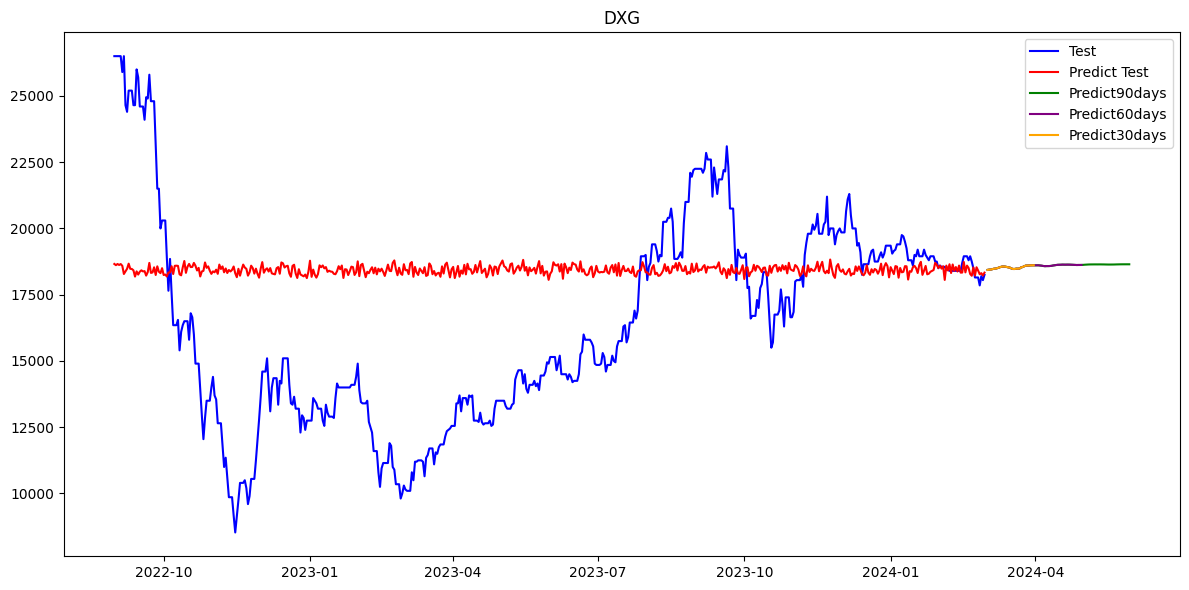

In [209]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,dxg_test_data['y'],color='blue')

pred_test = pd.date_range(start=dxg_sorted.index[dxg_train_size], end=dxg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,dxg_pred_test['TimesNet'],color='red')

start_date = dxg_sorted.index[-1] + datetime.timedelta(1)
dxg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
dxg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
dxg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(dxg_predict_data_90,dxg_predict_lst_output[:90],color='green')
plt.plot(dxg_predict_data_60,dxg_predict_lst_output[:60], color='purple')
plt.plot(dxg_predict_data_30,dxg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('DXG')
plt.tight_layout()
plt.show()

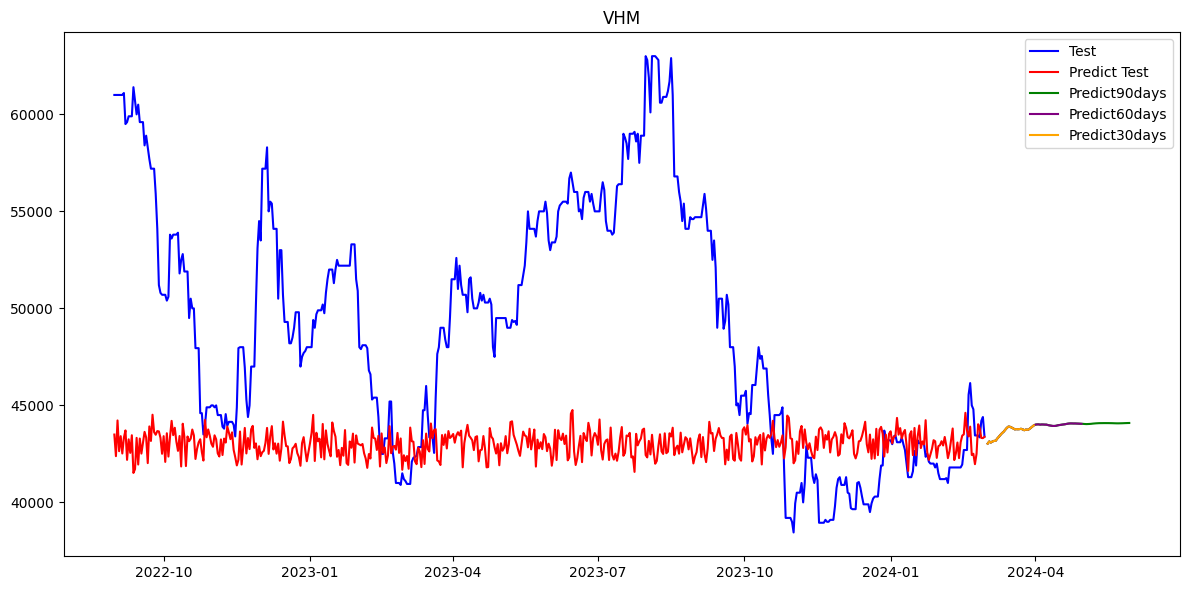

In [210]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,vhm_test_data['y'],color='blue')

pred_test = pd.date_range(start=vhm_sorted.index[vhm_train_size], end=vhm_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,vhm_pred_test['TimesNet'],color='red')

start_date = vhm_sorted.index[-1] + datetime.timedelta(1)
vhm_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
vhm_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
vhm_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(vhm_predict_data_90,vhm_predict_lst_output[:90],color='green')
plt.plot(vhm_predict_data_60,vhm_predict_lst_output[:60], color='purple')
plt.plot(vhm_predict_data_30,vhm_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('VHM')
plt.tight_layout()
plt.show()

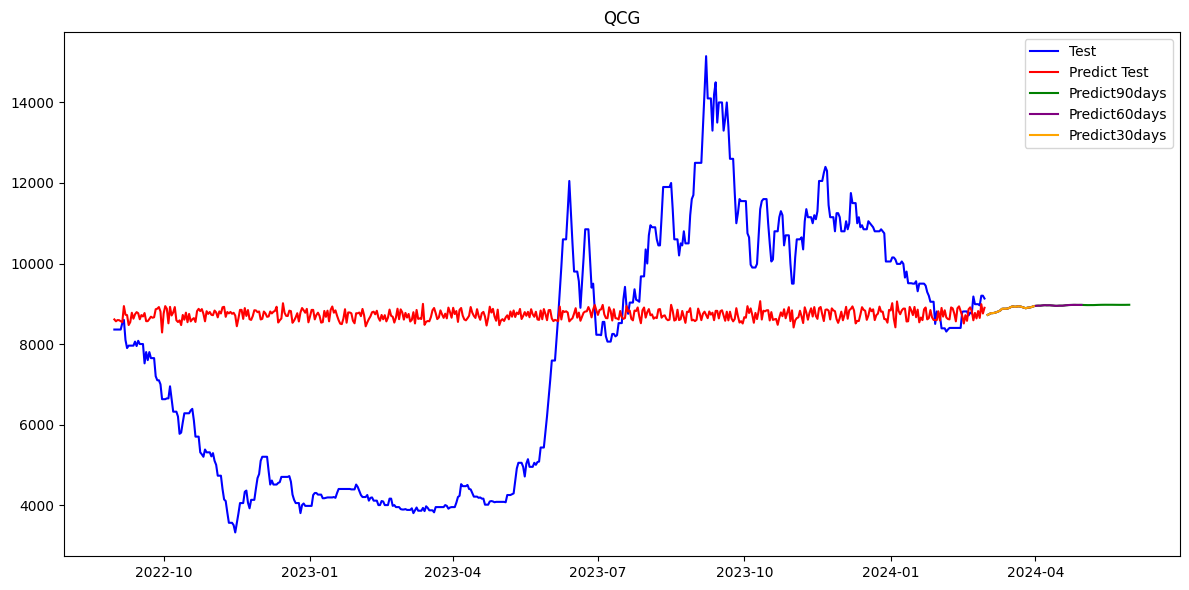

In [211]:
plt.figure(figsize=(12, 6))
new = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(new,qcg_test_data['y'],color='blue')

pred_test = pd.date_range(start=qcg_sorted.index[qcg_train_size], end=qcg_sorted.index[-1] - datetime.timedelta(days=1))
plt.plot(pred_test,qcg_pred_test['TimesNet'],color='red')

start_date = qcg_sorted.index[-1] + datetime.timedelta(1)
qcg_predict_data_30 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(29))
qcg_predict_data_60 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(59))
qcg_predict_data_90 = pd.date_range(start=start_date, end=start_date + datetime.timedelta(89))
plt.plot(qcg_predict_data_90,qcg_predict_lst_output[:90],color='green')
plt.plot(qcg_predict_data_60,qcg_predict_lst_output[:60], color='purple')
plt.plot(qcg_predict_data_30,qcg_predict_lst_output[:30],color='orange')
plt.legend(['Test',"Predict Test",'Predict90days','Predict60days','Predict30days'])
plt.title('QCG')
plt.tight_layout()
plt.show()